In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler, MinMaxScaler, RobustScaler
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import linear_model 
import category_encoders as ce
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.imputation import CategoricalImputer
     
     
#train-test split, imputers, transformers, encoders
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,OneHotEncoder
#models
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor, StackingRegressor
#notebooks
import warnings
warnings.filterwarnings('ignore')




## Identifying the dataset



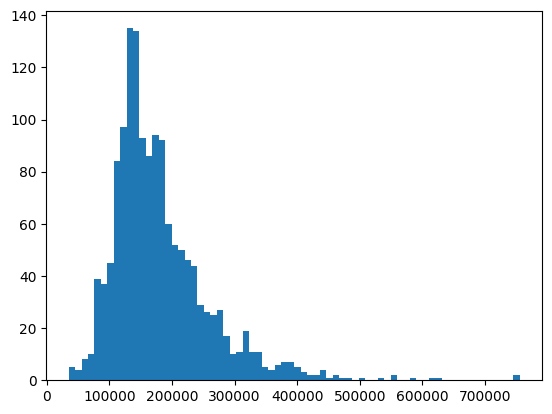

In [4]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

plt.hist(x='SalePrice',data=df_train,bins=70)
plt.show()

In [5]:
def idfy_cols(df):
    #missed = df.loc[:, df.isna().any()]
    total =df.columns
    categorical = df.dtypes == 'object'
    # Reindex the boolean series to match the dataframe columns
    categorical = categorical.reindex(total, fill_value=False)
    categorical = df.loc[:, categorical].columns
    numerical = total.difference(categorical)
    return categorical, numerical
#Total cols
cat,num=idfy_cols(df_test)
print("# Total Of Categorical Cols:",cat.shape[0],"\n# Total Of Numerical Cols:",num.shape[0])
#None cols
cat_train,num_train=idfy_cols(df_train.loc[:, df_train.isna().any()])
print(df_train.value_counts())
total=len(df_train)
cat_ncols_train=df_train[cat_train].isnull().sum()*100/total
num_ncols_train=df_train[num_train].isnull().sum()*100/total
print("Nan Cathegorical (%)")
cat_ncols_train.sort_values(ascending=False)

# Total Of Categorical Cols: 43 
# Total Of Numerical Cols: 37
Series([], Name: count, dtype: int64)
Nan Cathegorical (%)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

In [6]:
print("Nan Numerical (%)")
num_ncols_train.sort_values(ascending=False)

Nan Numerical (%)


LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [7]:
#the NaN values on MasVnrArea occur when there's no MasVnr, hence 0
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(0)
#the NaN values on GarageYrBlt occur when there's no arange, hence 0
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(0)
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(0)

## Removing Outliers

Categorical

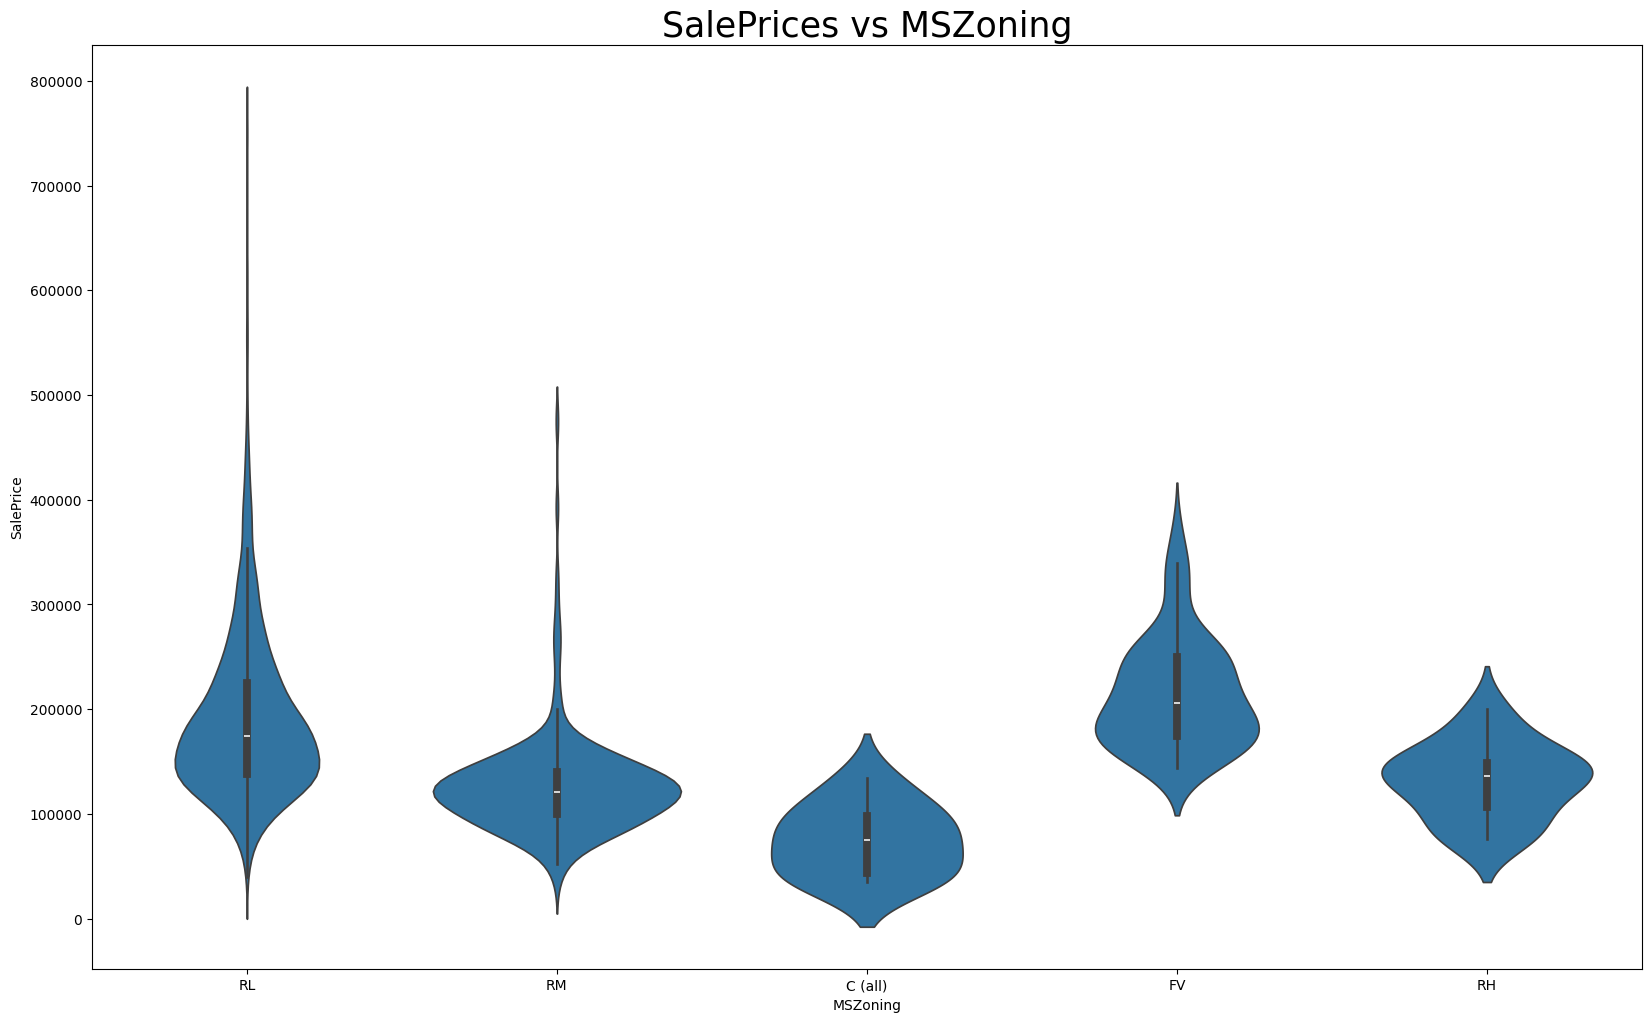

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: count, dtype: float64


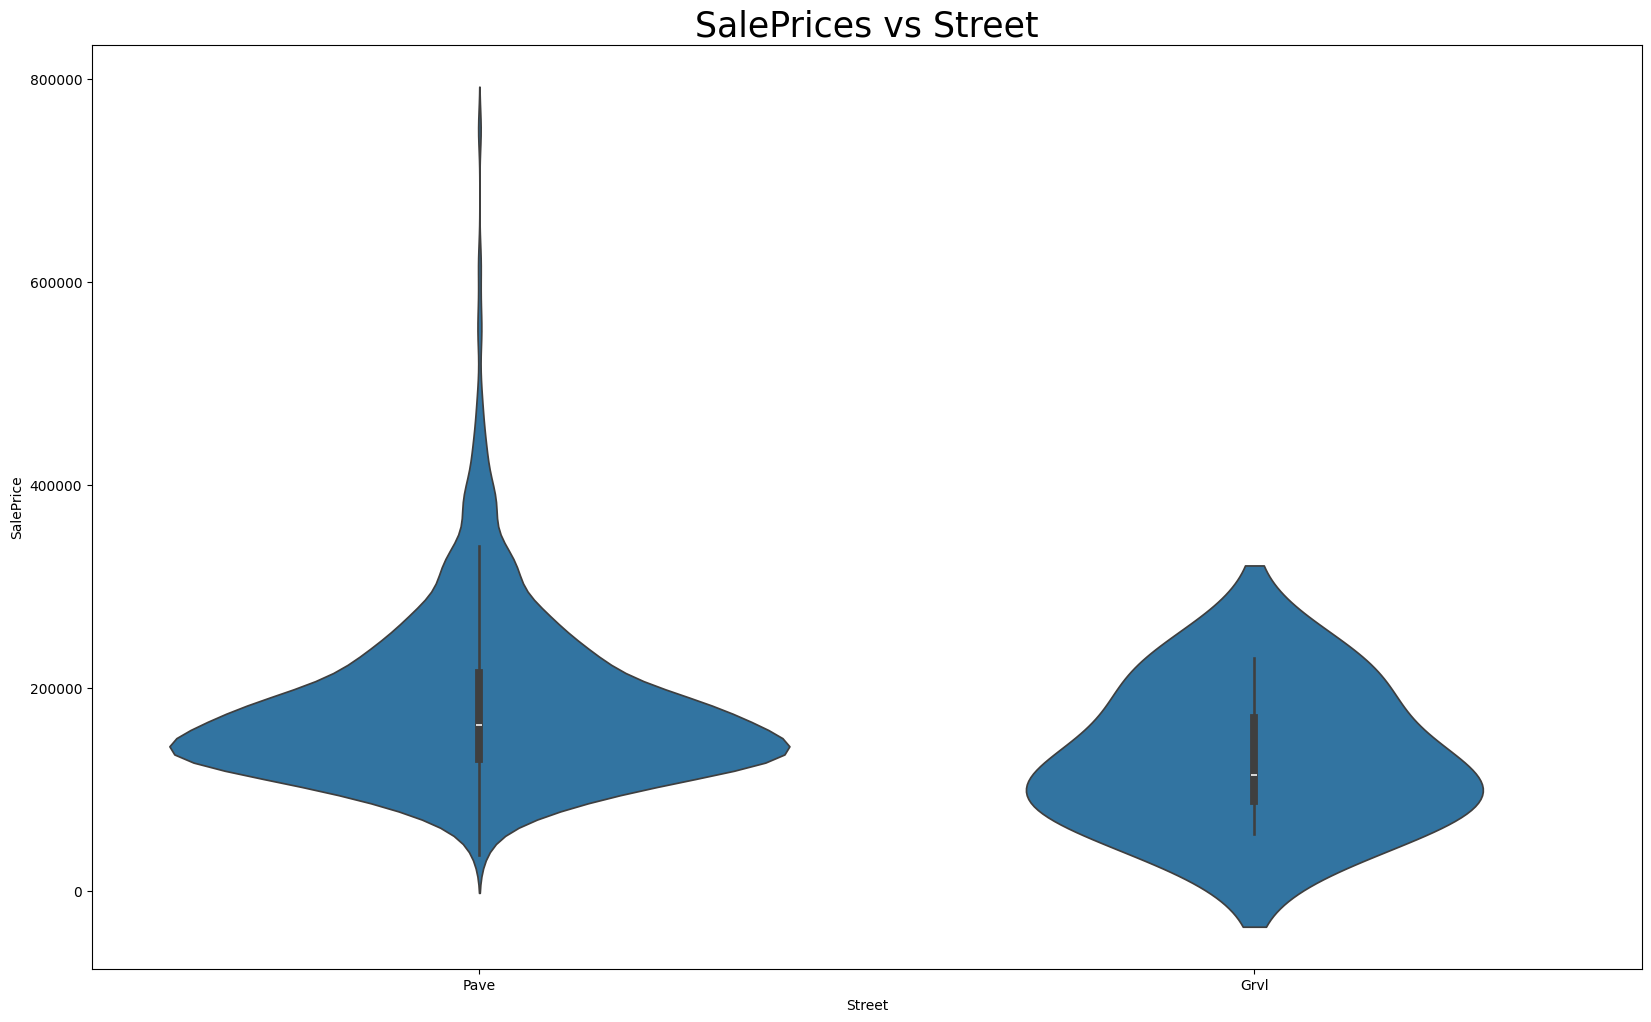

Street
Pave    0.99589
Grvl    0.00411
Name: count, dtype: float64


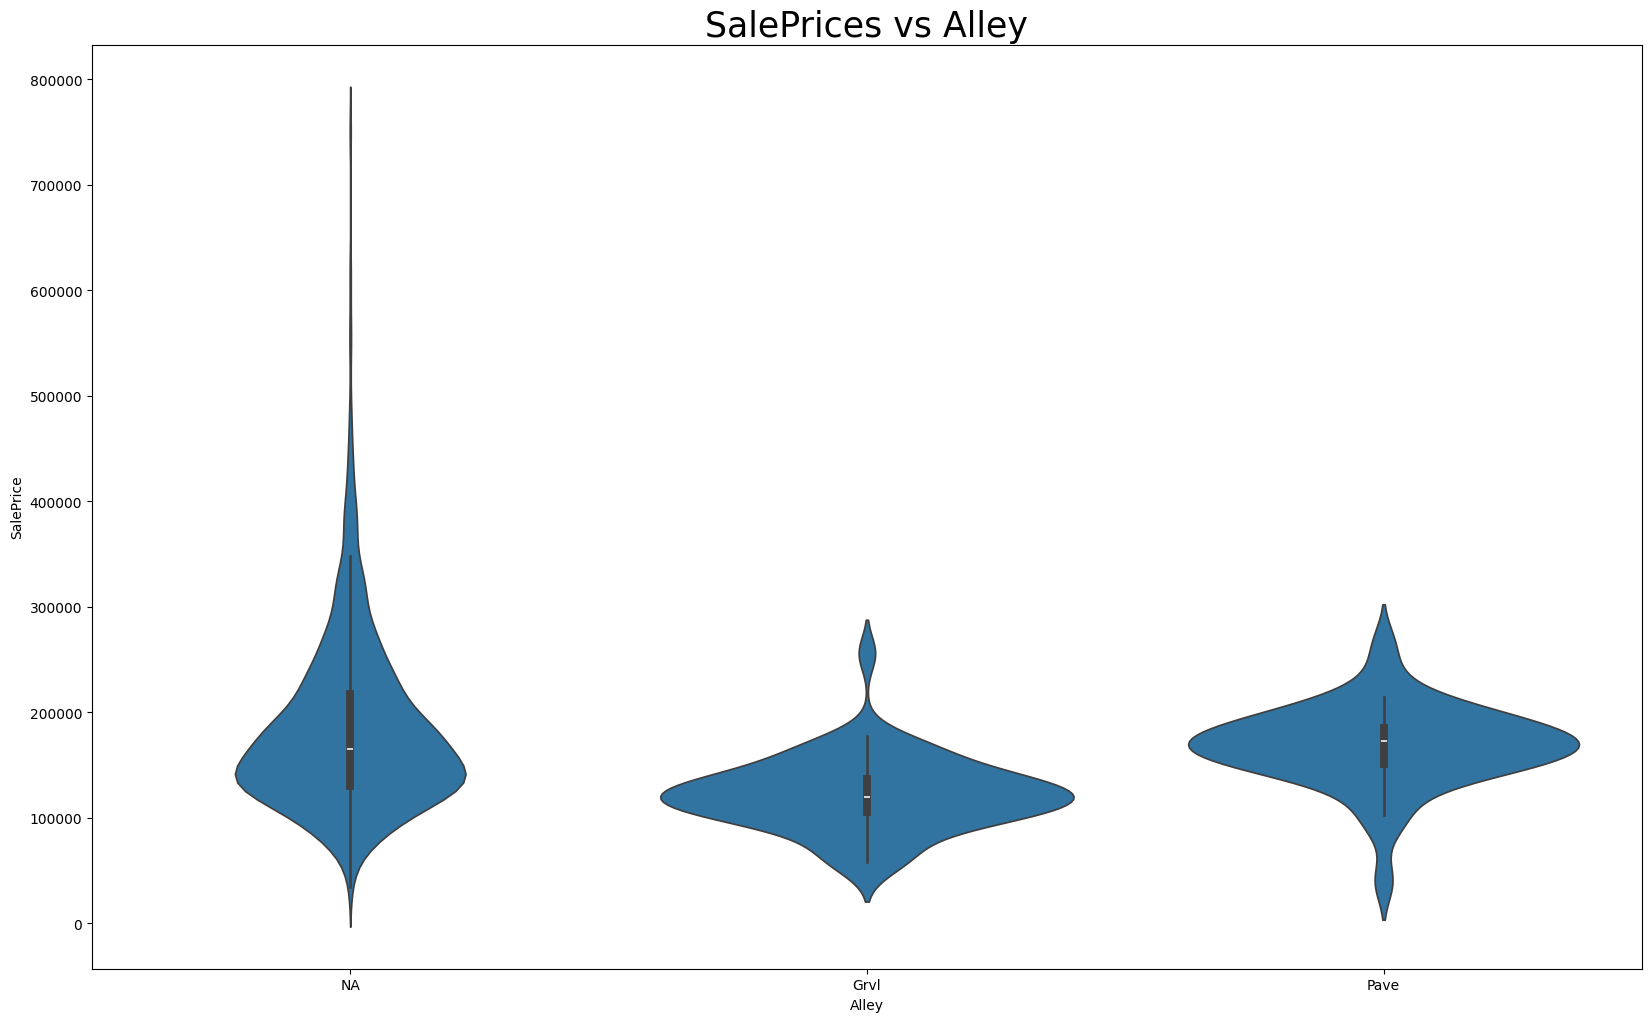

Alley
NA      0.937671
Grvl    0.034247
Pave    0.028082
Name: count, dtype: float64


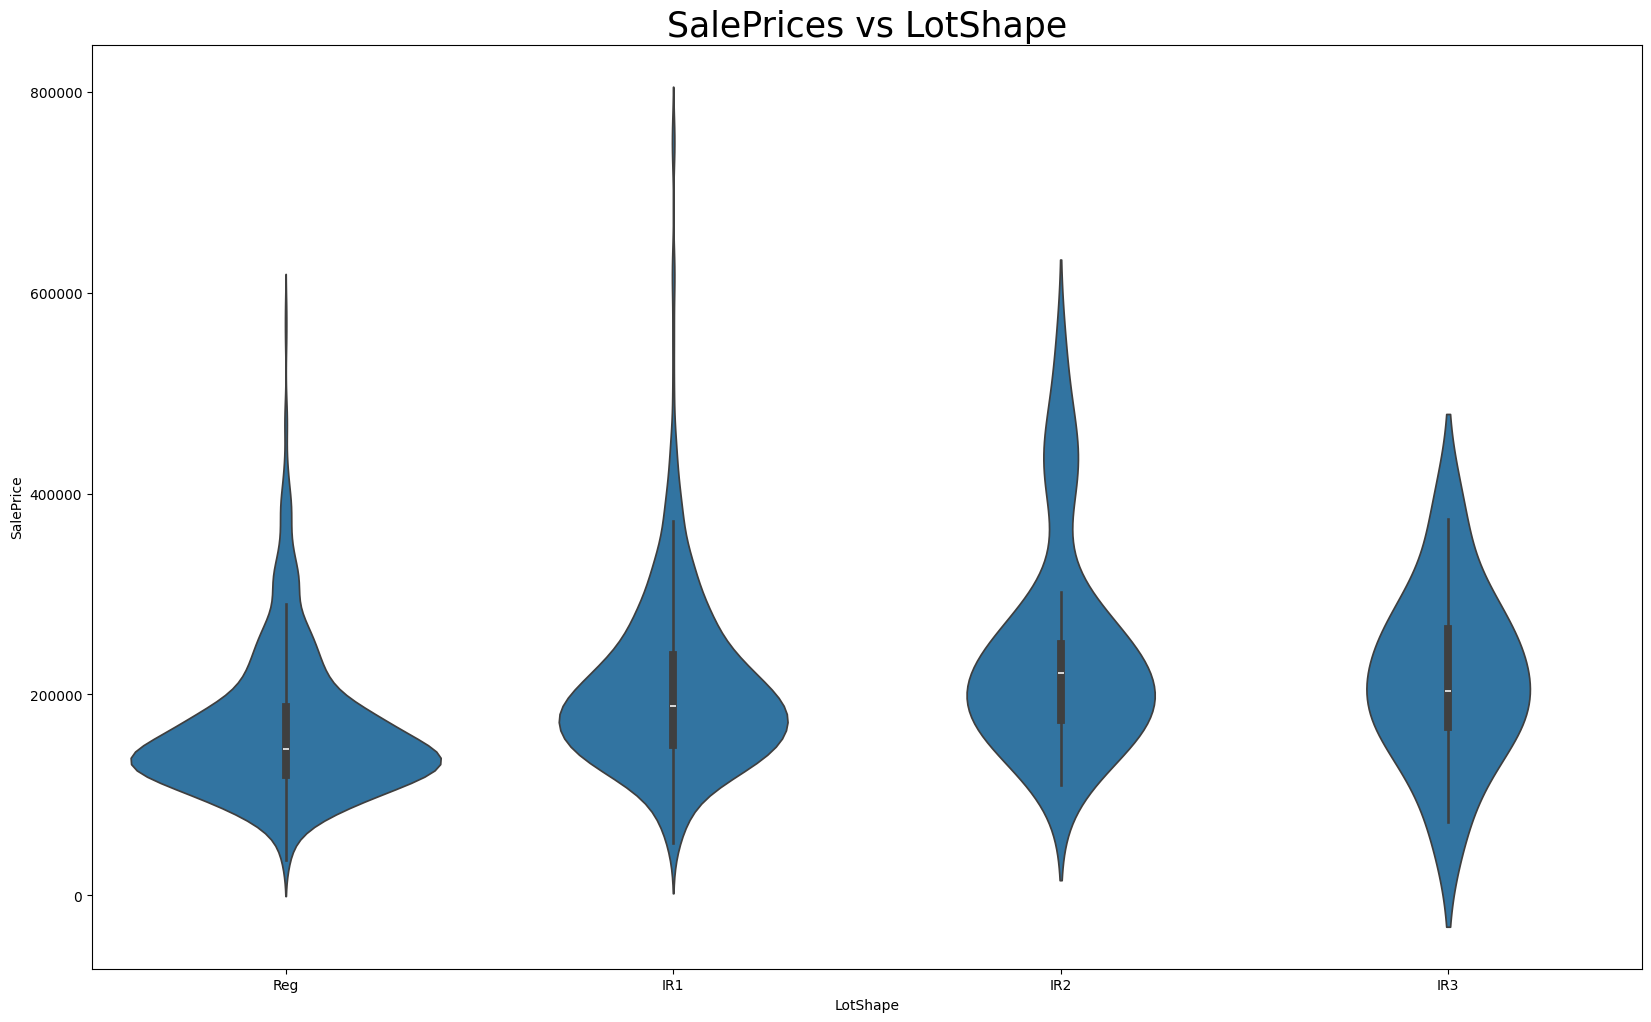

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: count, dtype: float64


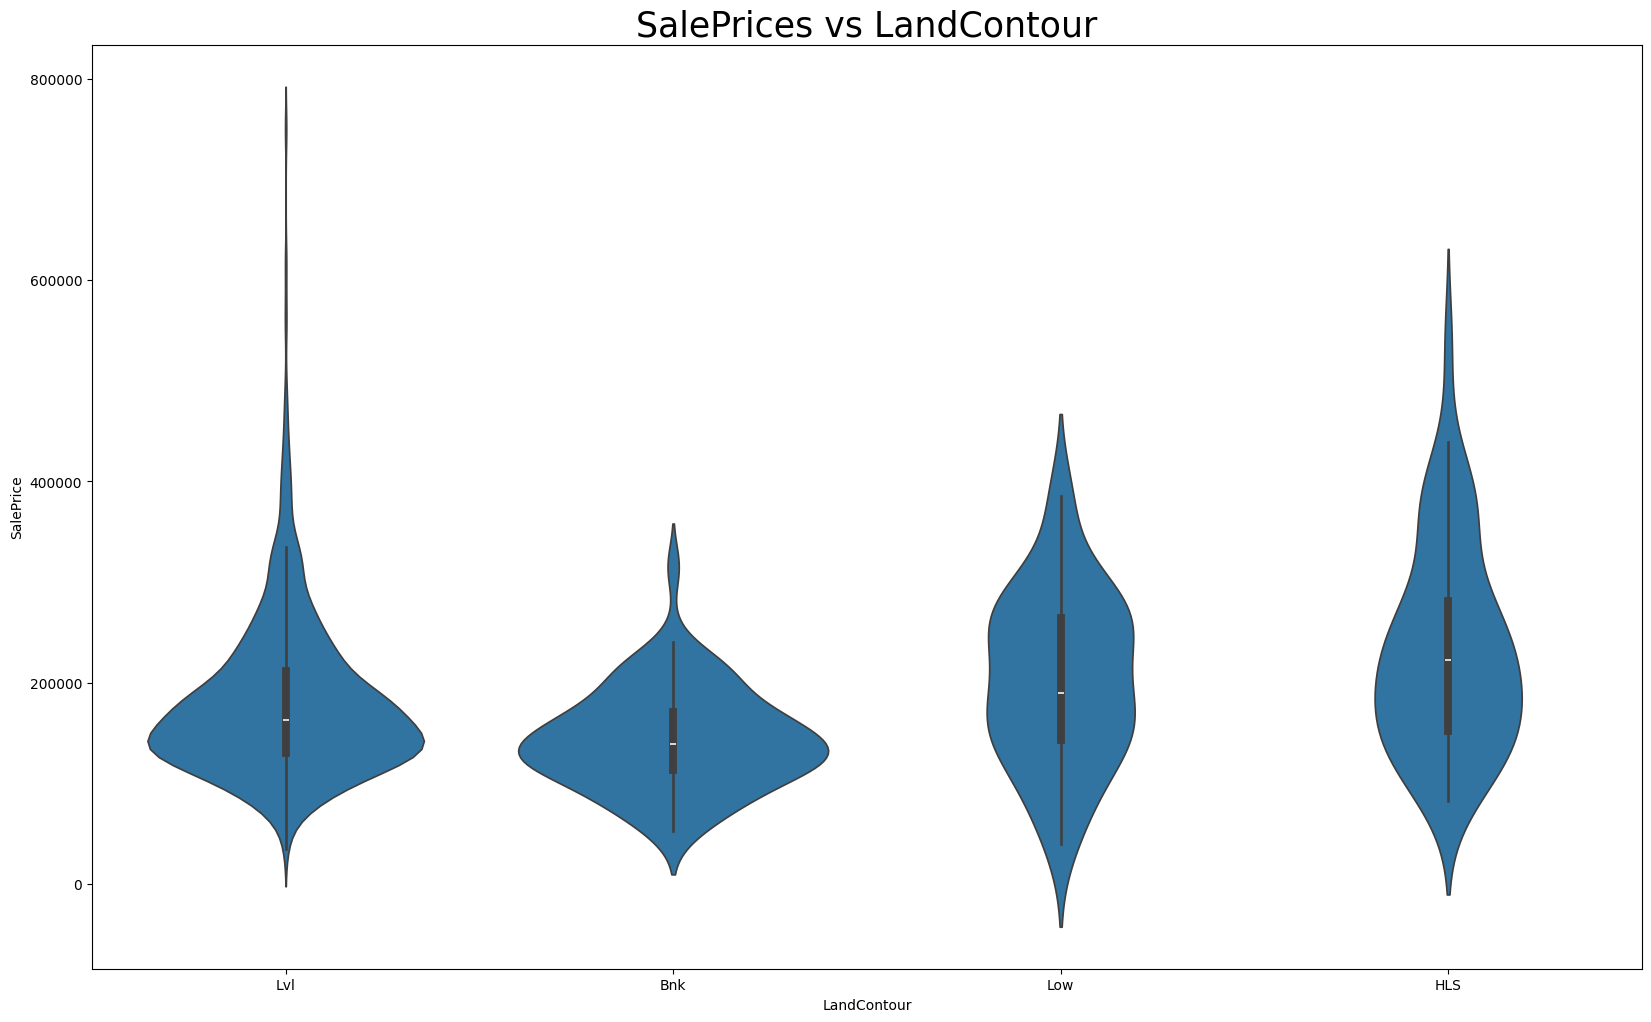

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: count, dtype: float64


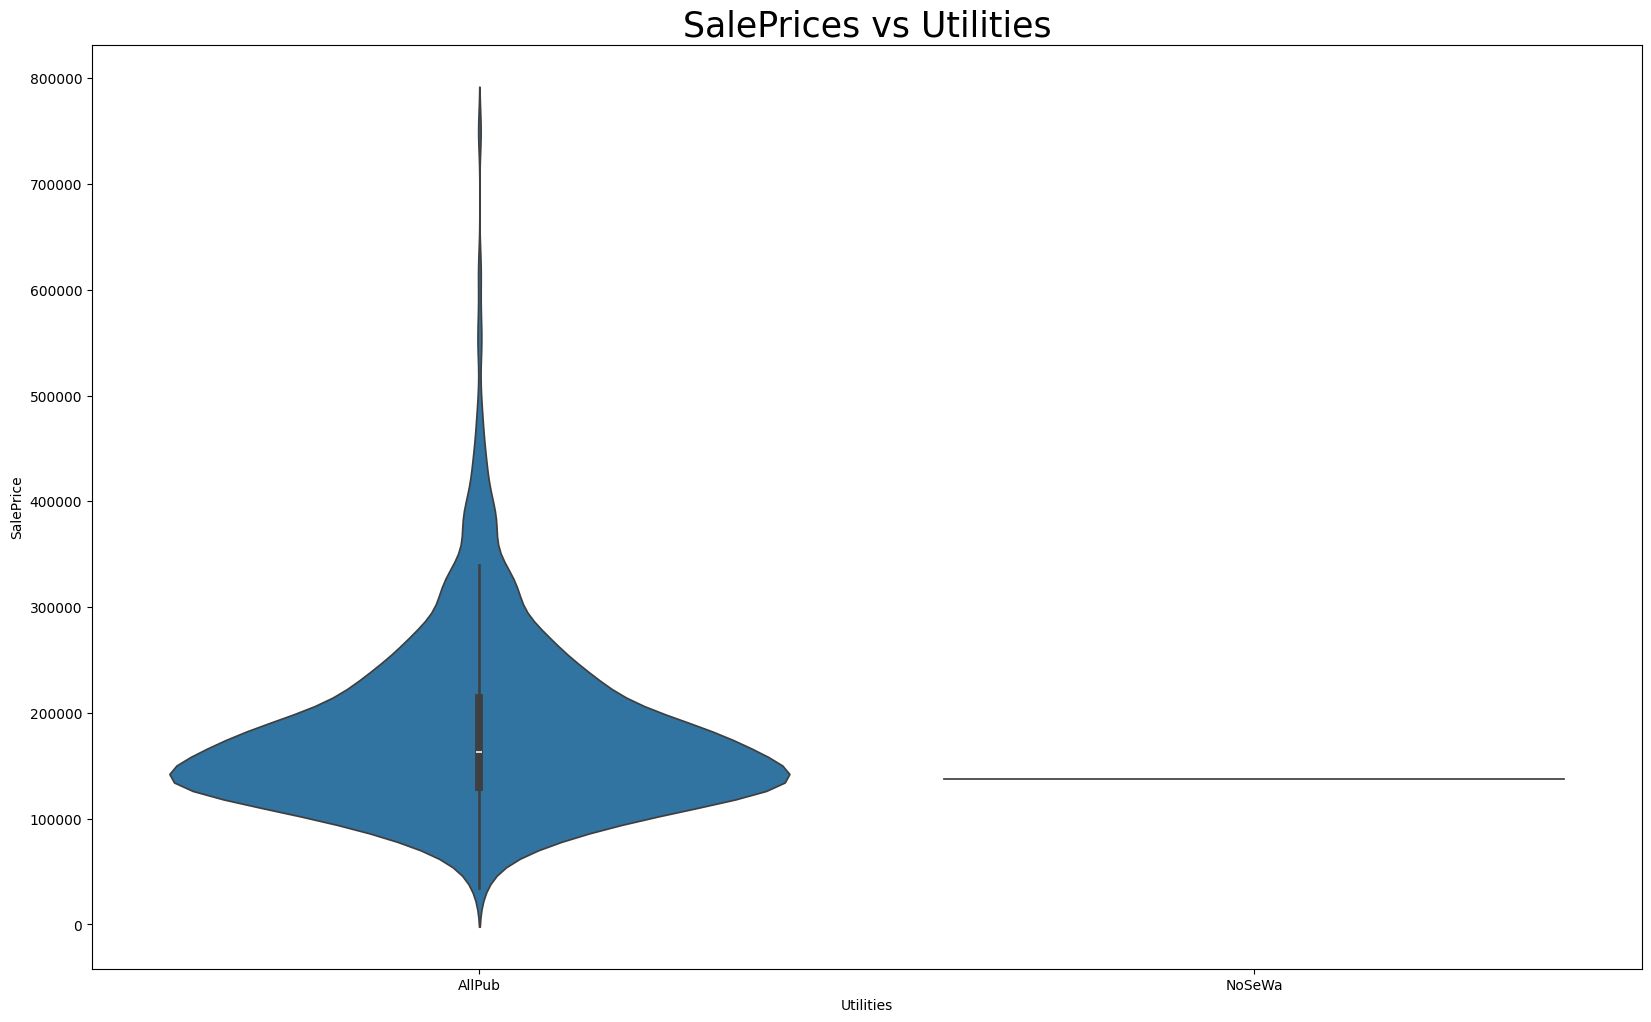

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: count, dtype: float64


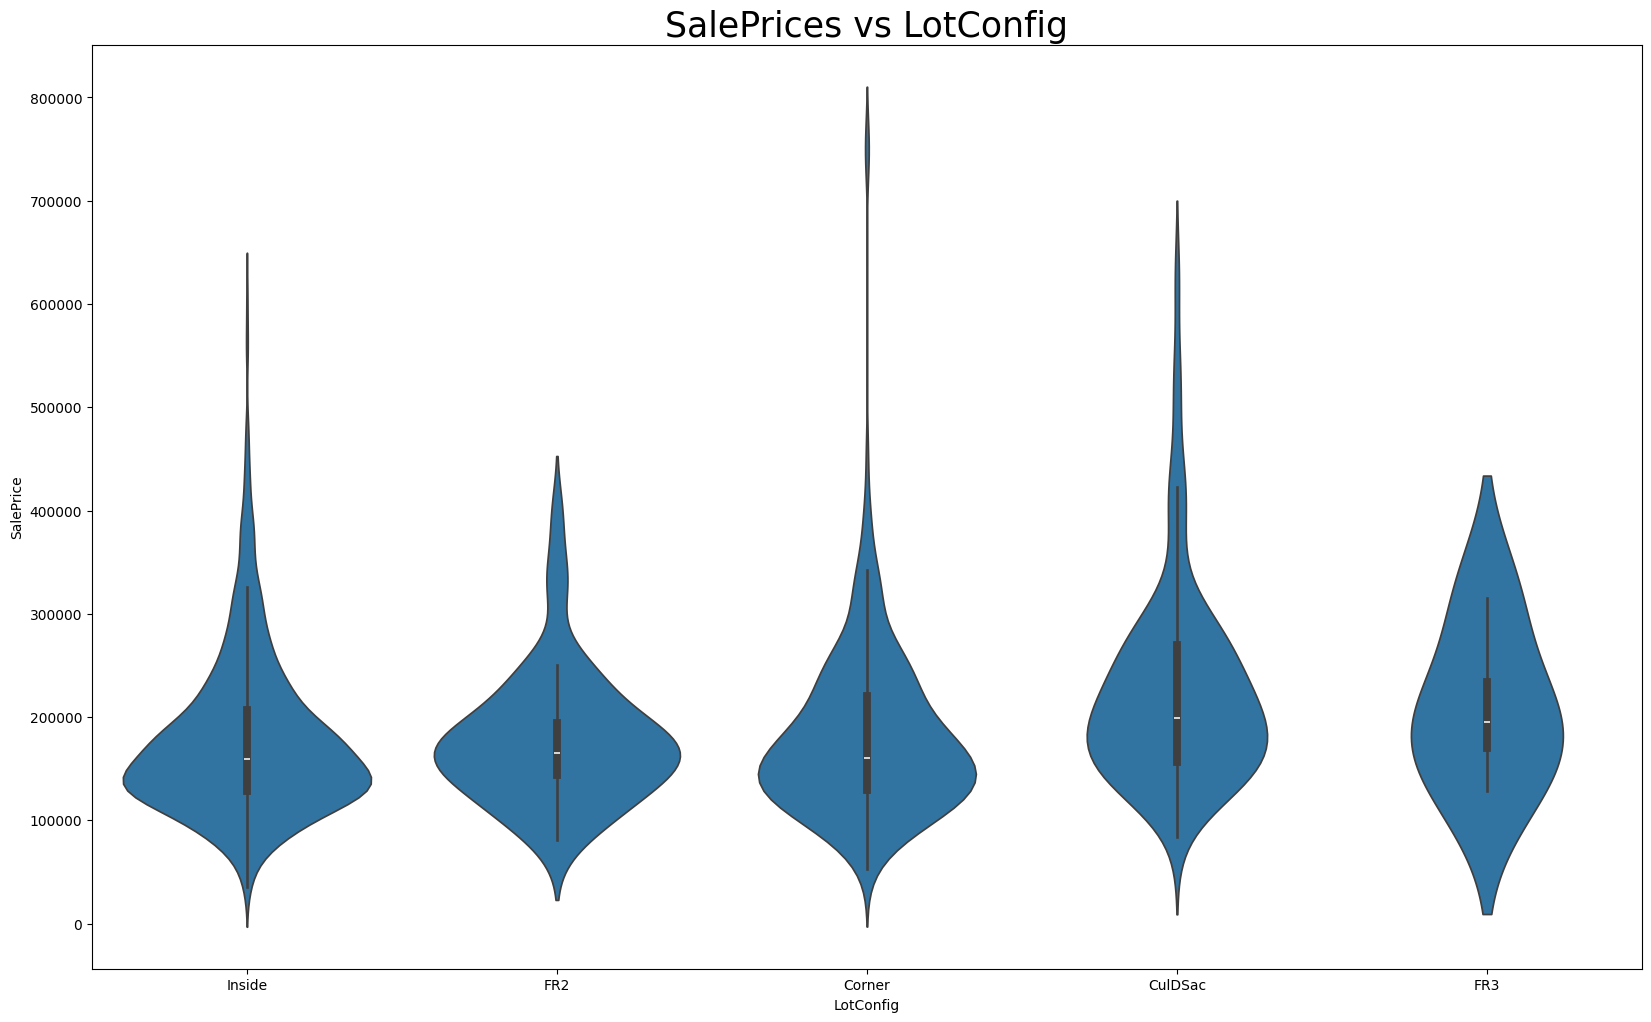

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: count, dtype: float64


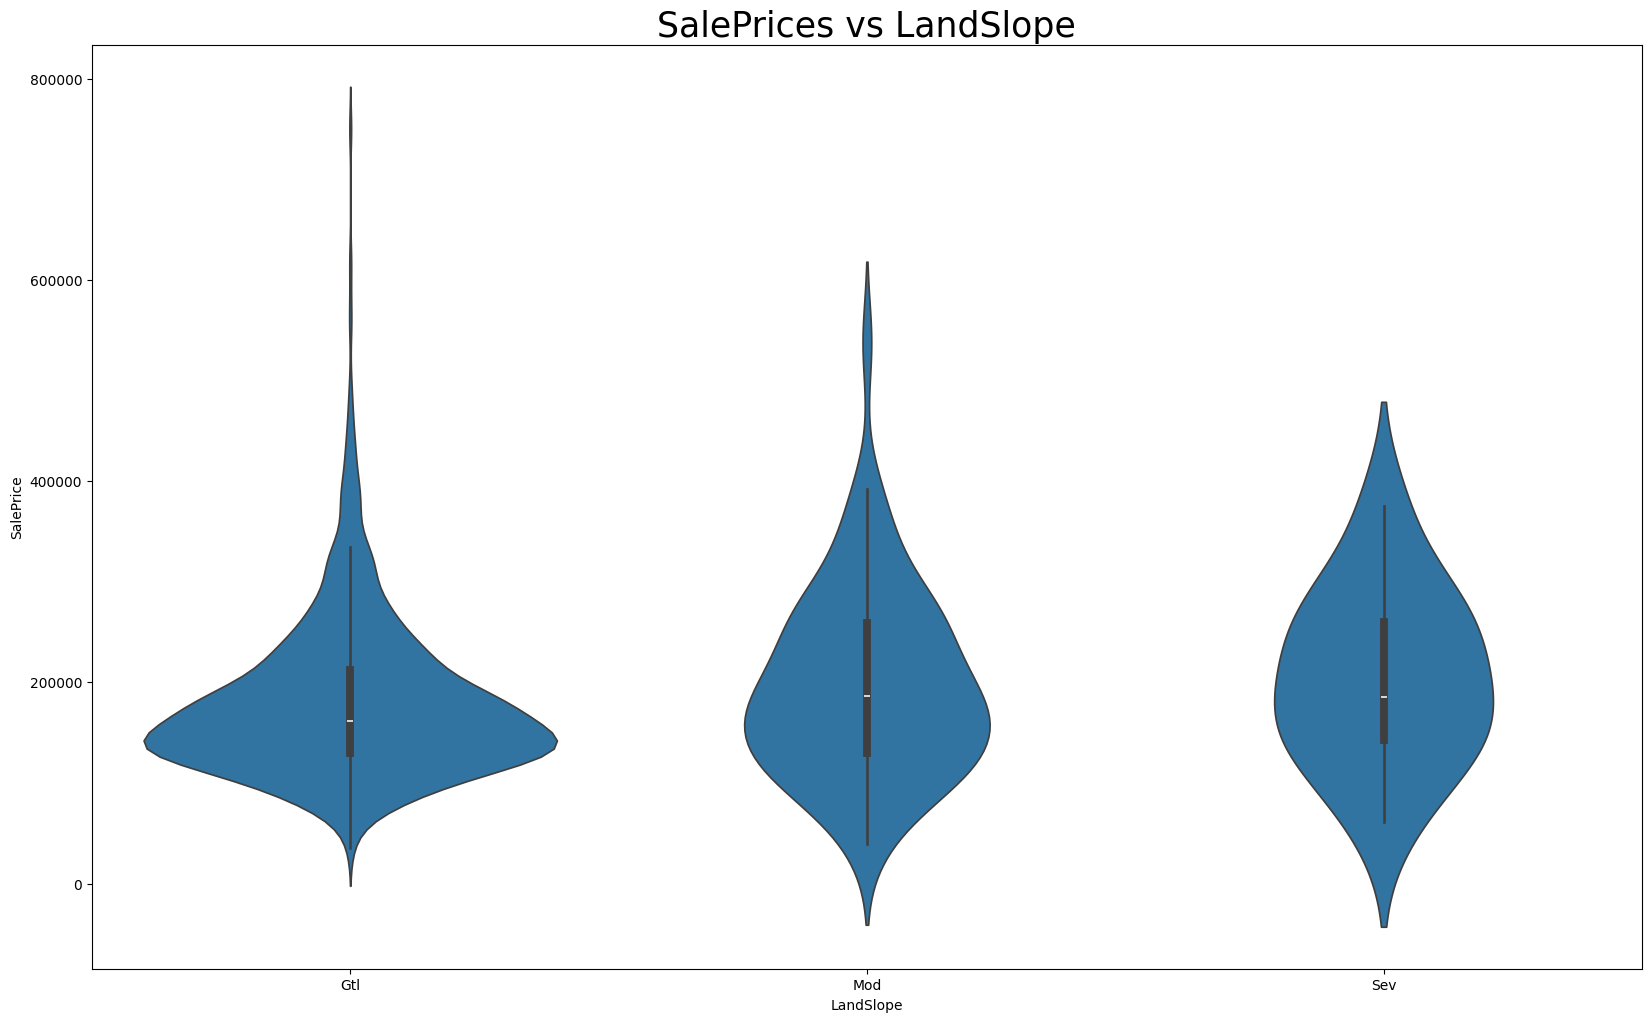

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: count, dtype: float64


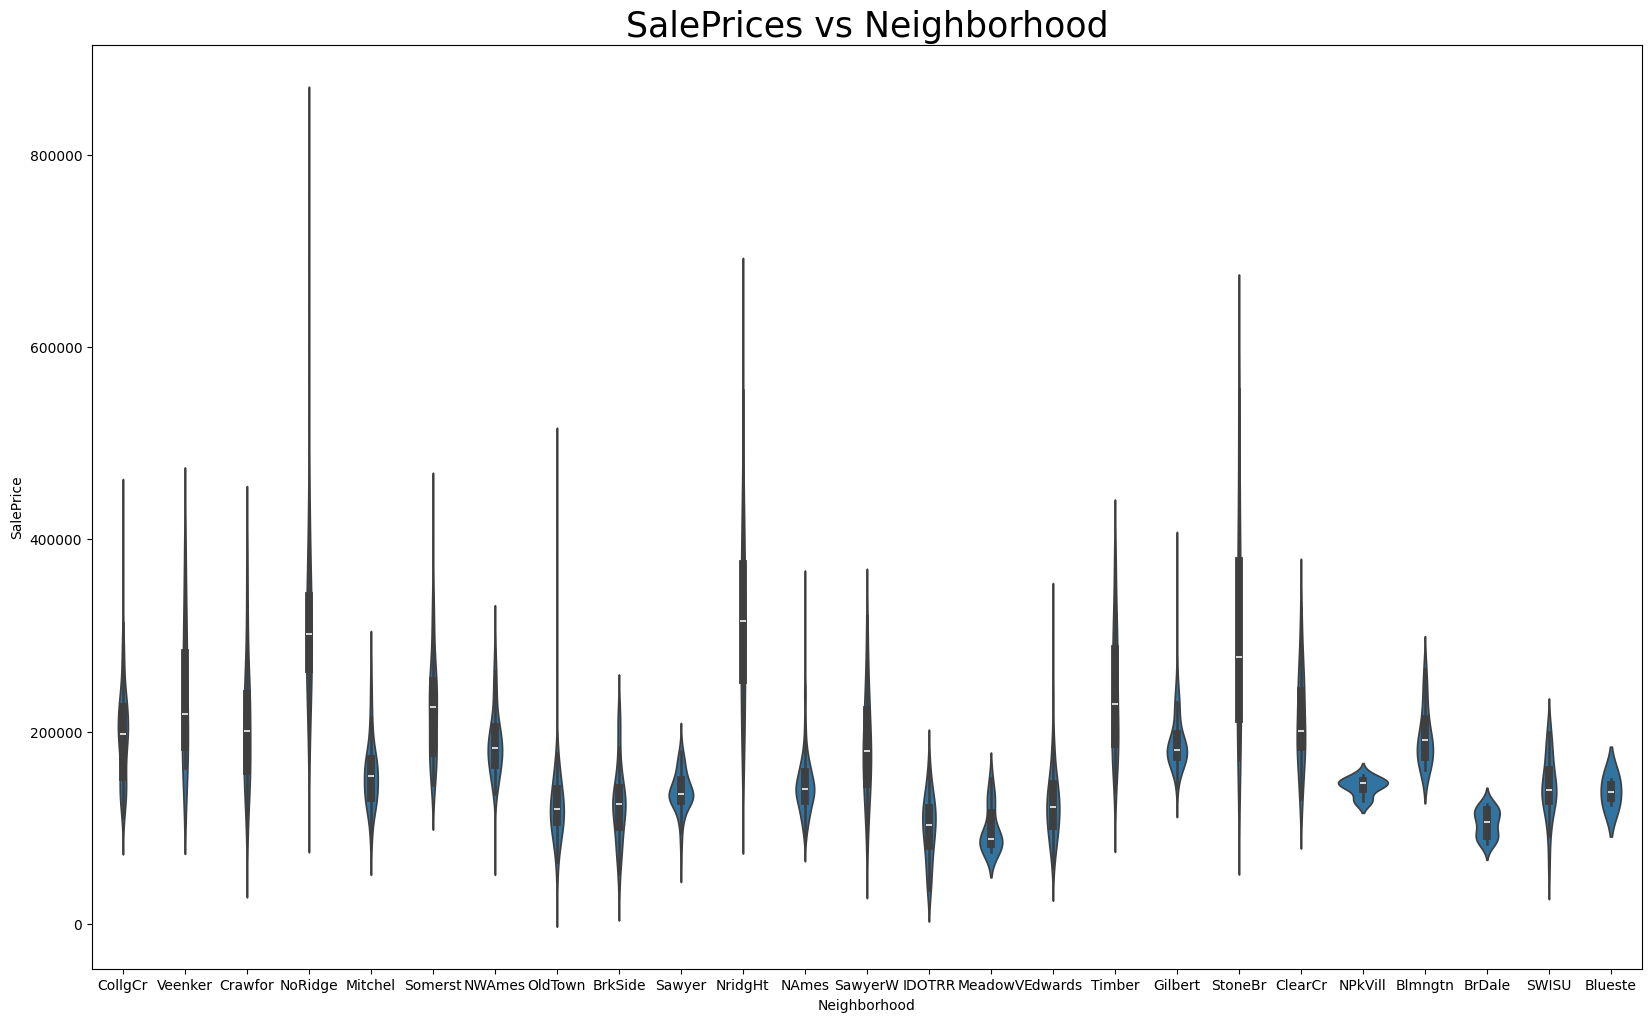

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: count, dtype: float64


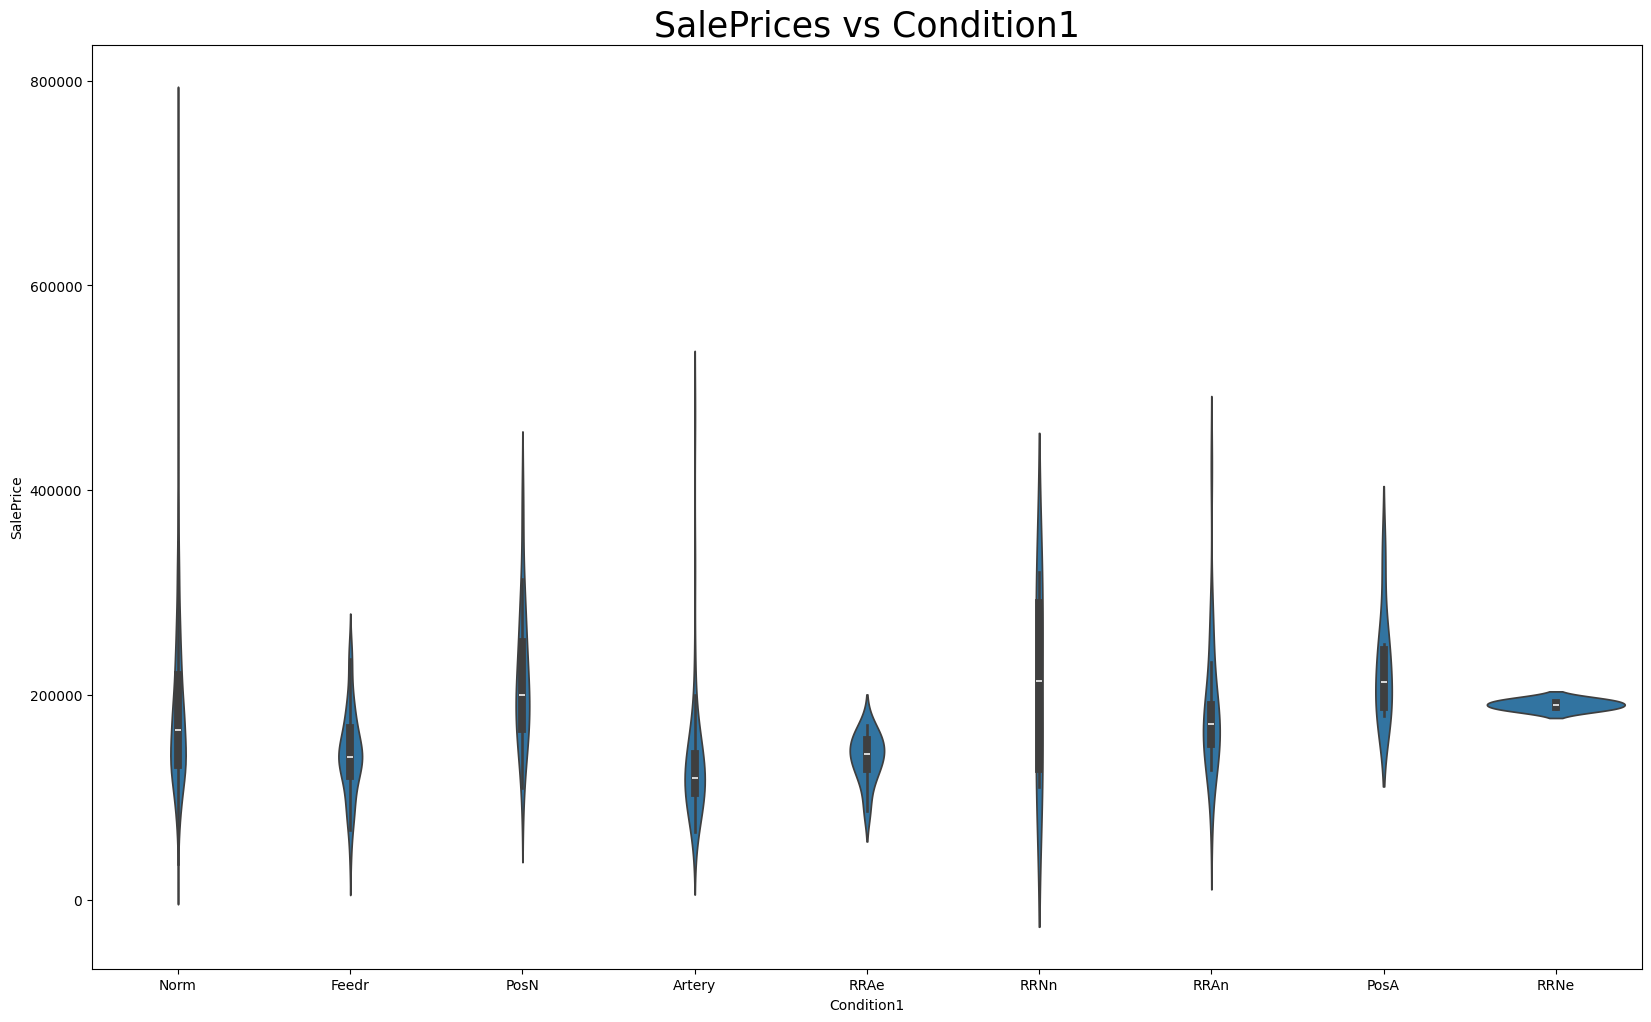

Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: count, dtype: float64


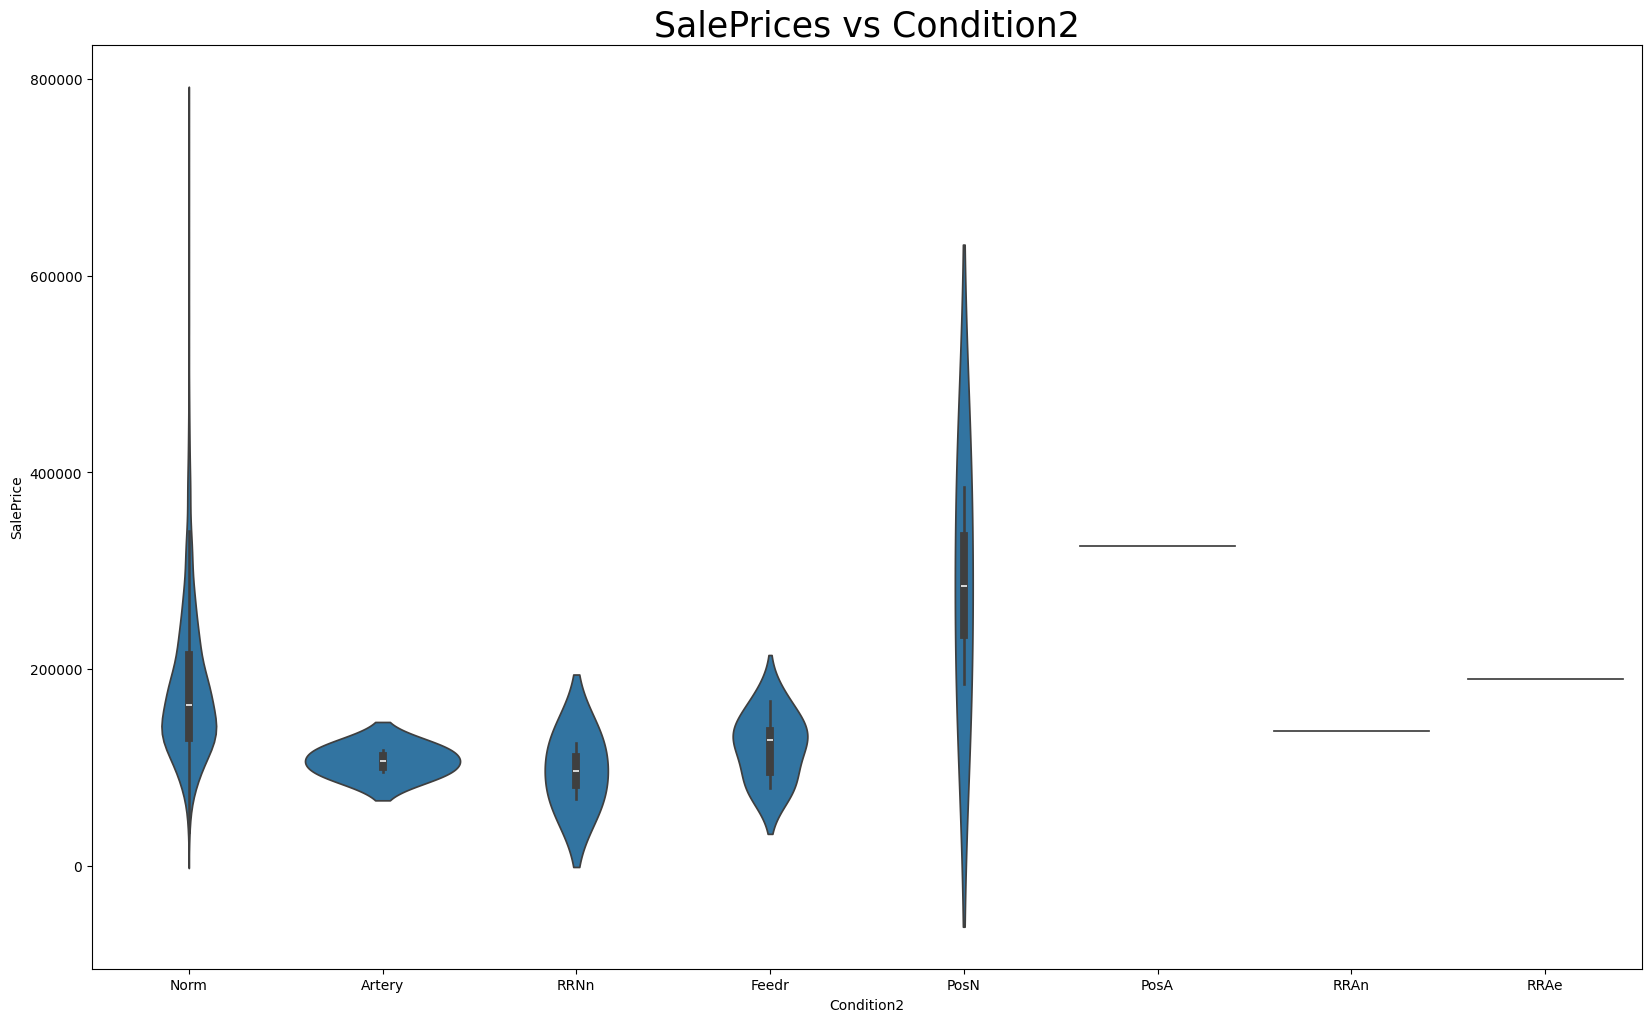

Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: count, dtype: float64


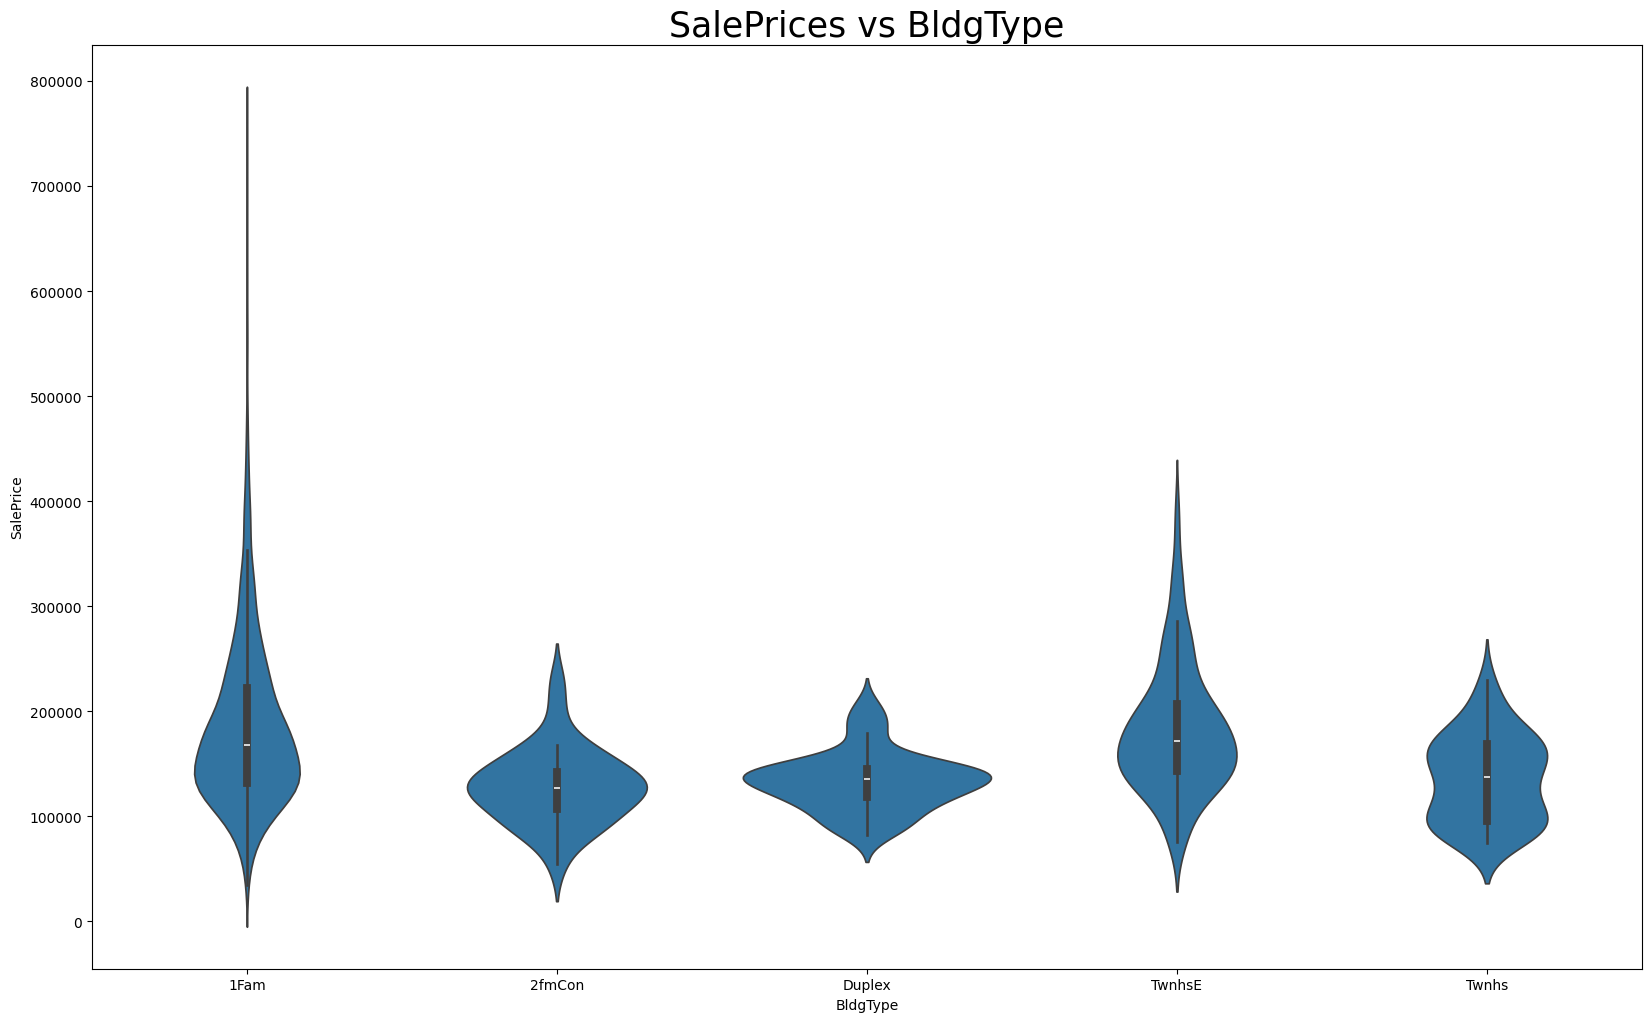

BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: count, dtype: float64


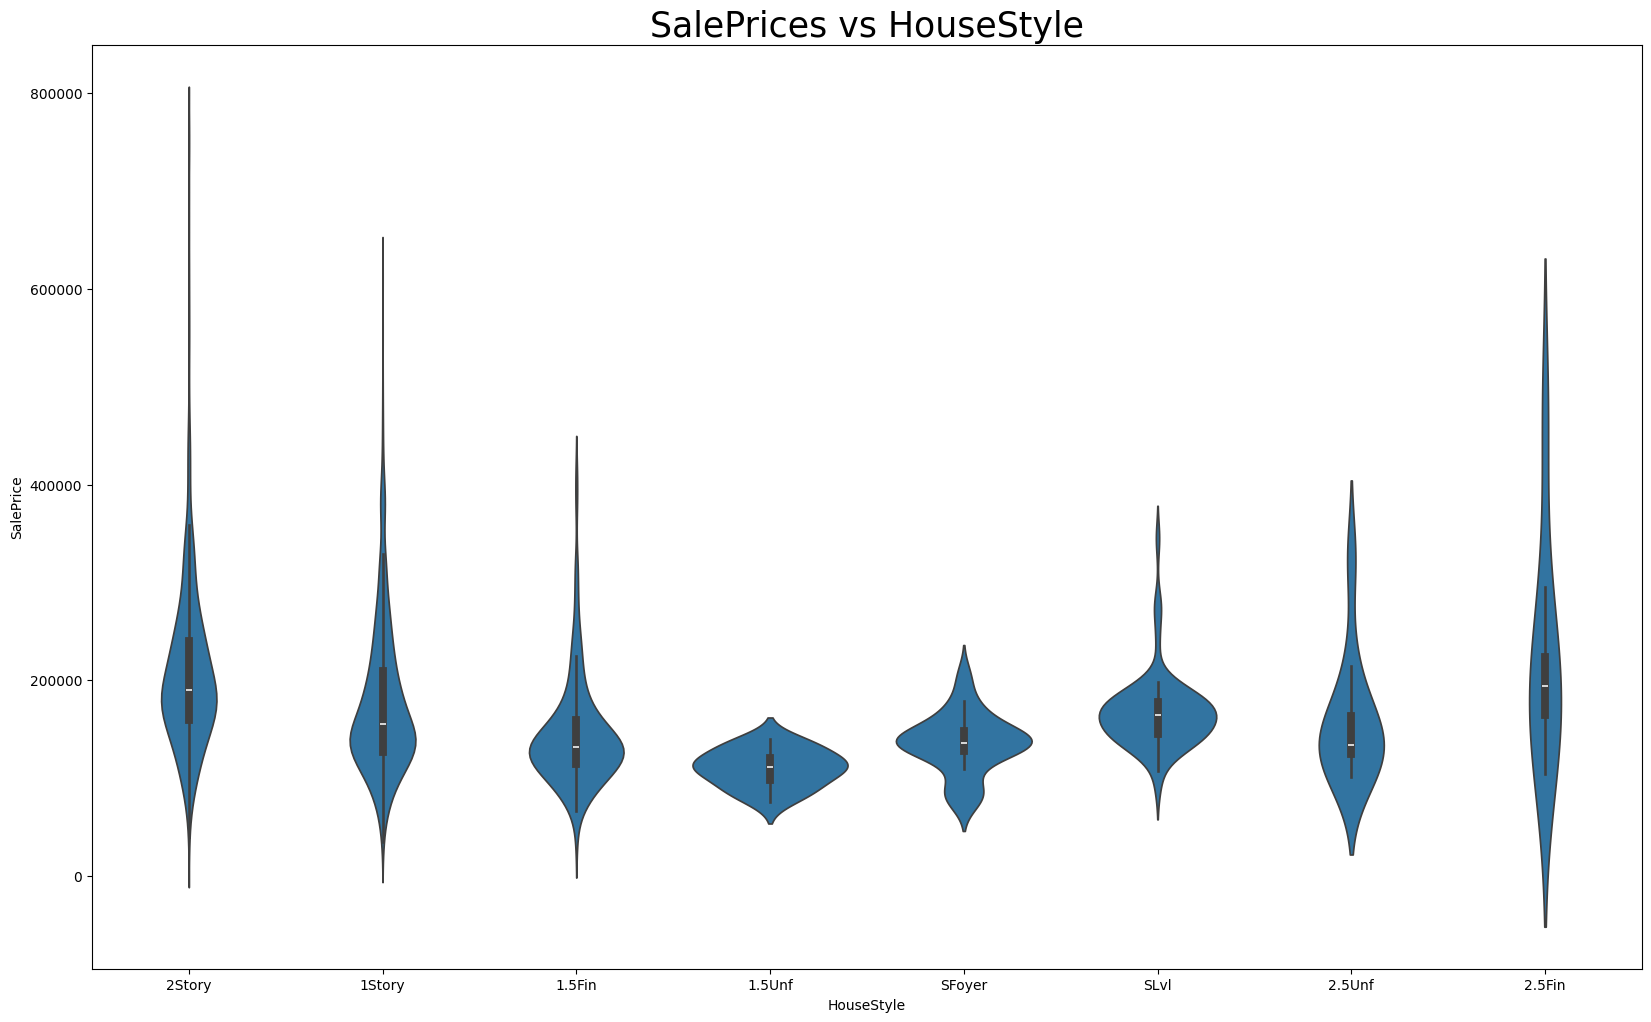

HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: count, dtype: float64


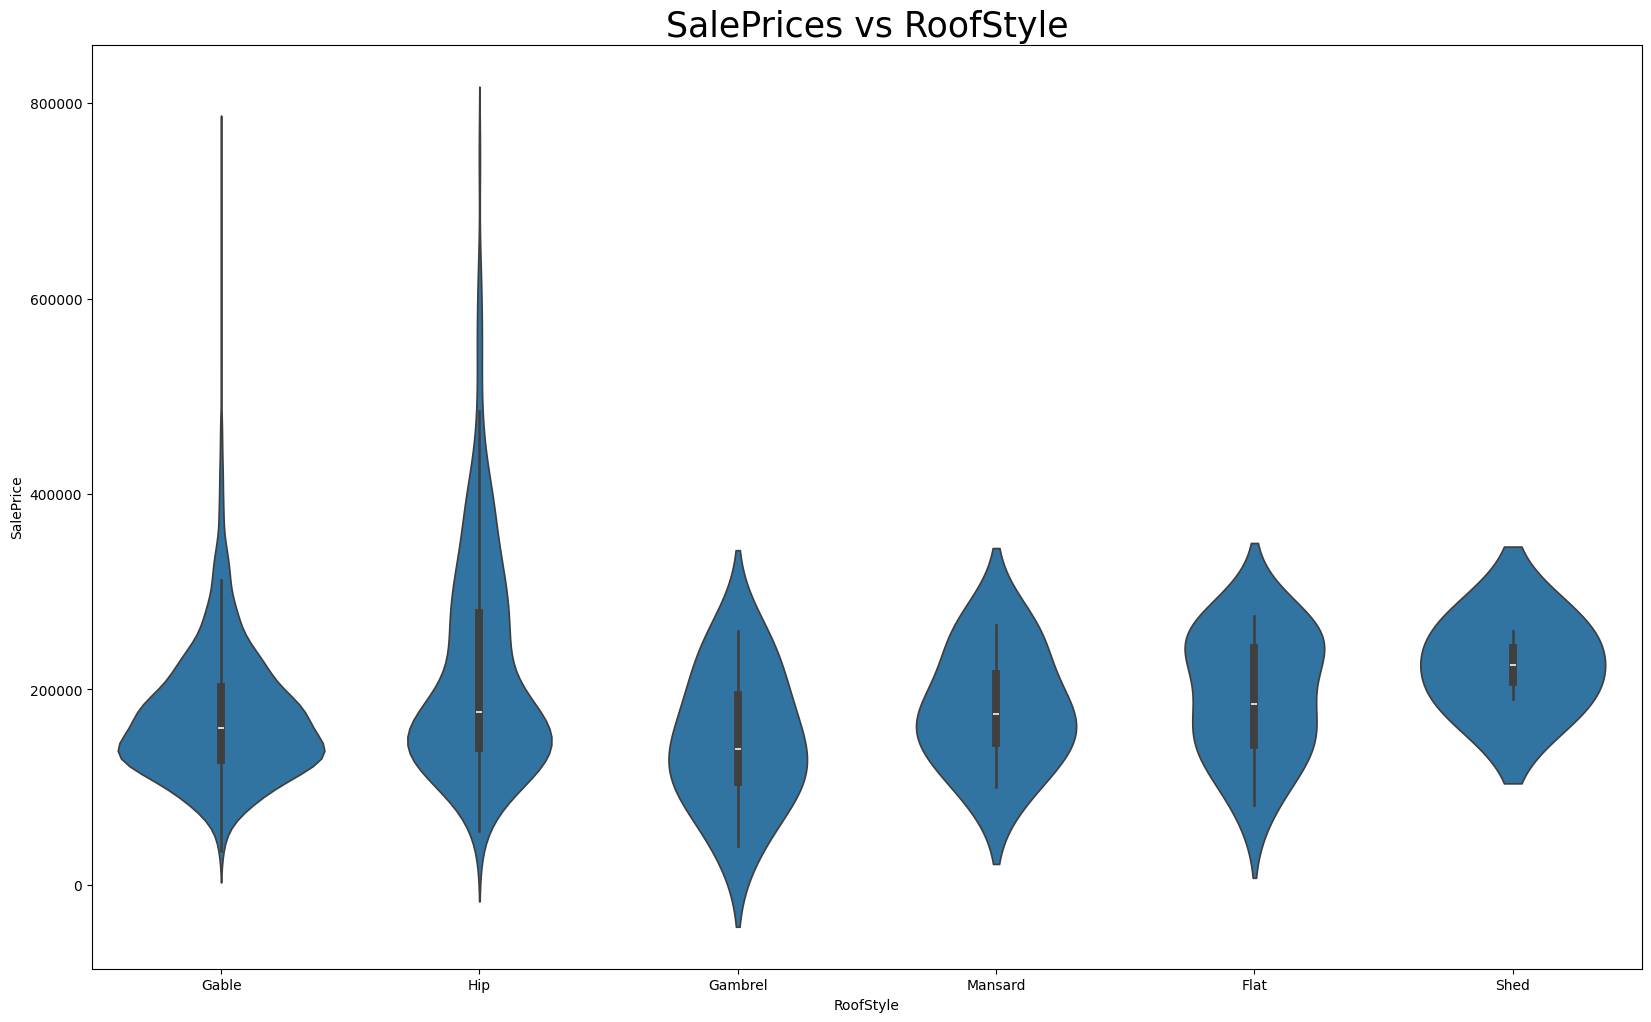

RoofStyle
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: count, dtype: float64


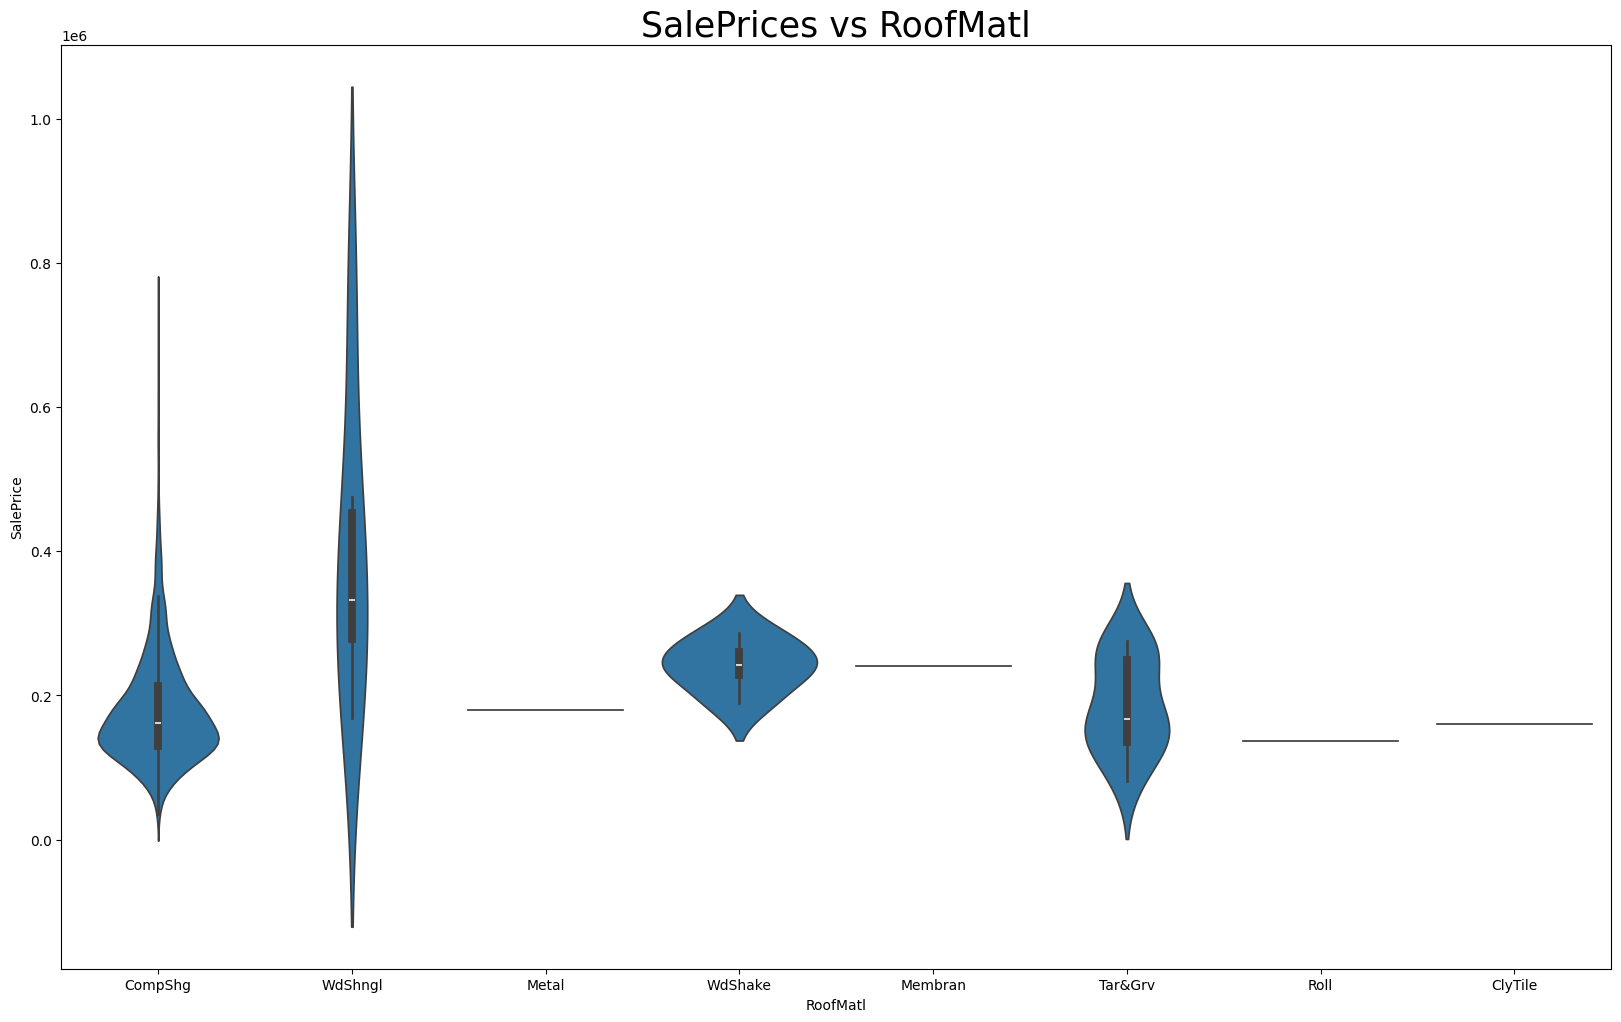

RoofMatl
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Metal      0.000685
Membran    0.000685
Roll       0.000685
ClyTile    0.000685
Name: count, dtype: float64


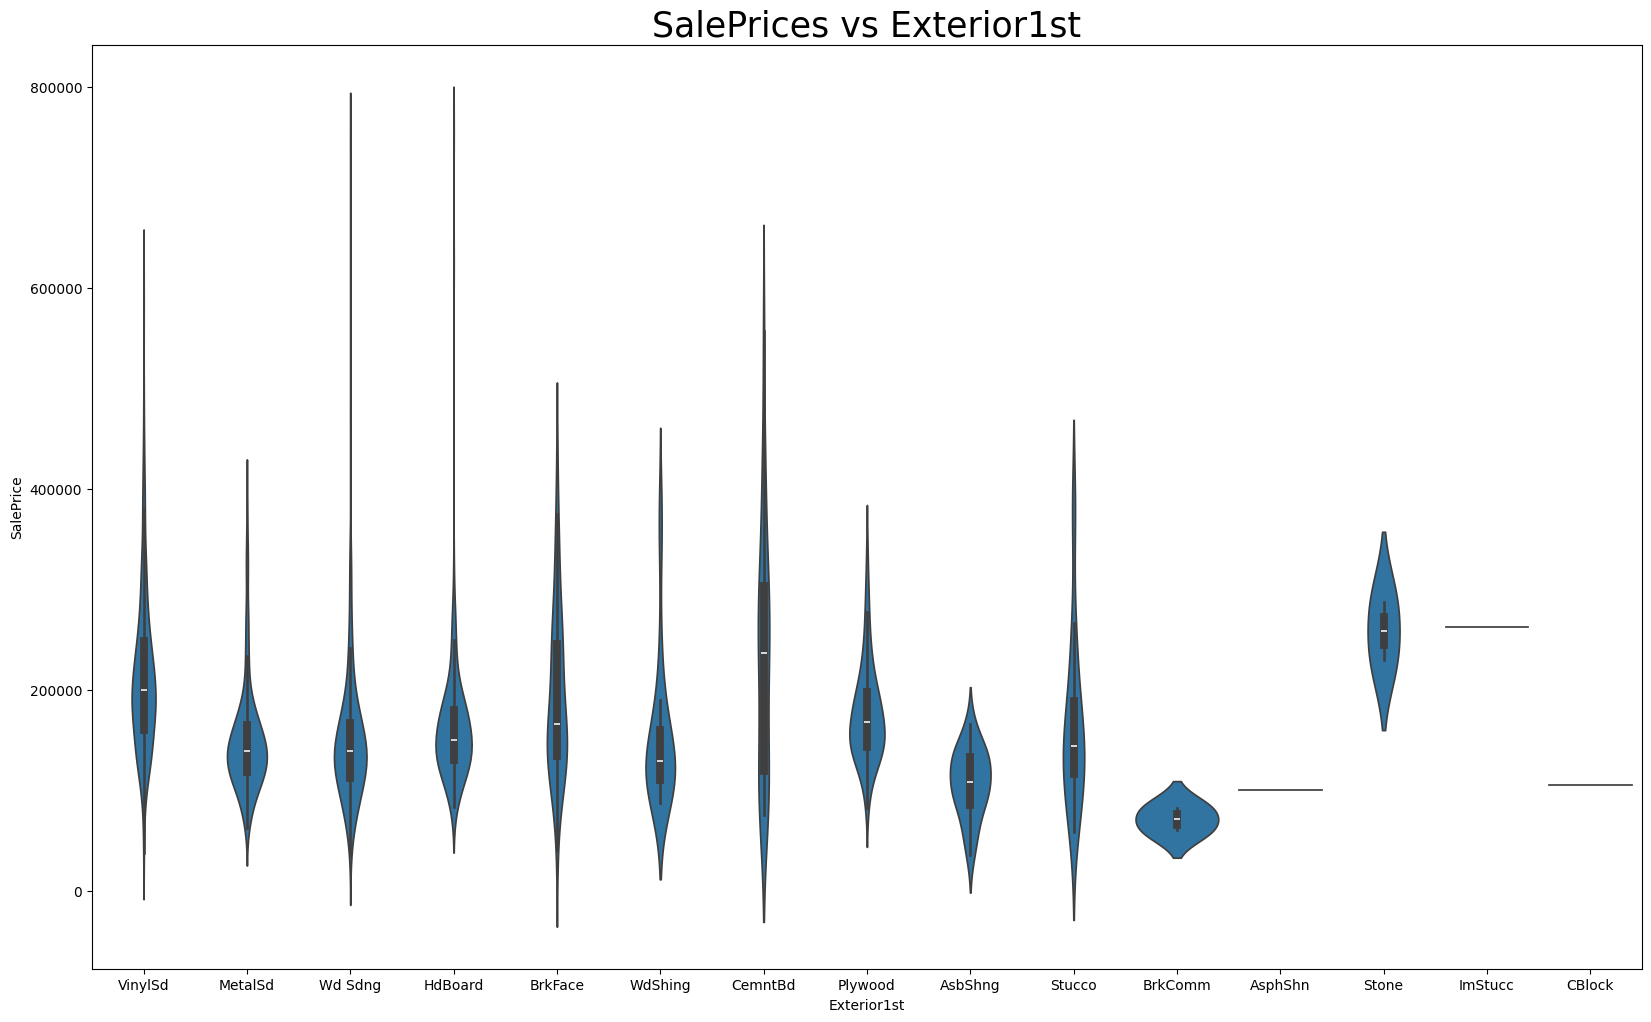

Exterior1st
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
BrkComm    0.001370
Stone      0.001370
AsphShn    0.000685
ImStucc    0.000685
CBlock     0.000685
Name: count, dtype: float64


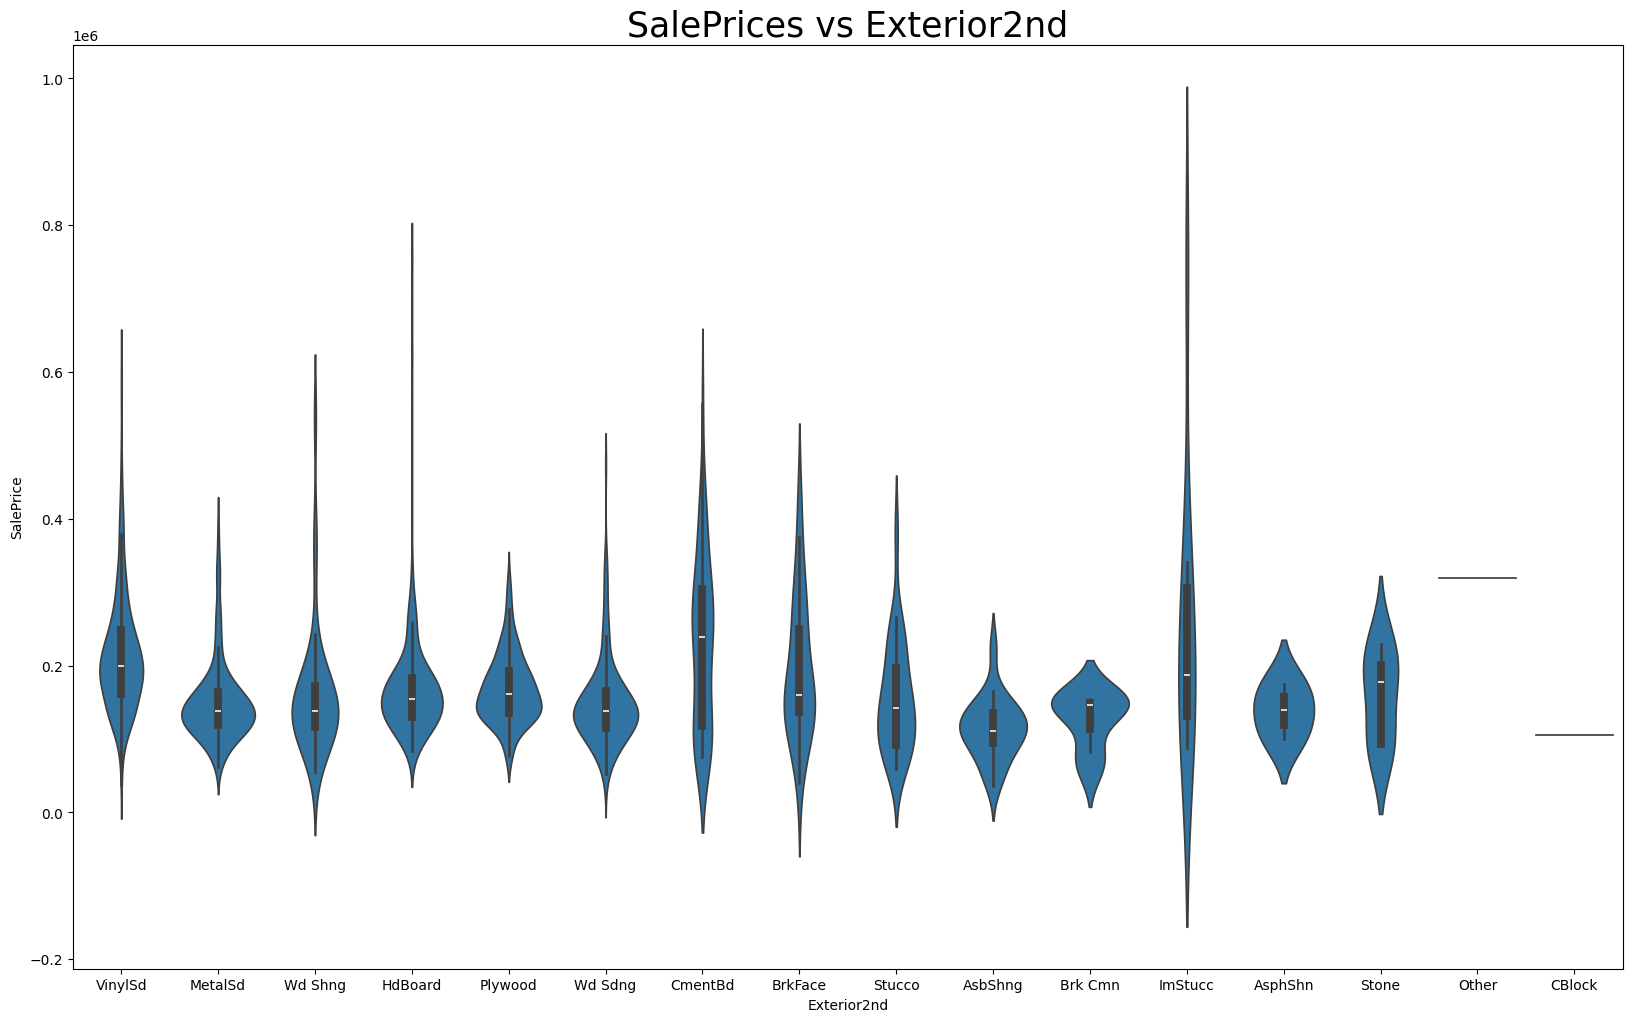

Exterior2nd
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
Other      0.000685
CBlock     0.000685
Name: count, dtype: float64


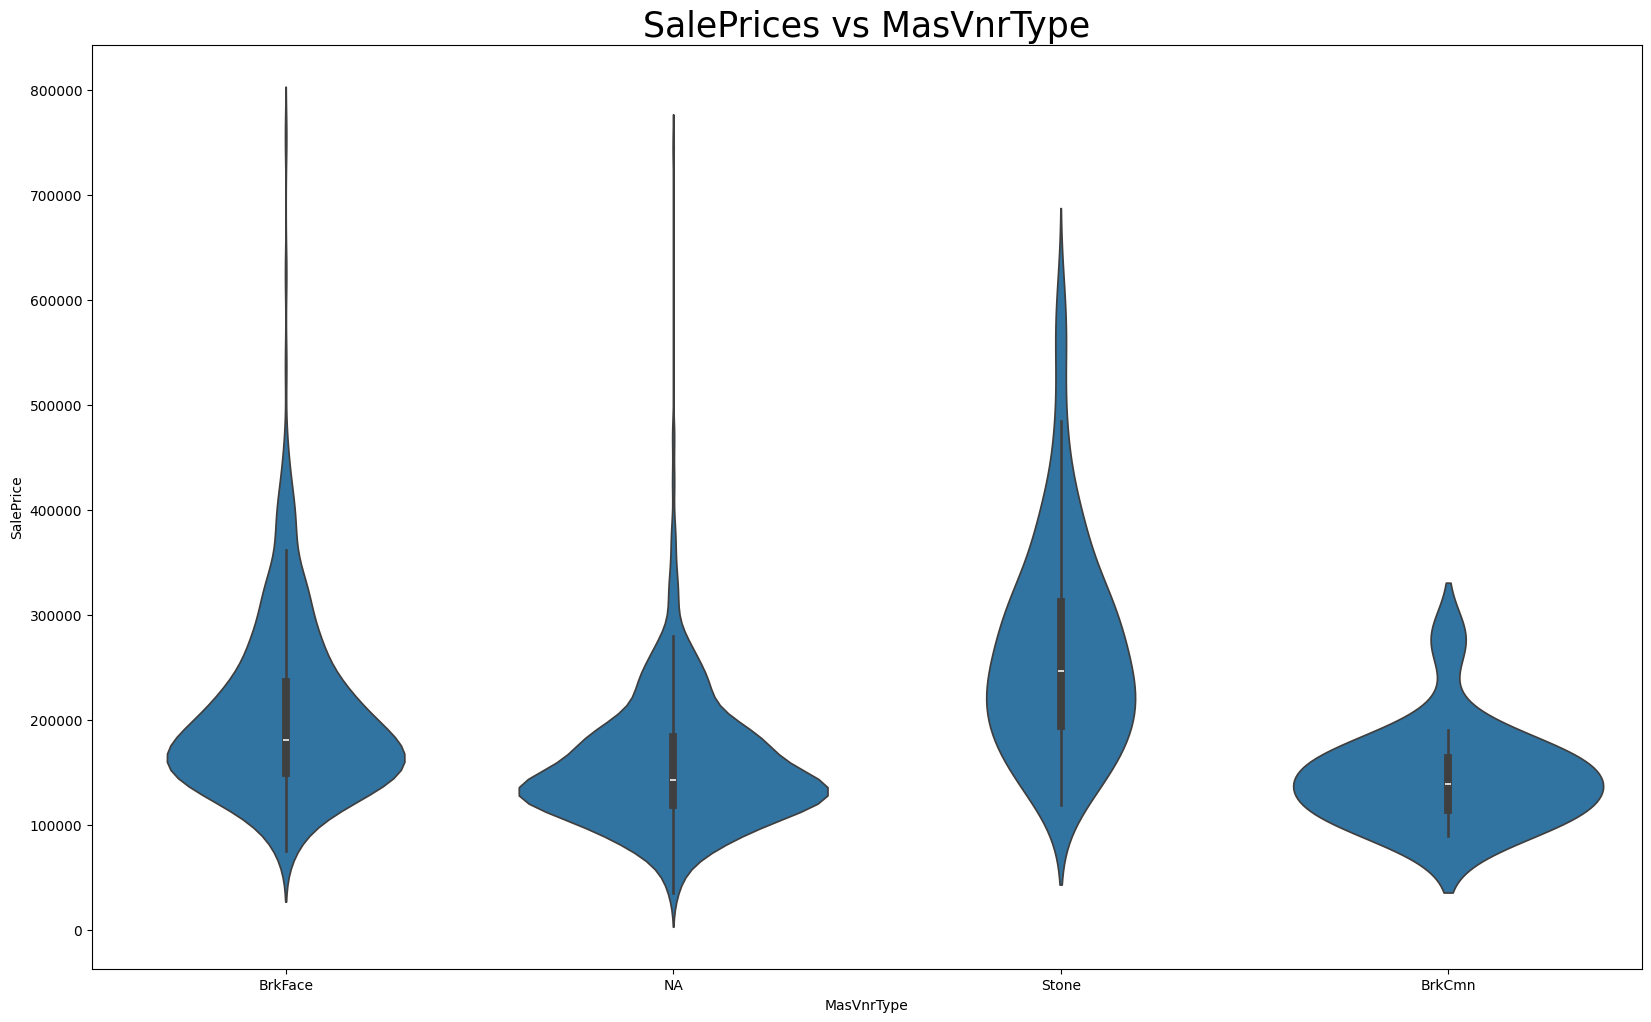

MasVnrType
NA         0.597260
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: count, dtype: float64


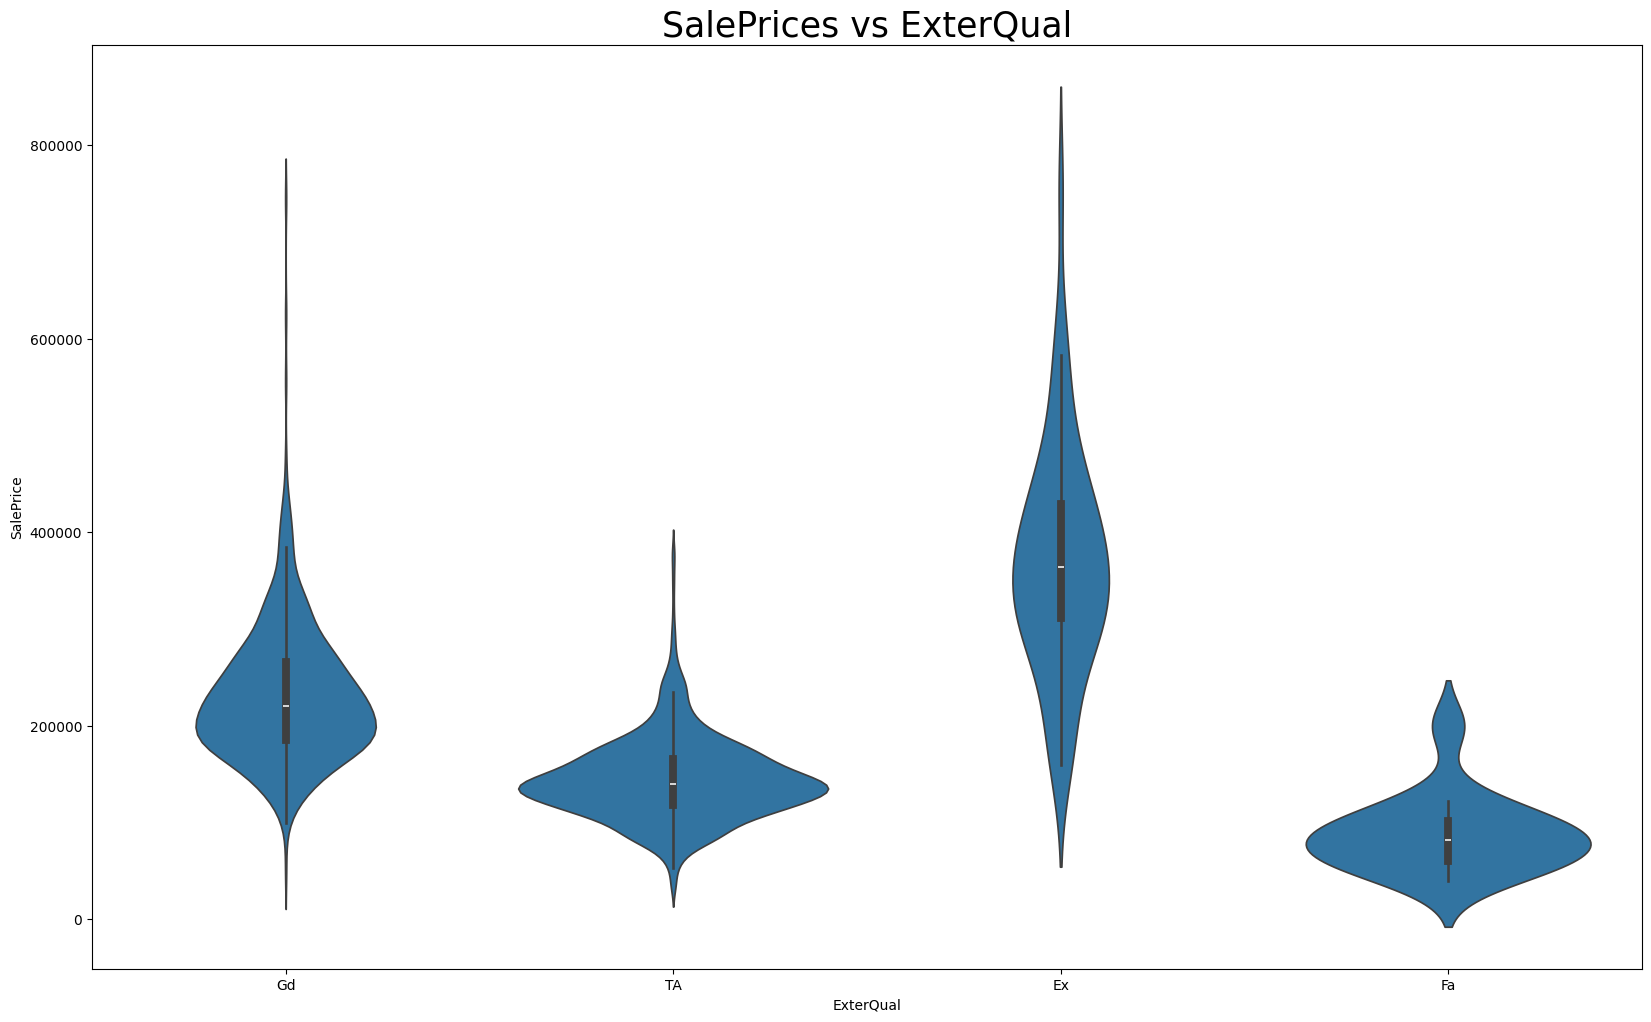

ExterQual
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: count, dtype: float64


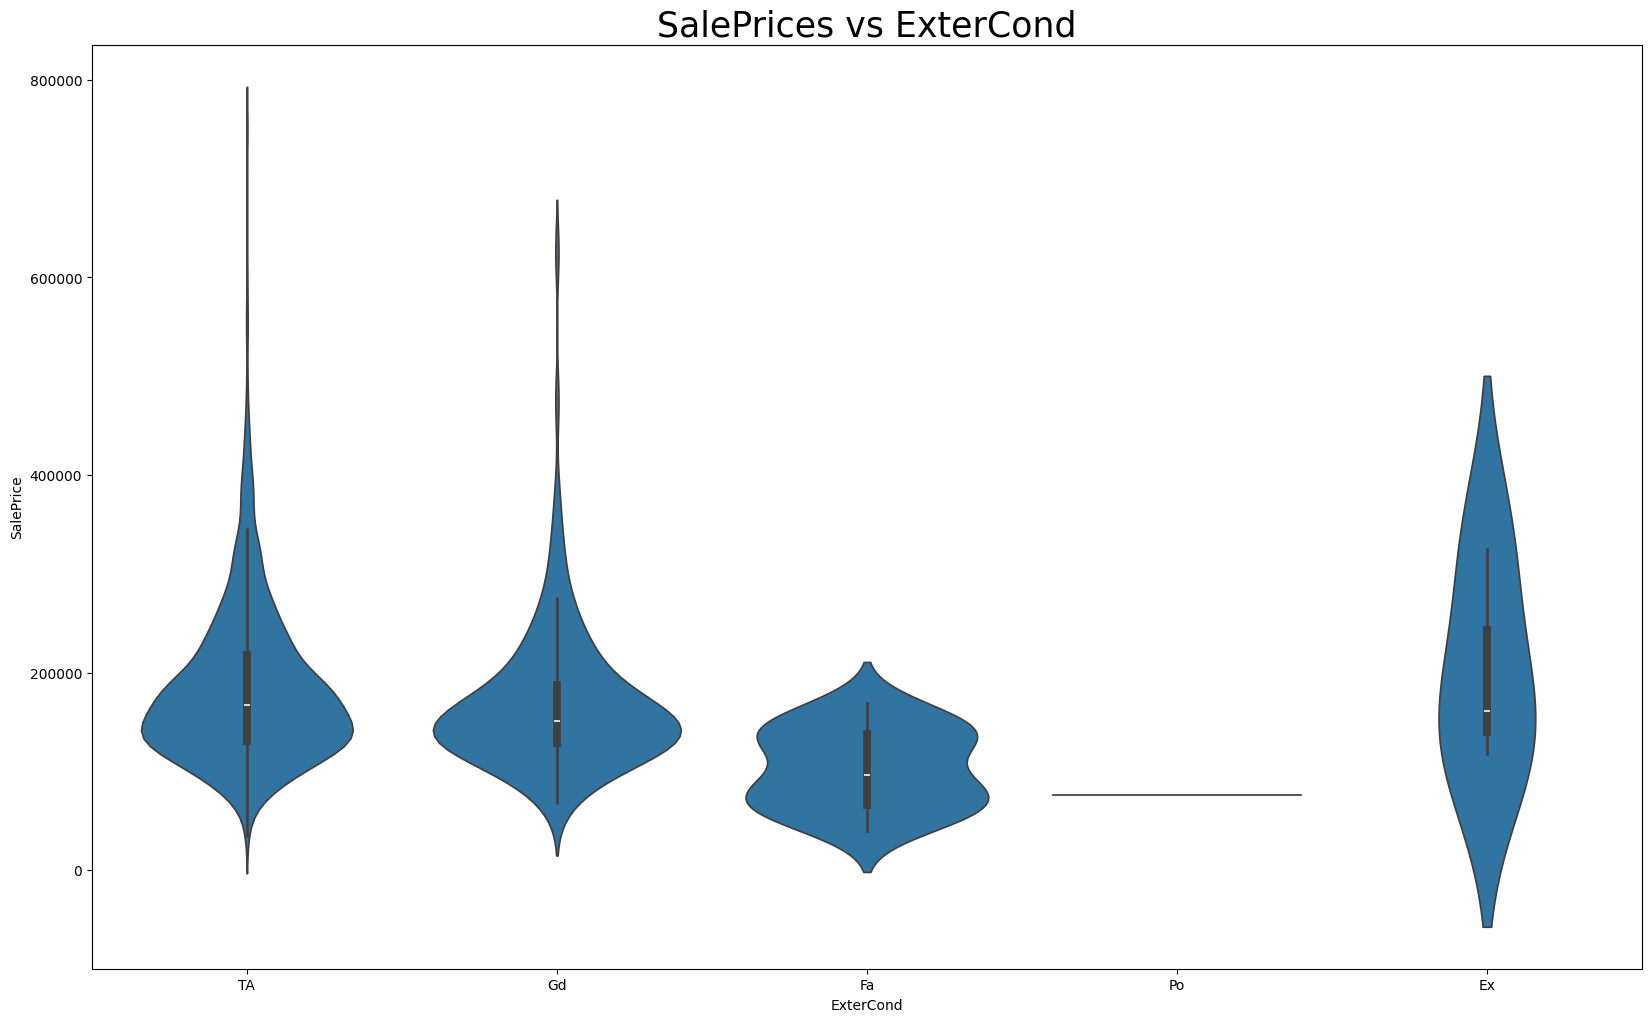

ExterCond
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: count, dtype: float64


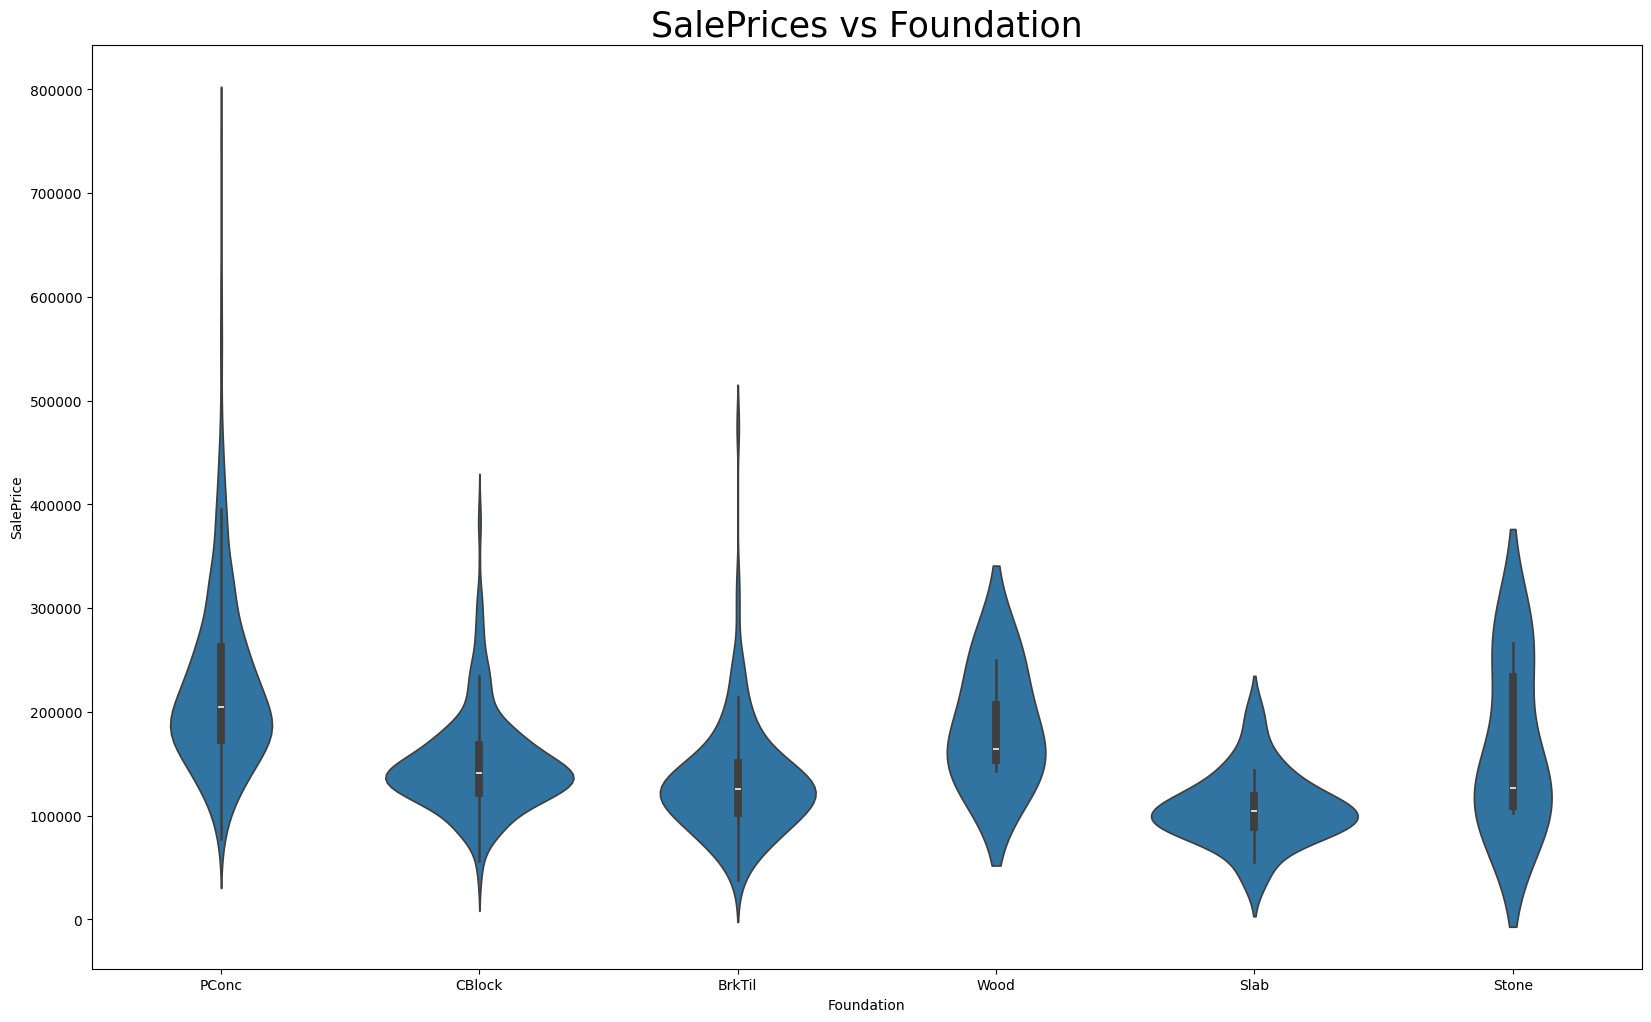

Foundation
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: count, dtype: float64


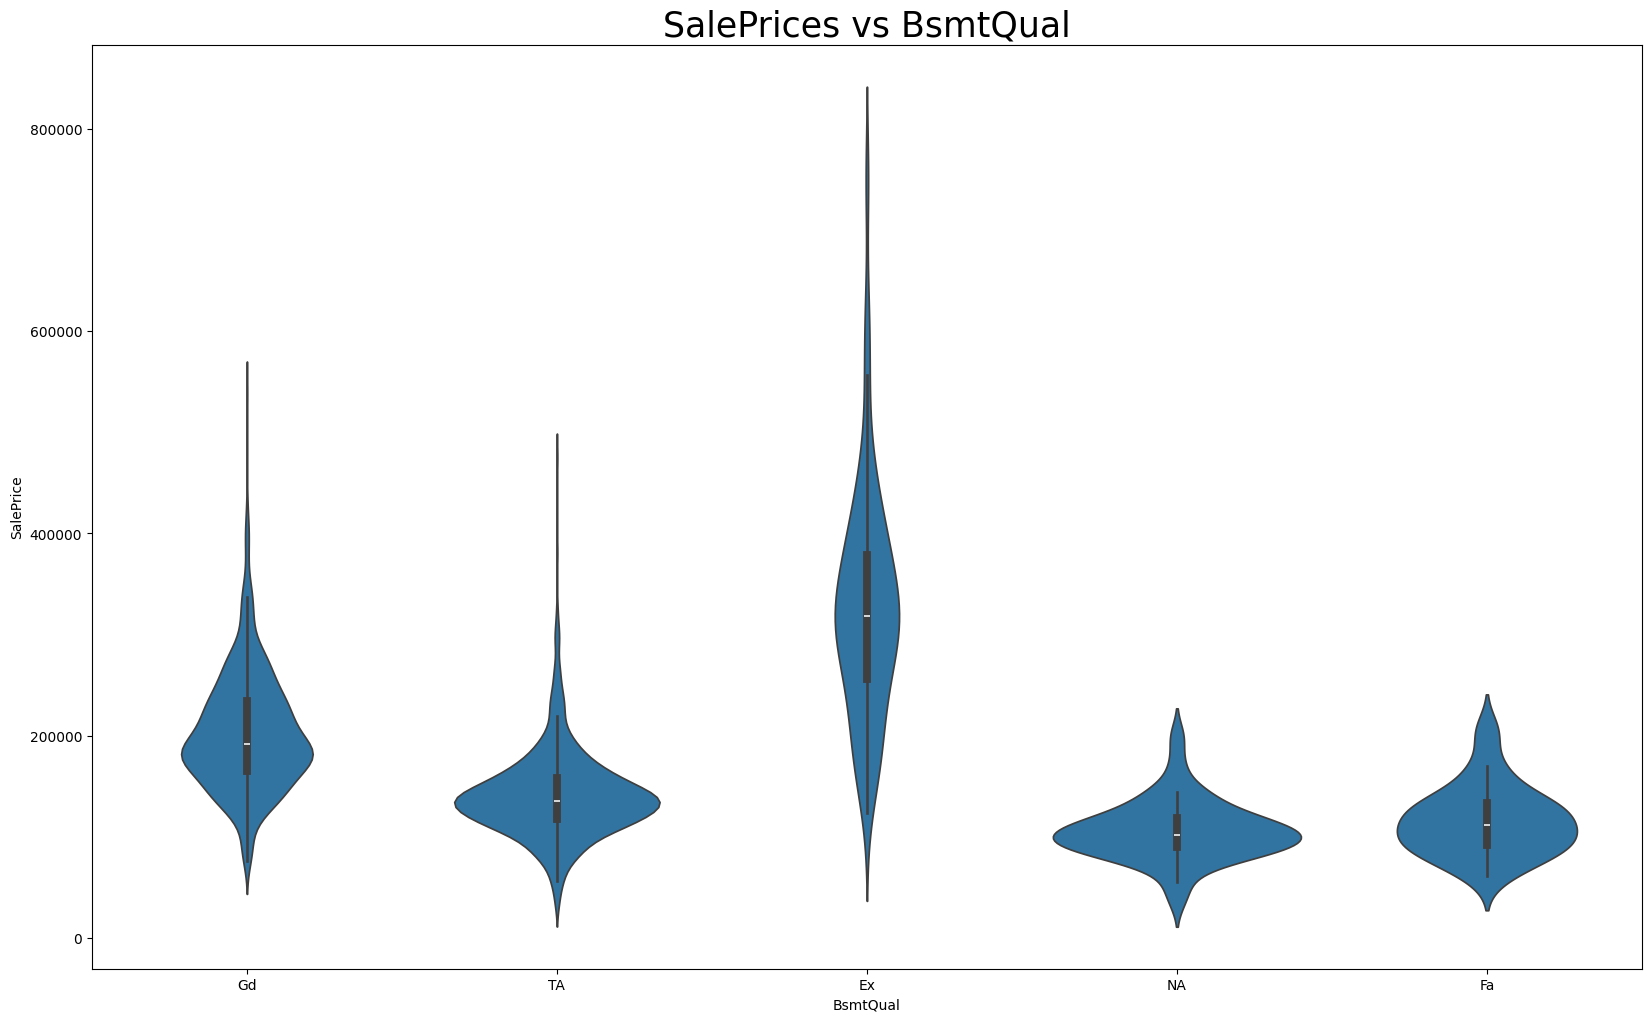

BsmtQual
TA    0.444521
Gd    0.423288
Ex    0.082877
NA    0.025342
Fa    0.023973
Name: count, dtype: float64


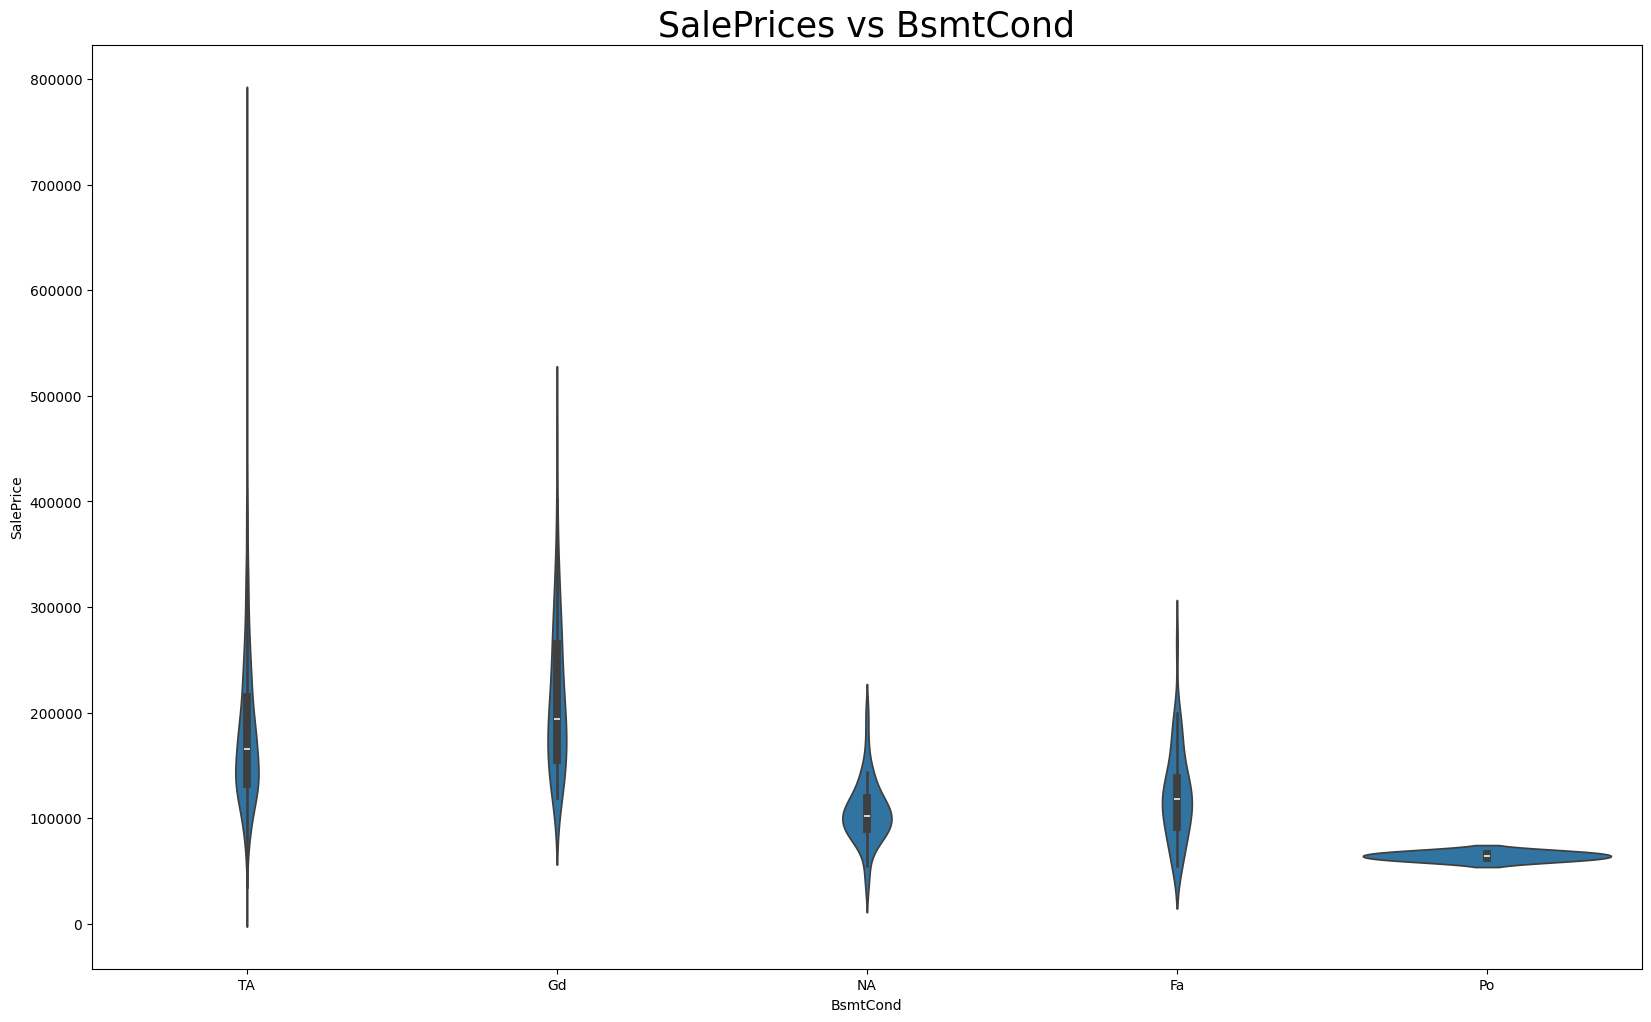

BsmtCond
TA    0.897945
Gd    0.044521
Fa    0.030822
NA    0.025342
Po    0.001370
Name: count, dtype: float64


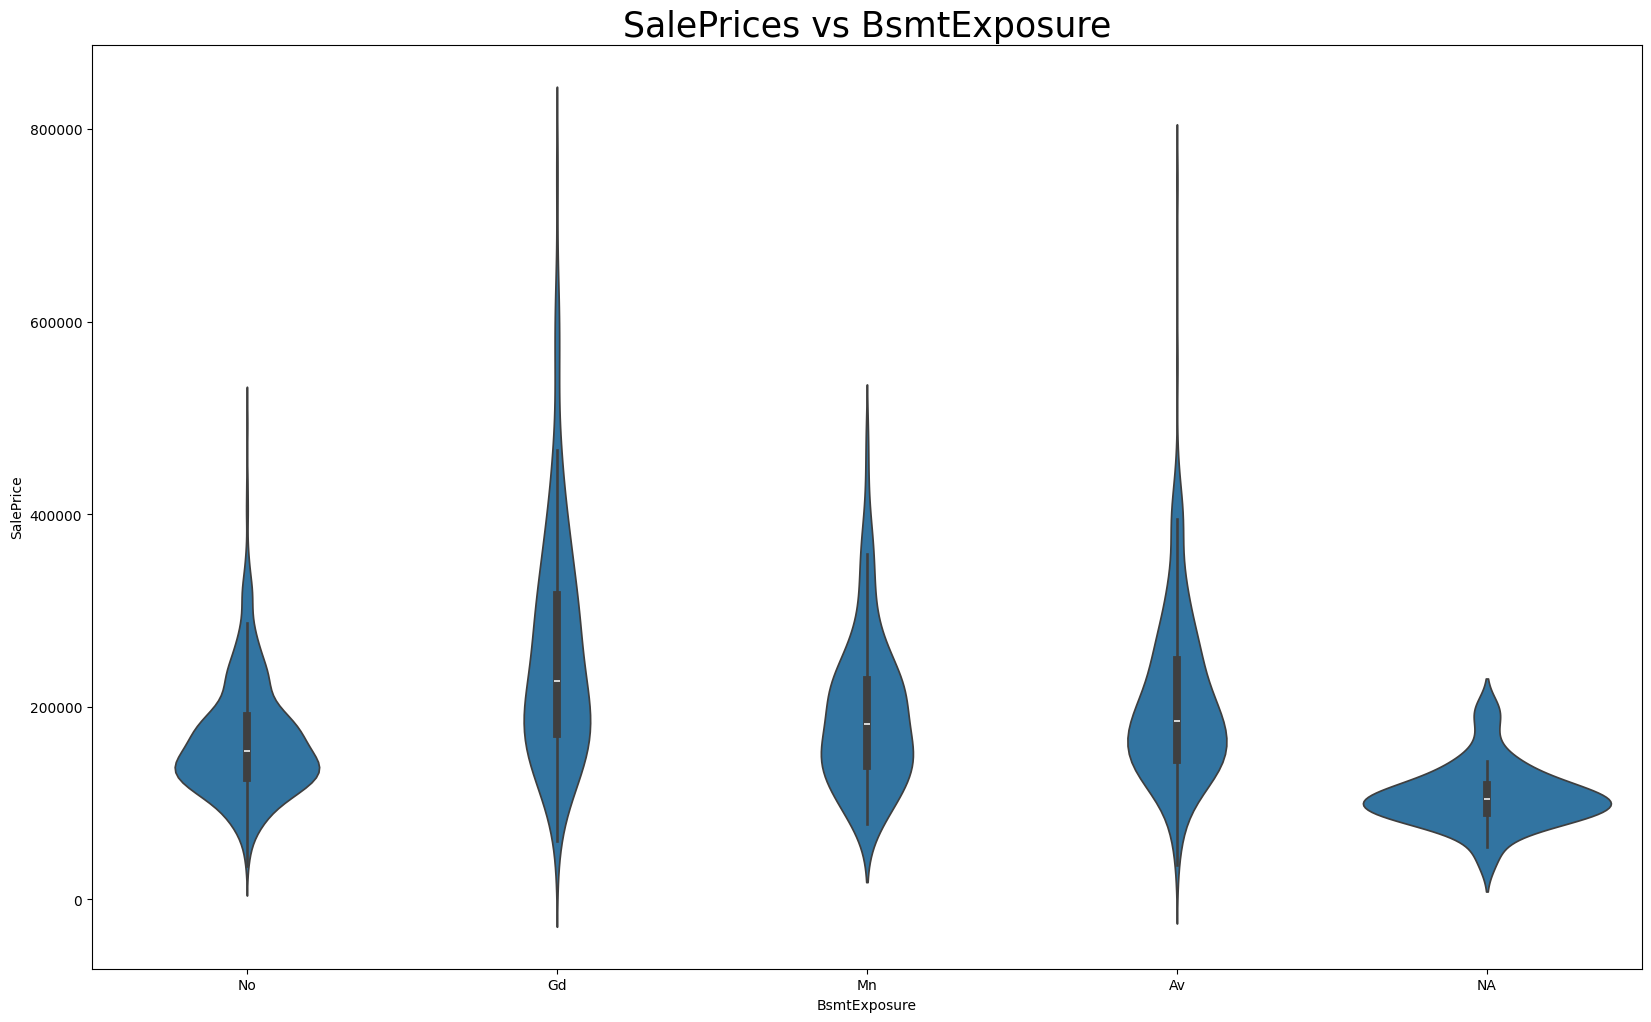

BsmtExposure
No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
NA    0.026027
Name: count, dtype: float64


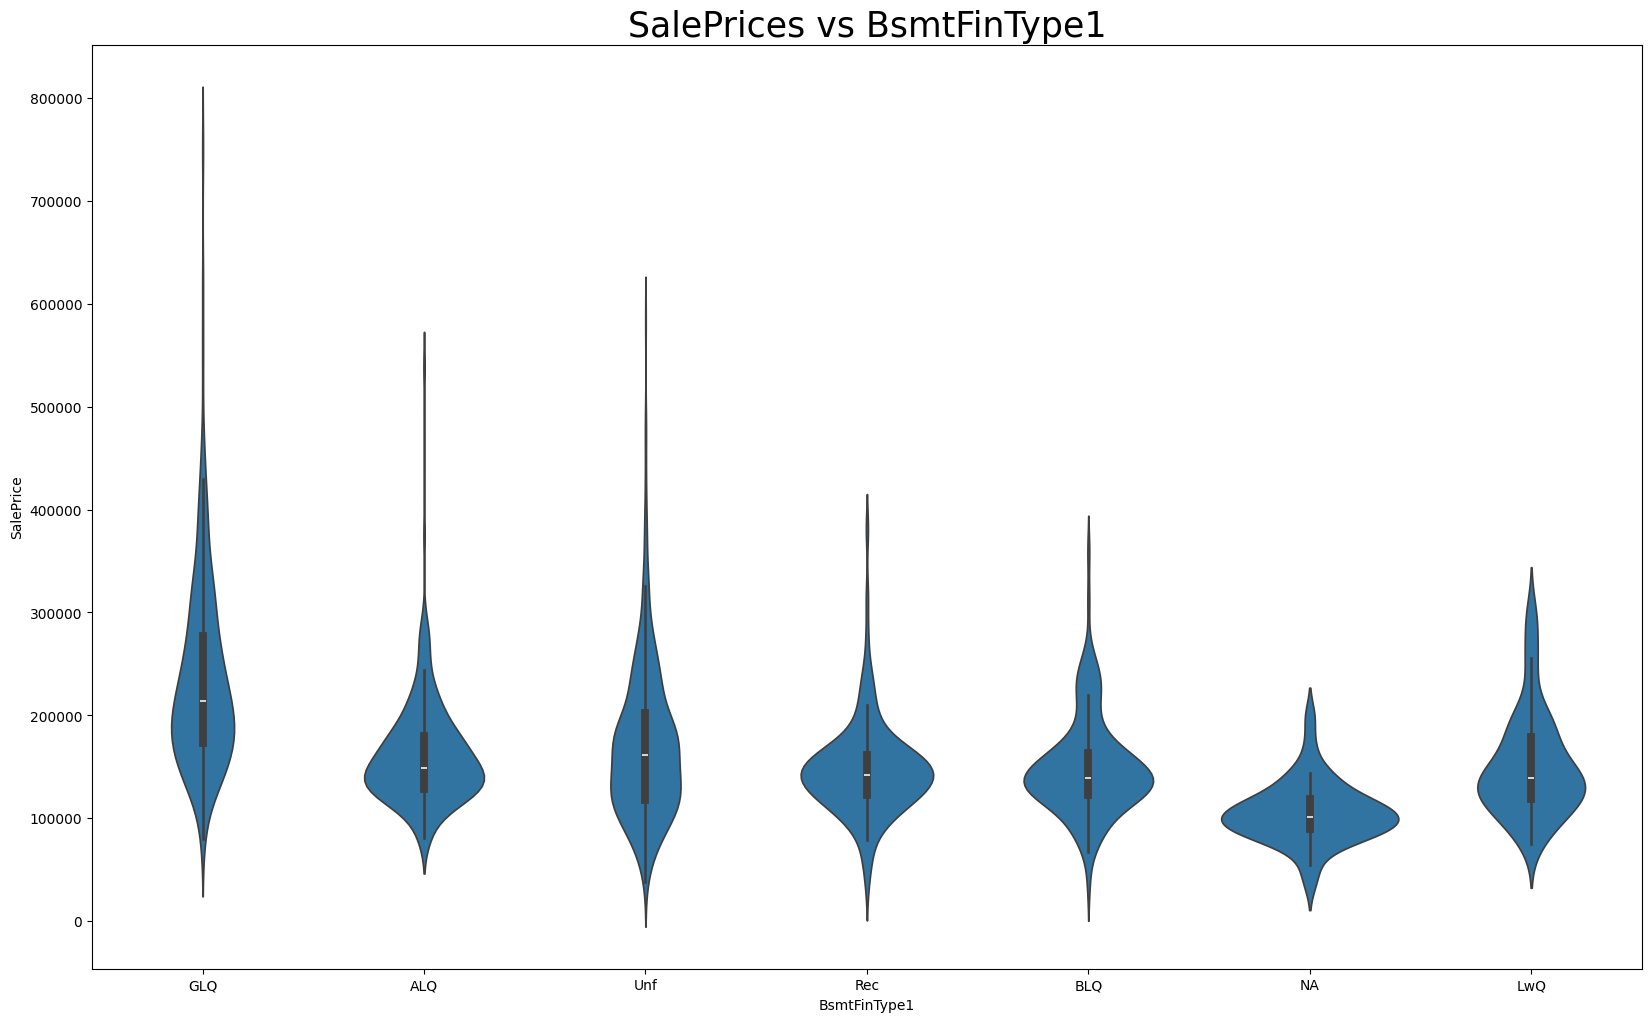

BsmtFinType1
Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
NA     0.025342
Name: count, dtype: float64


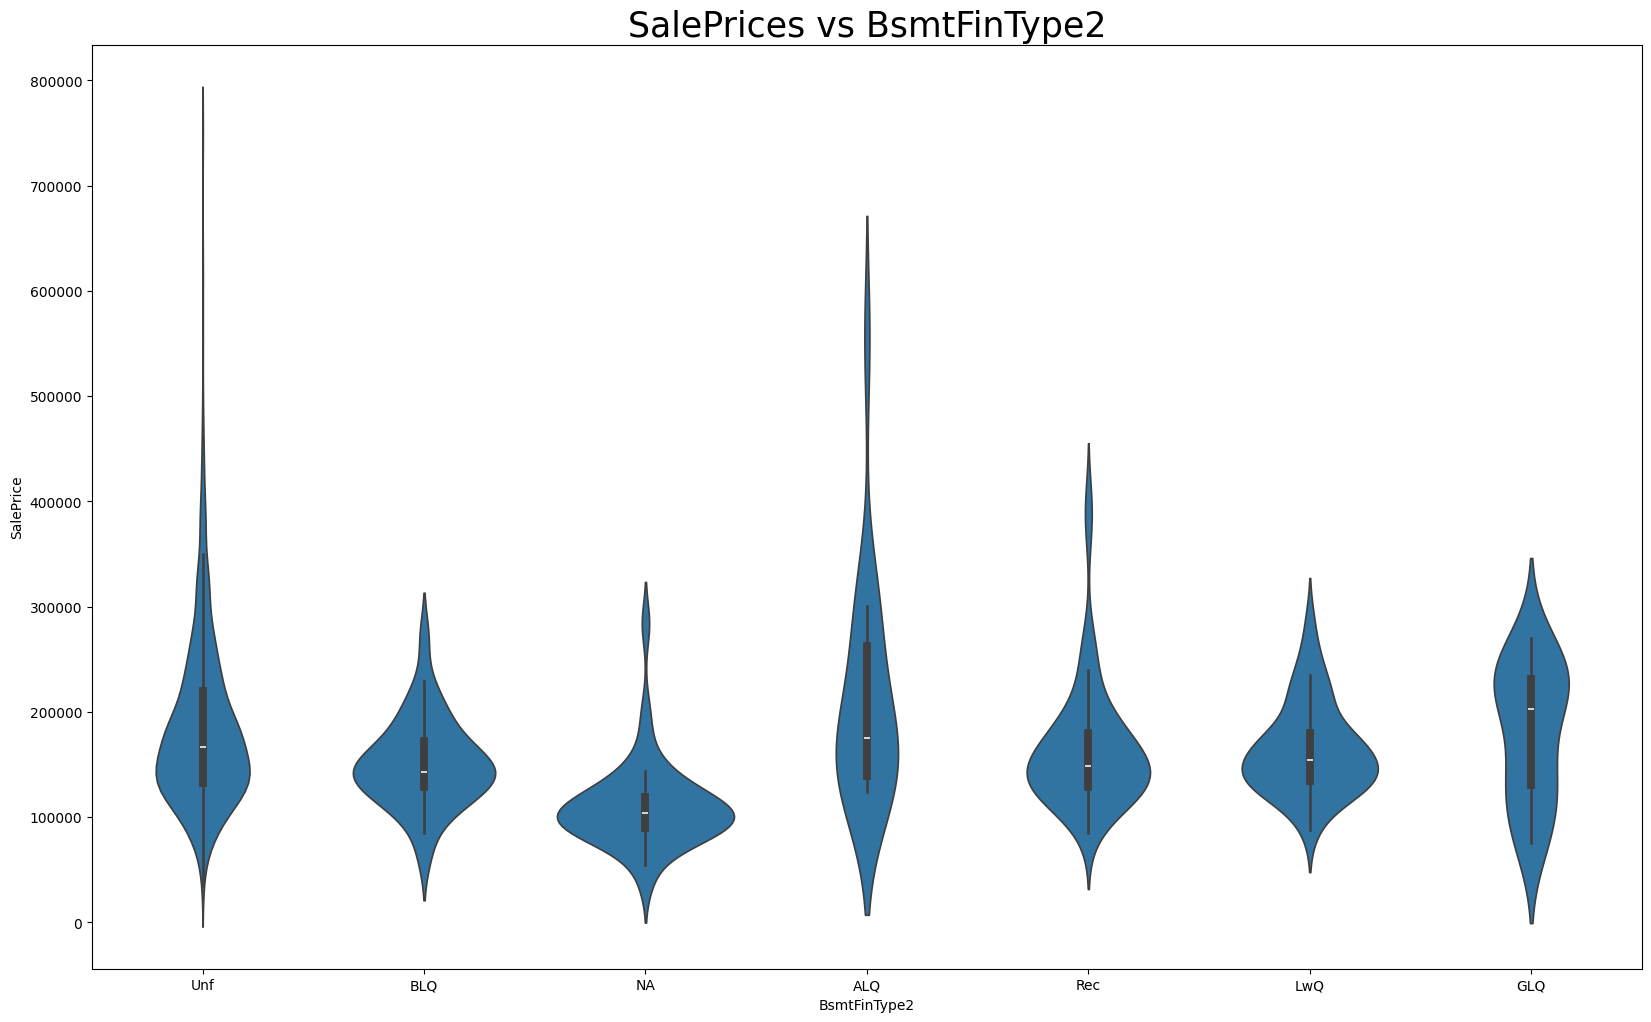

BsmtFinType2
Unf    0.860274
Rec    0.036986
LwQ    0.031507
NA     0.026027
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: count, dtype: float64


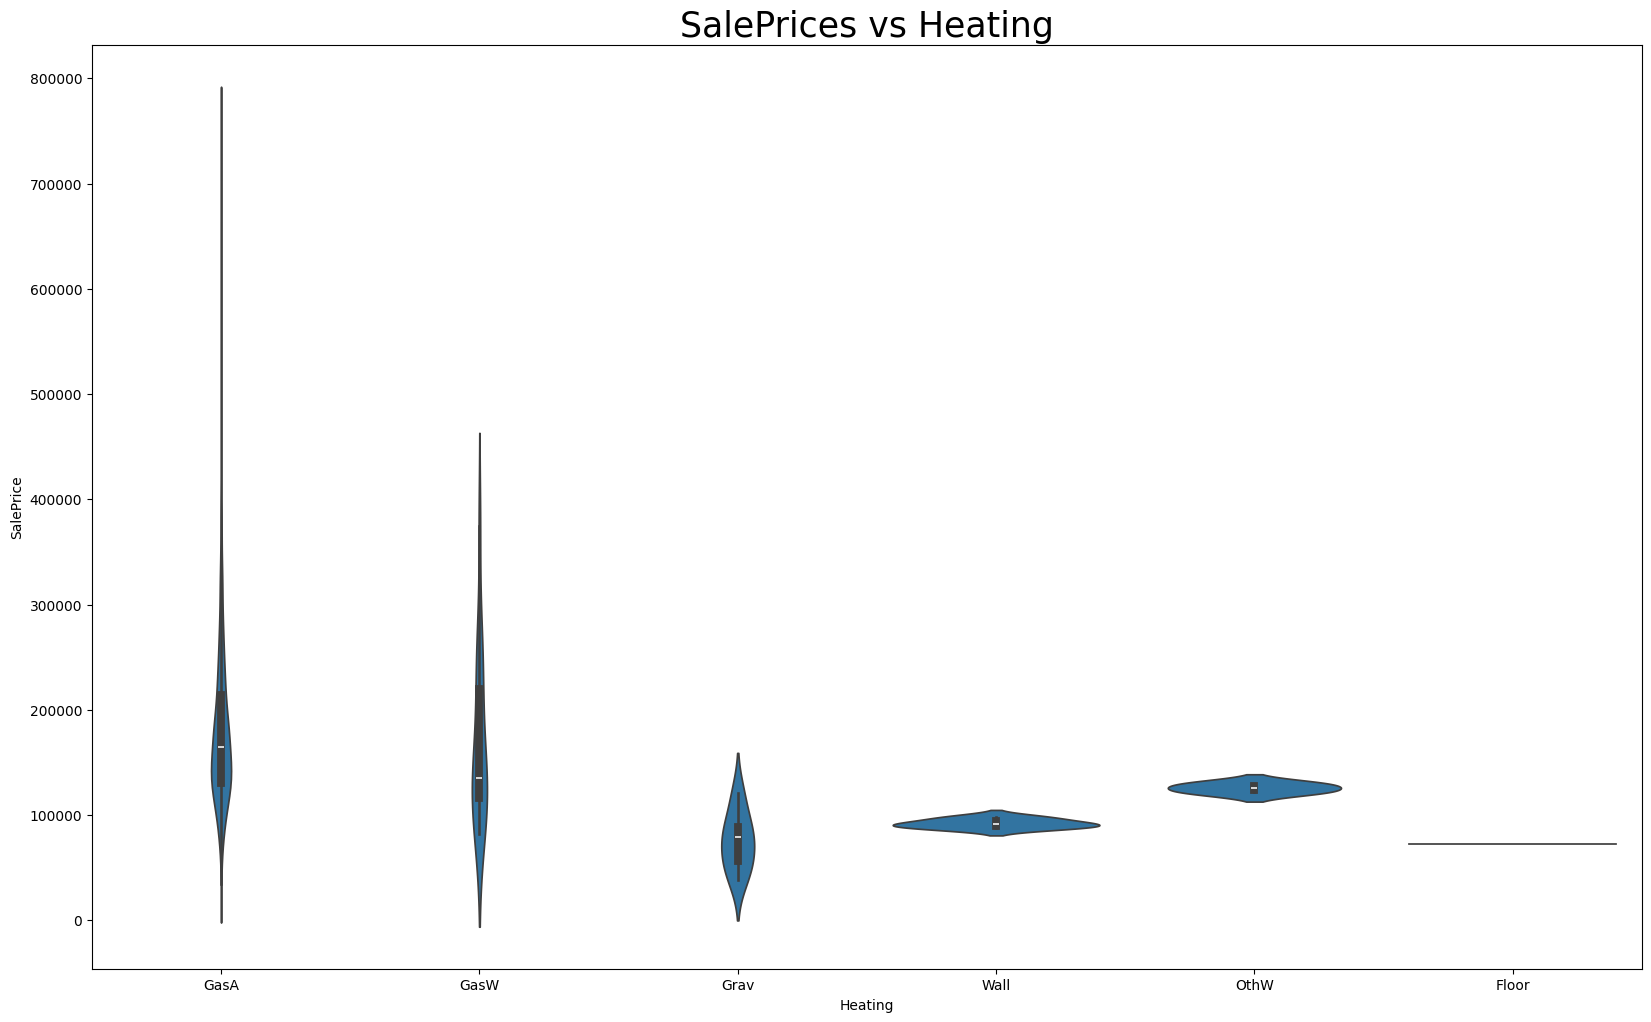

Heating
GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: count, dtype: float64


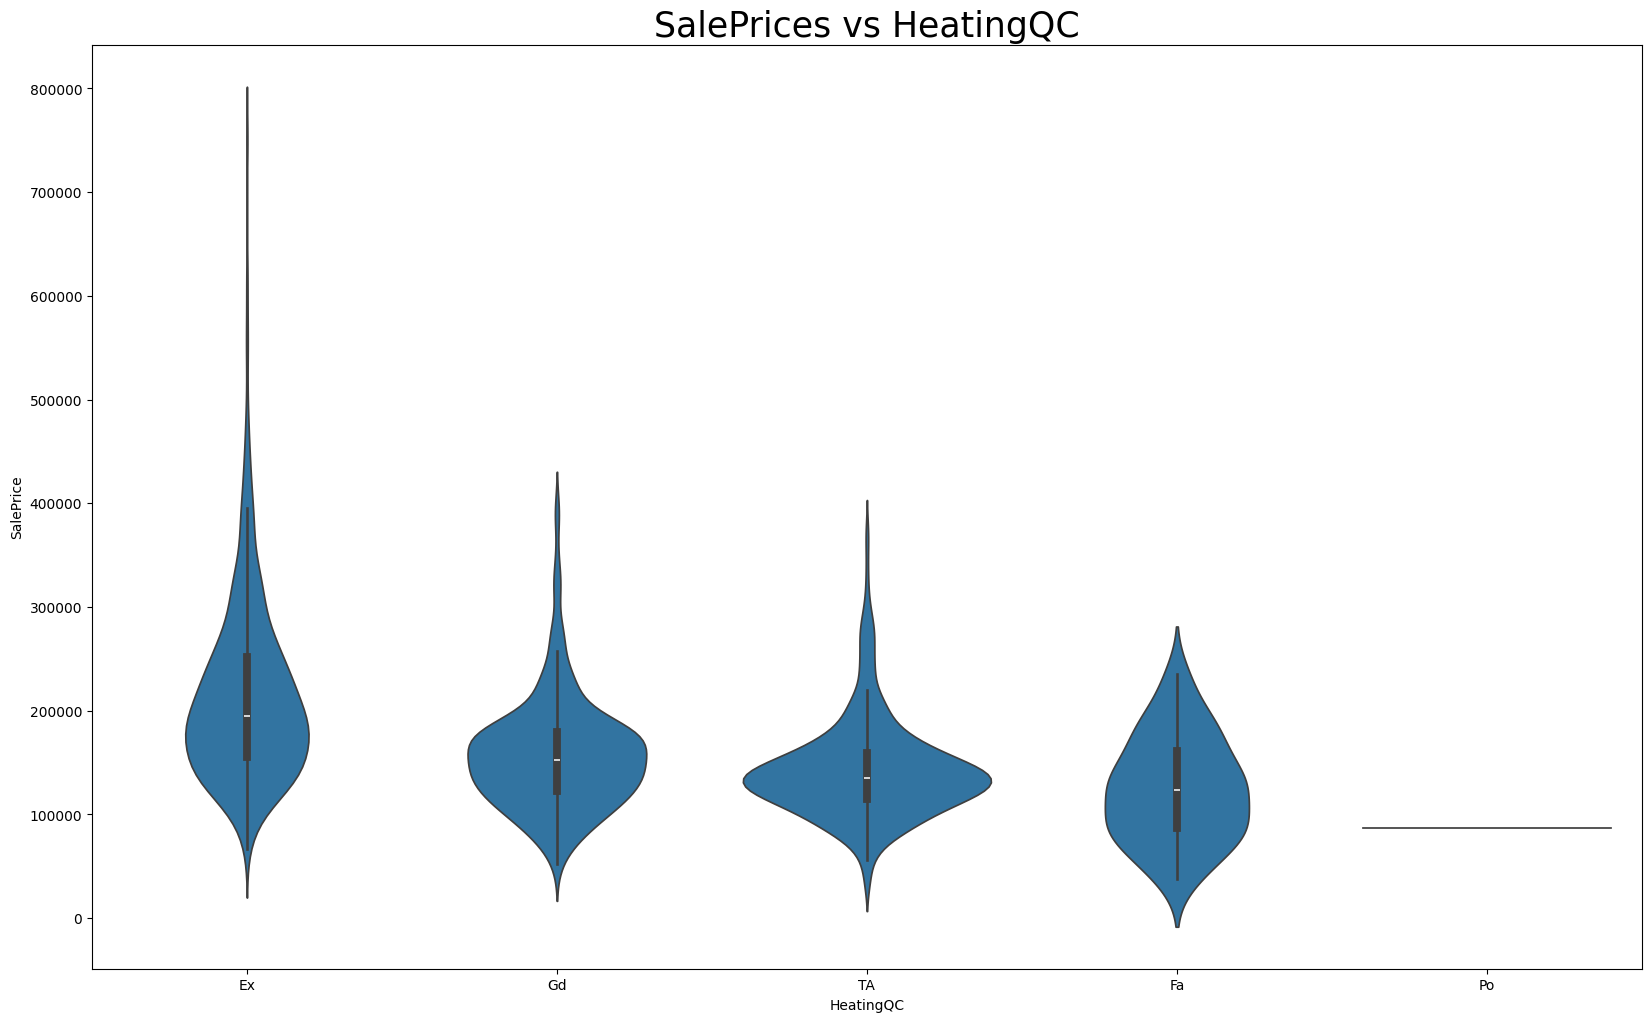

HeatingQC
Ex    0.507534
TA    0.293151
Gd    0.165068
Fa    0.033562
Po    0.000685
Name: count, dtype: float64


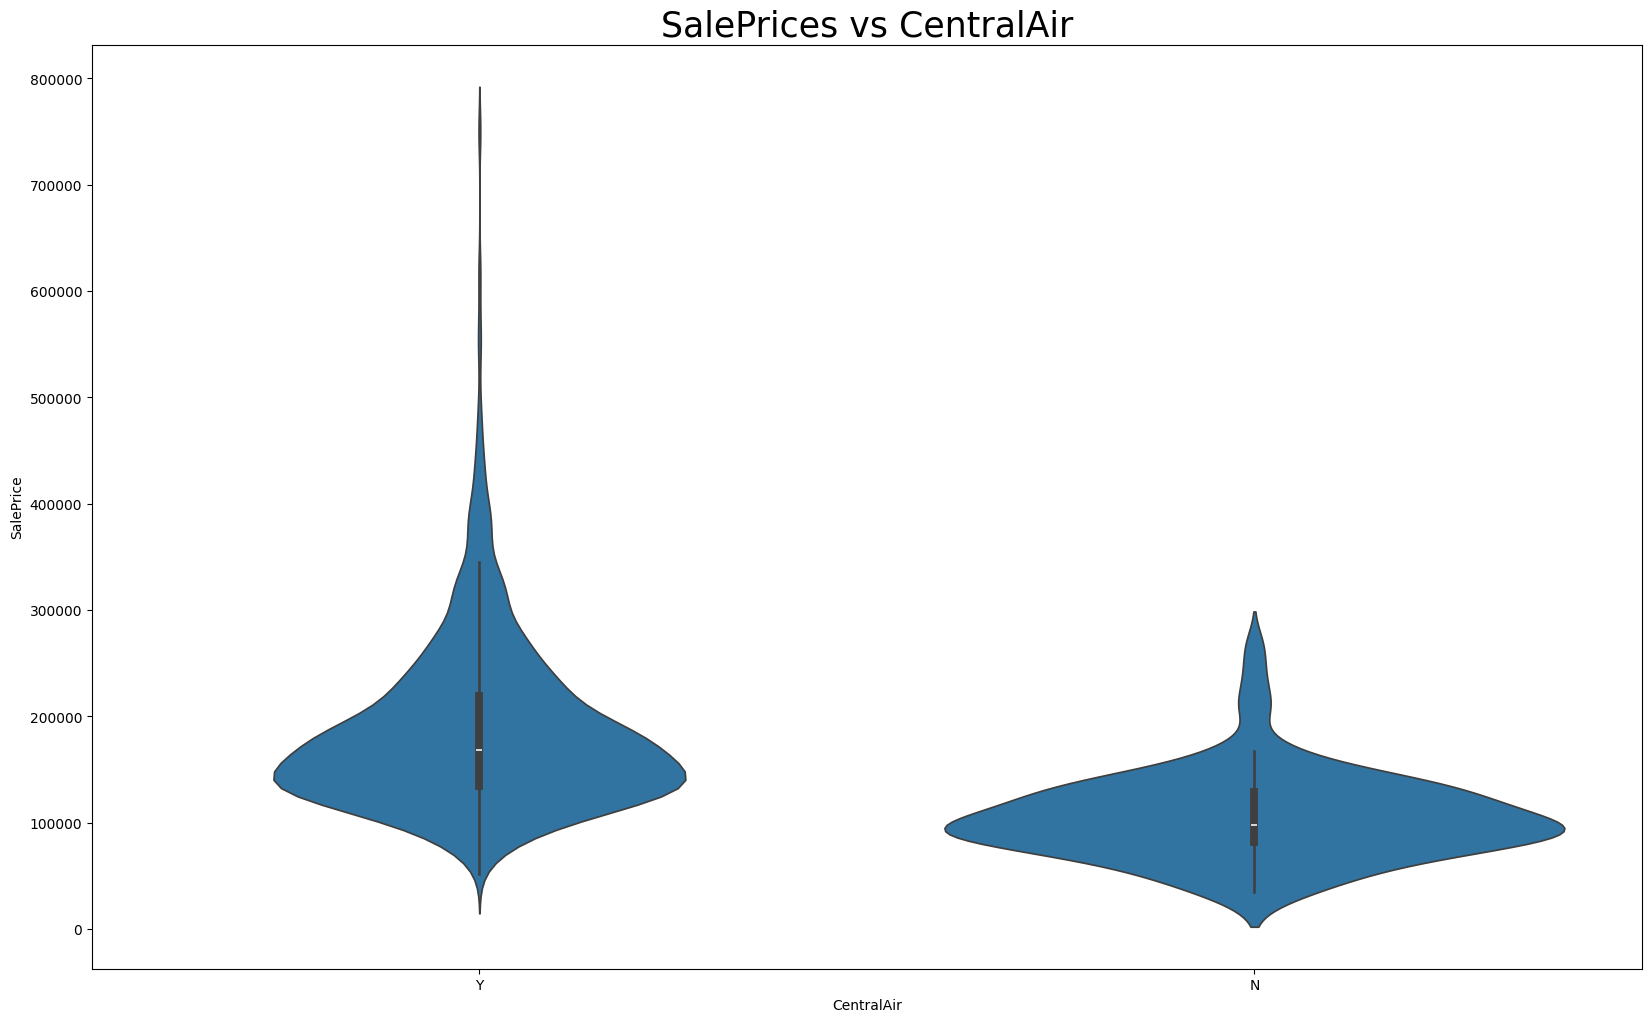

CentralAir
Y    0.934932
N    0.065068
Name: count, dtype: float64


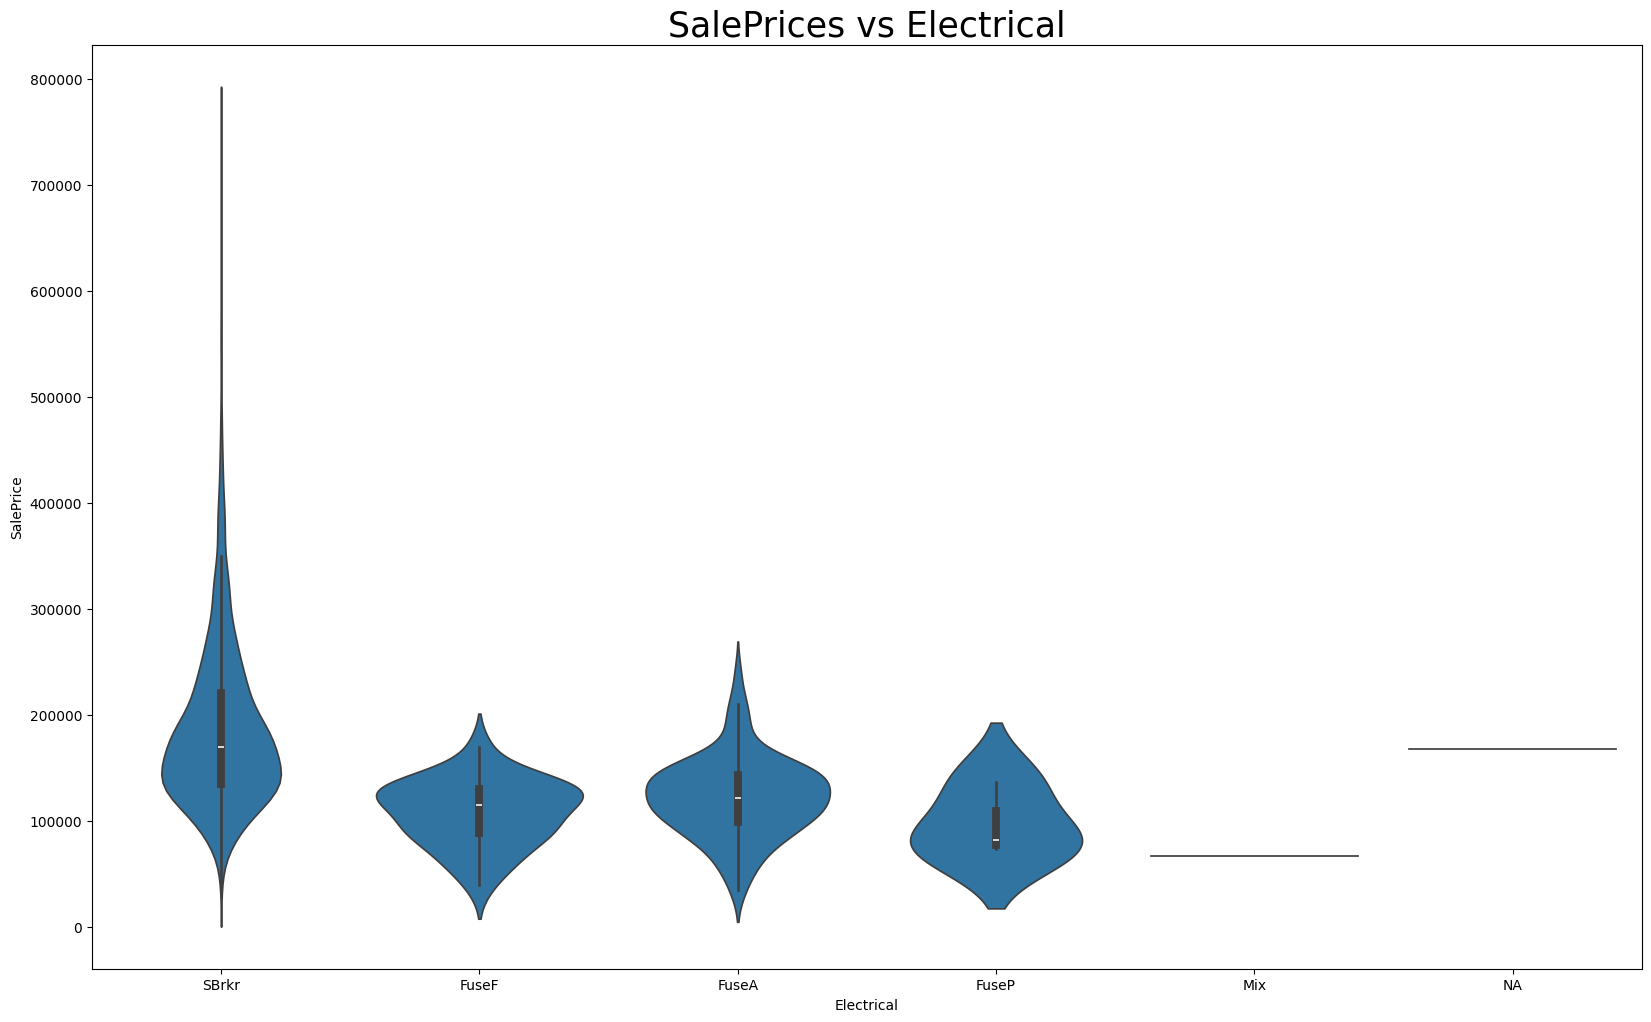

Electrical
SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
NA       0.000685
Name: count, dtype: float64


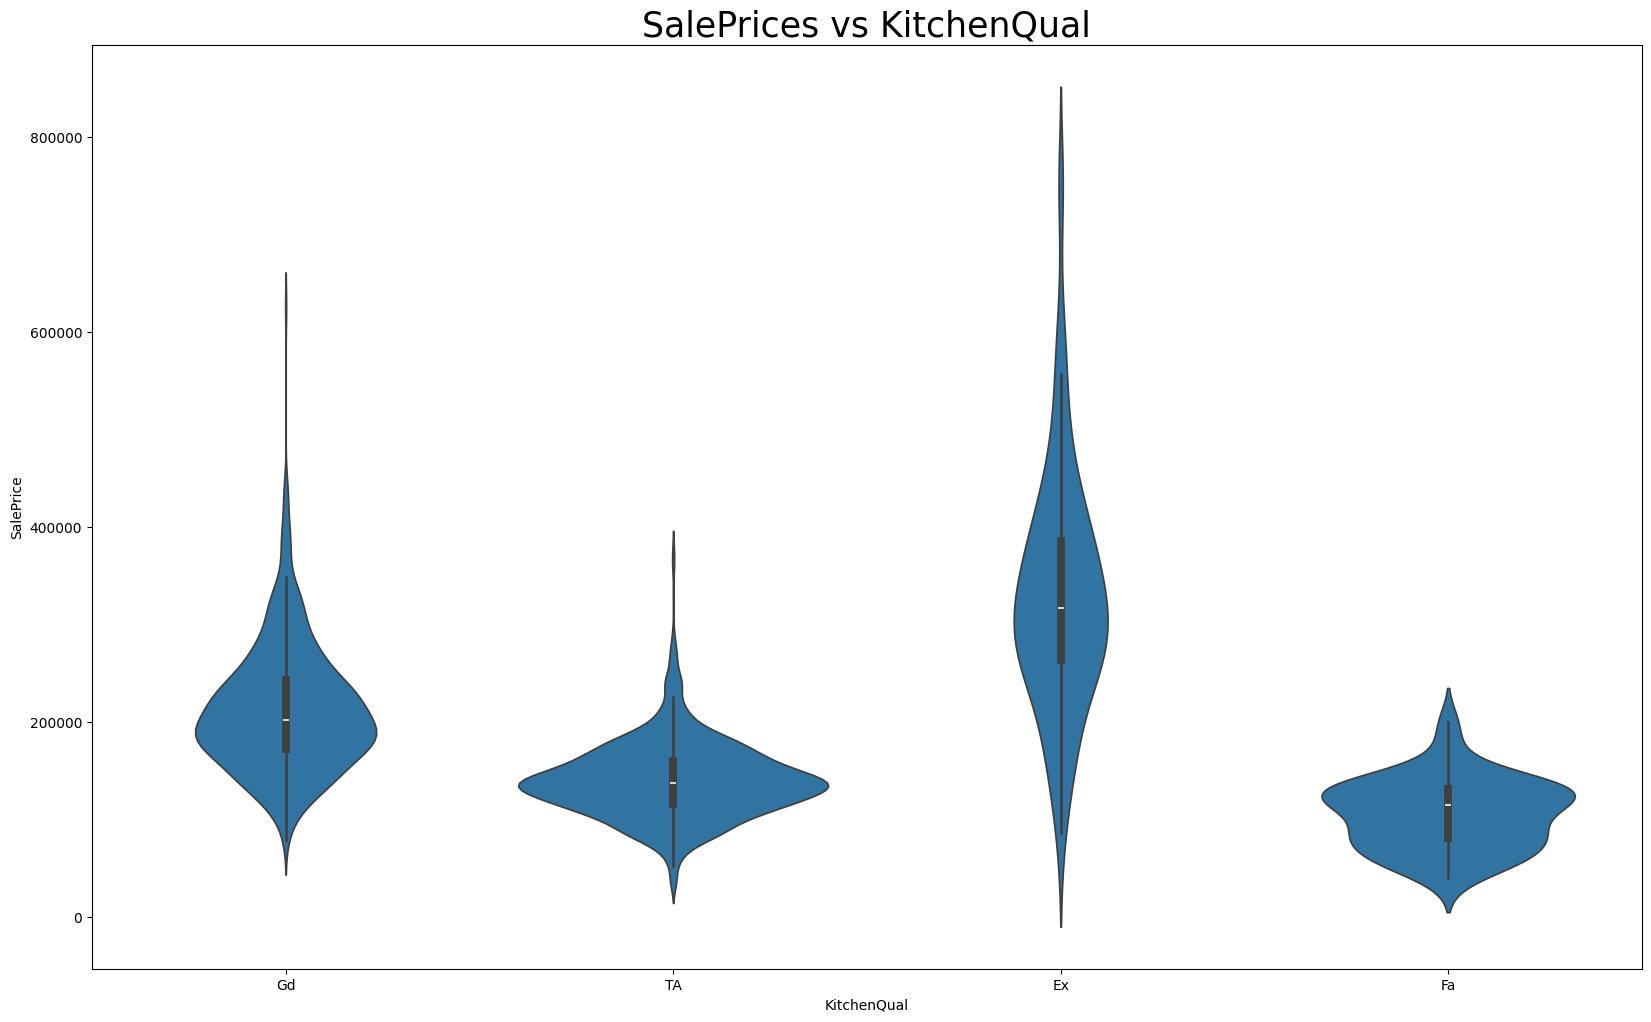

KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: count, dtype: float64


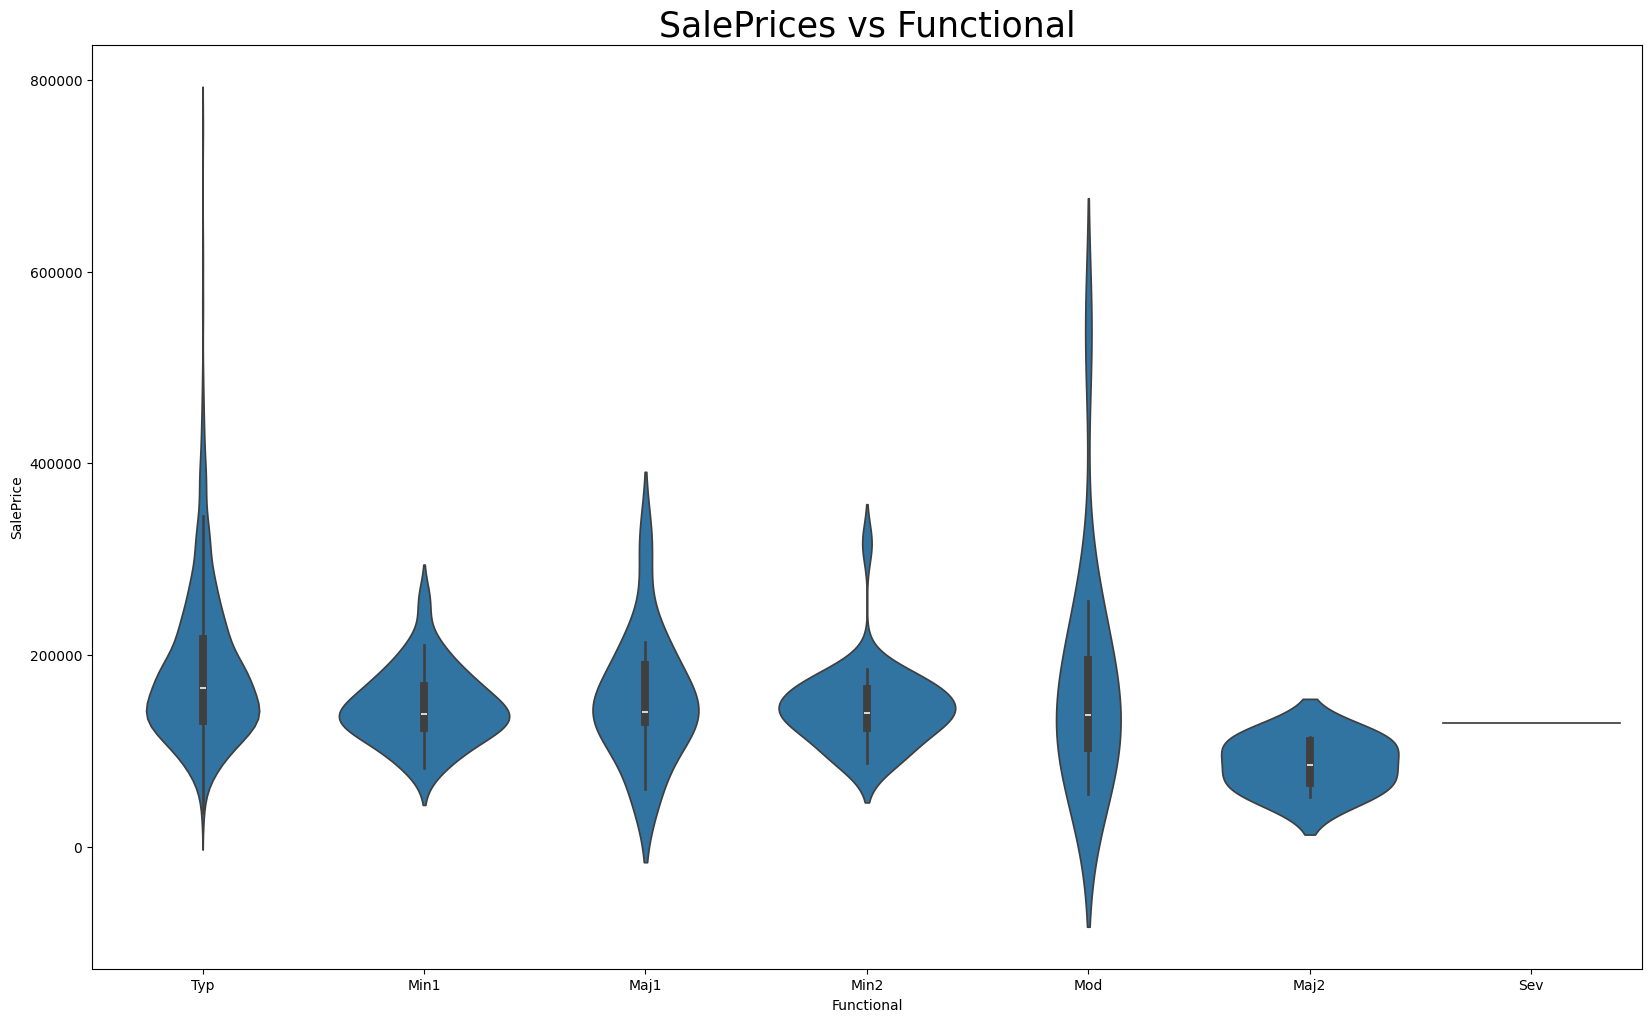

Functional
Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: count, dtype: float64


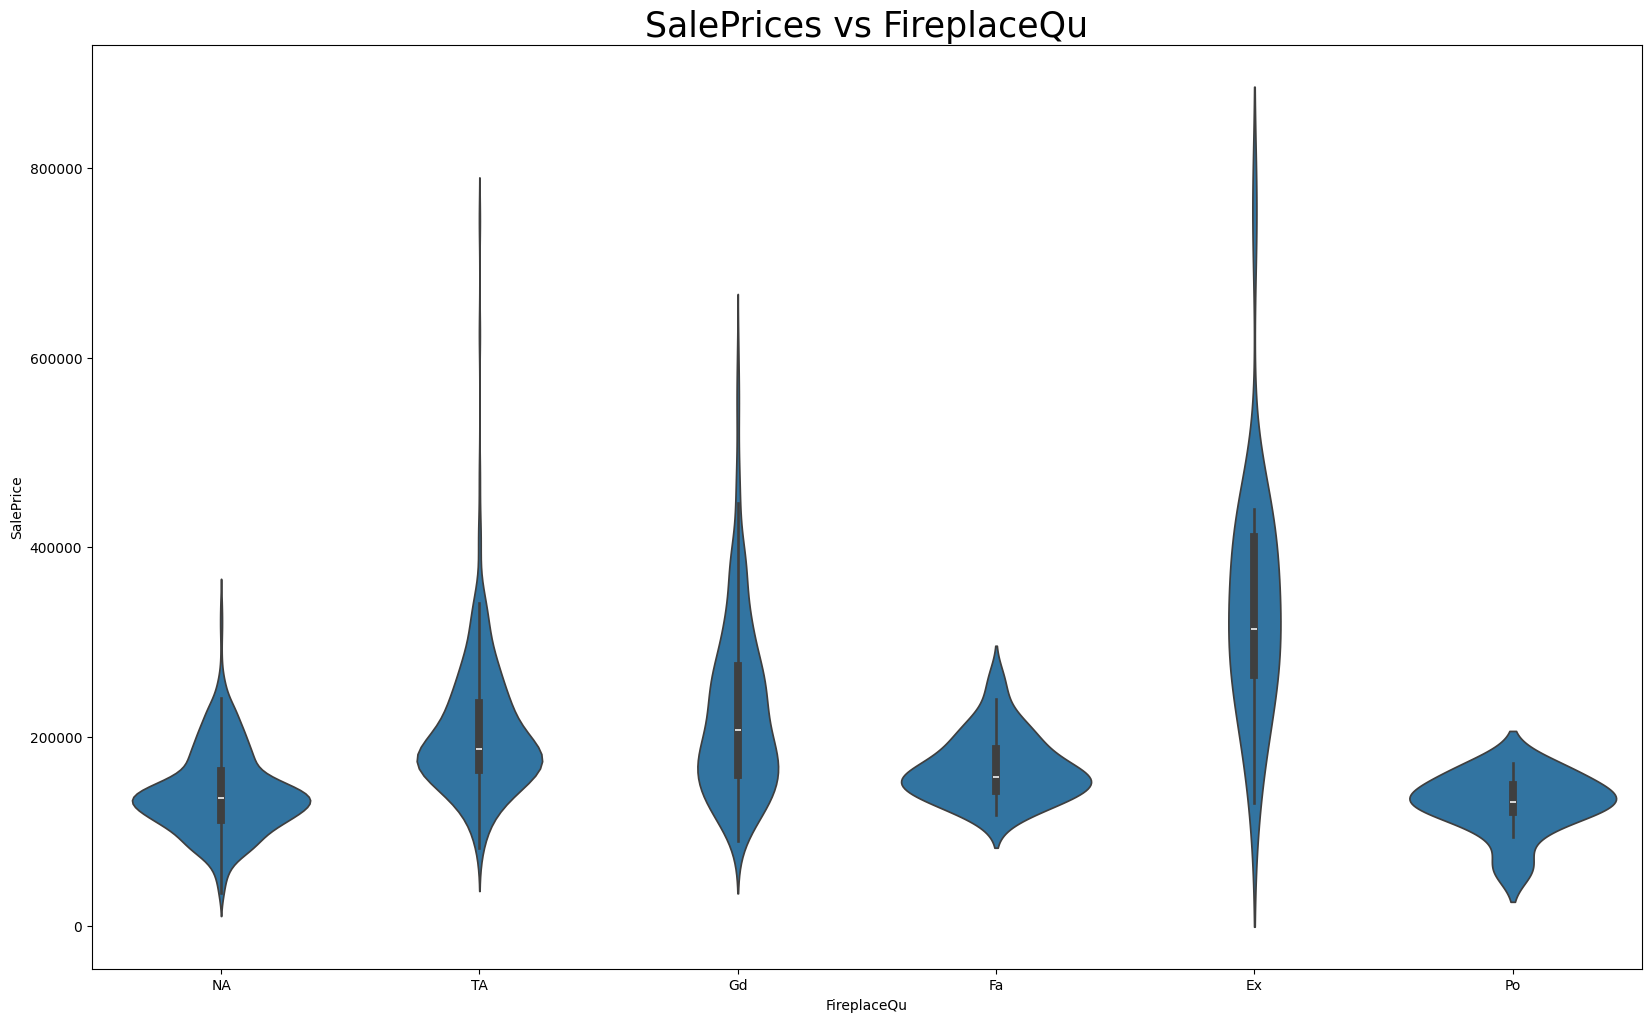

FireplaceQu
NA    0.472603
Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: count, dtype: float64


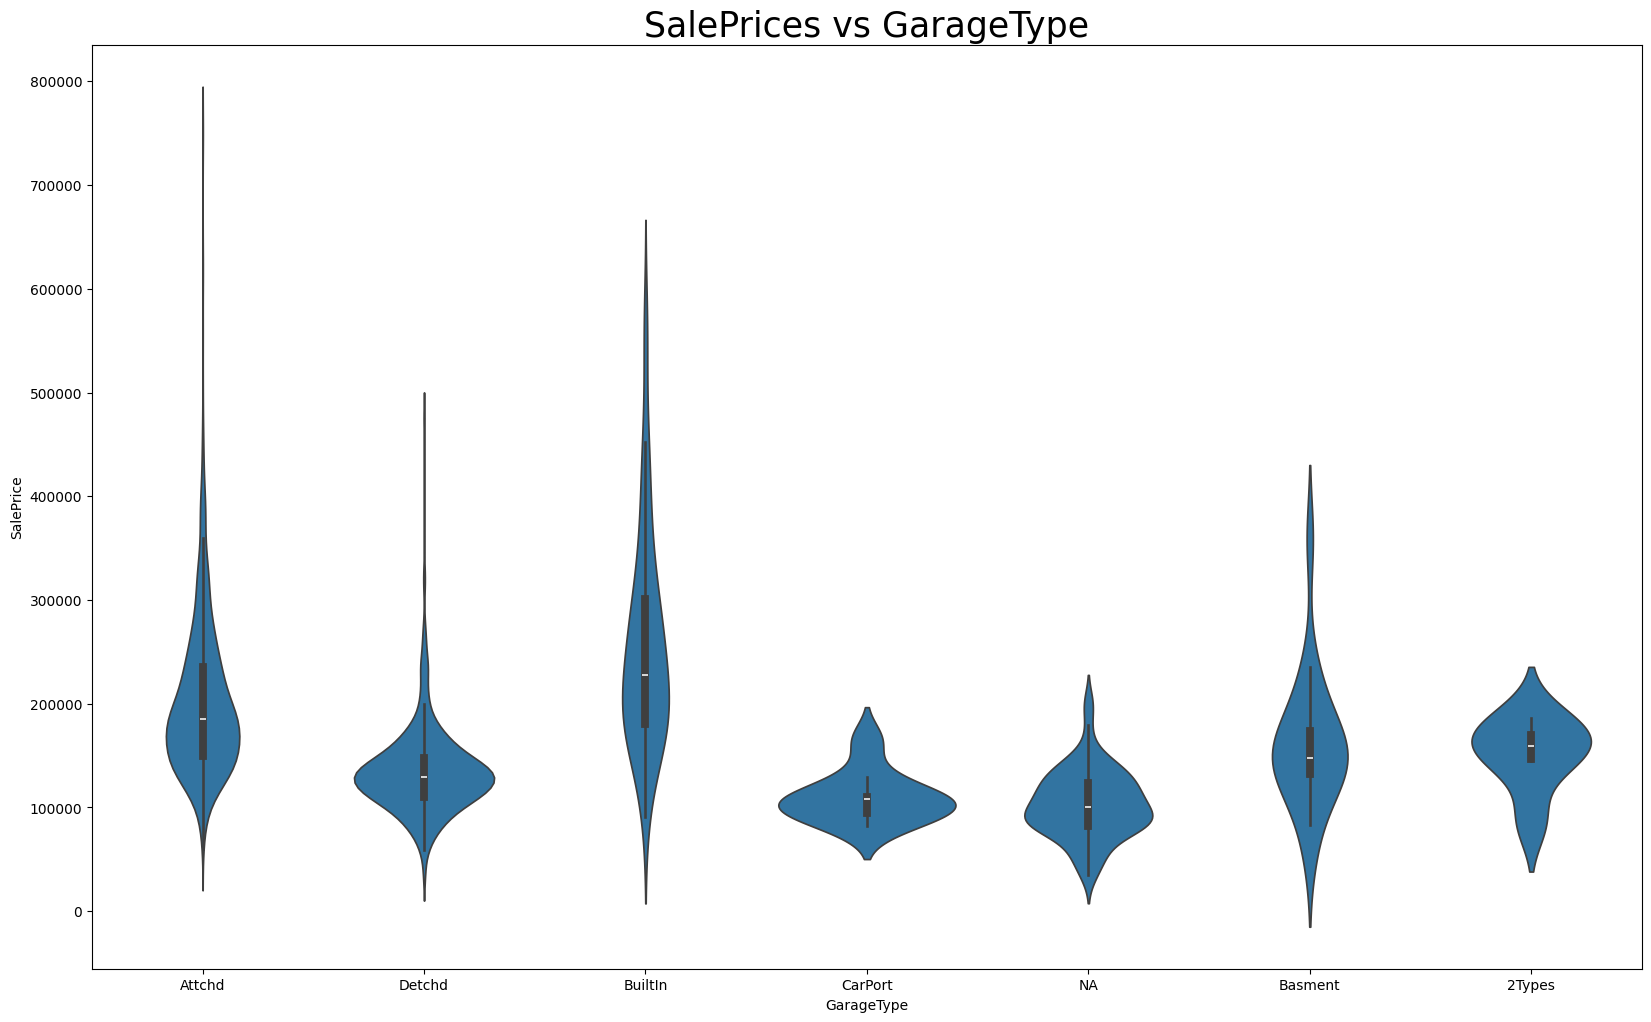

GarageType
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
NA         0.055479
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: count, dtype: float64


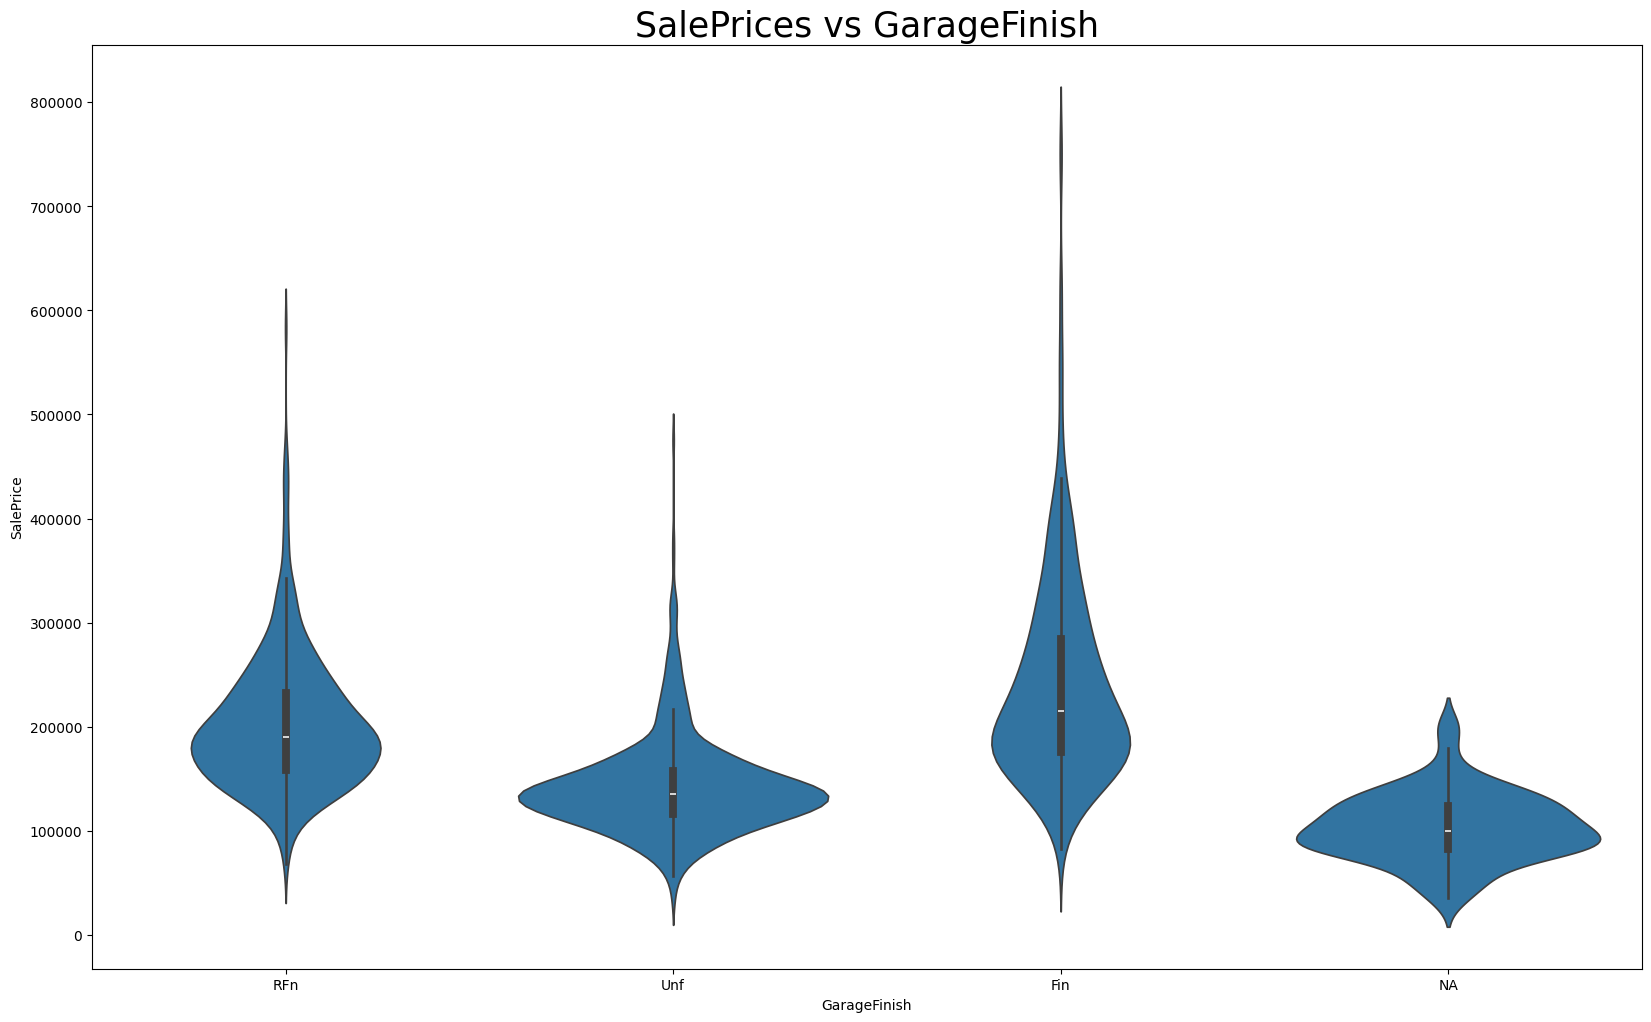

GarageFinish
Unf    0.414384
RFn    0.289041
Fin    0.241096
NA     0.055479
Name: count, dtype: float64


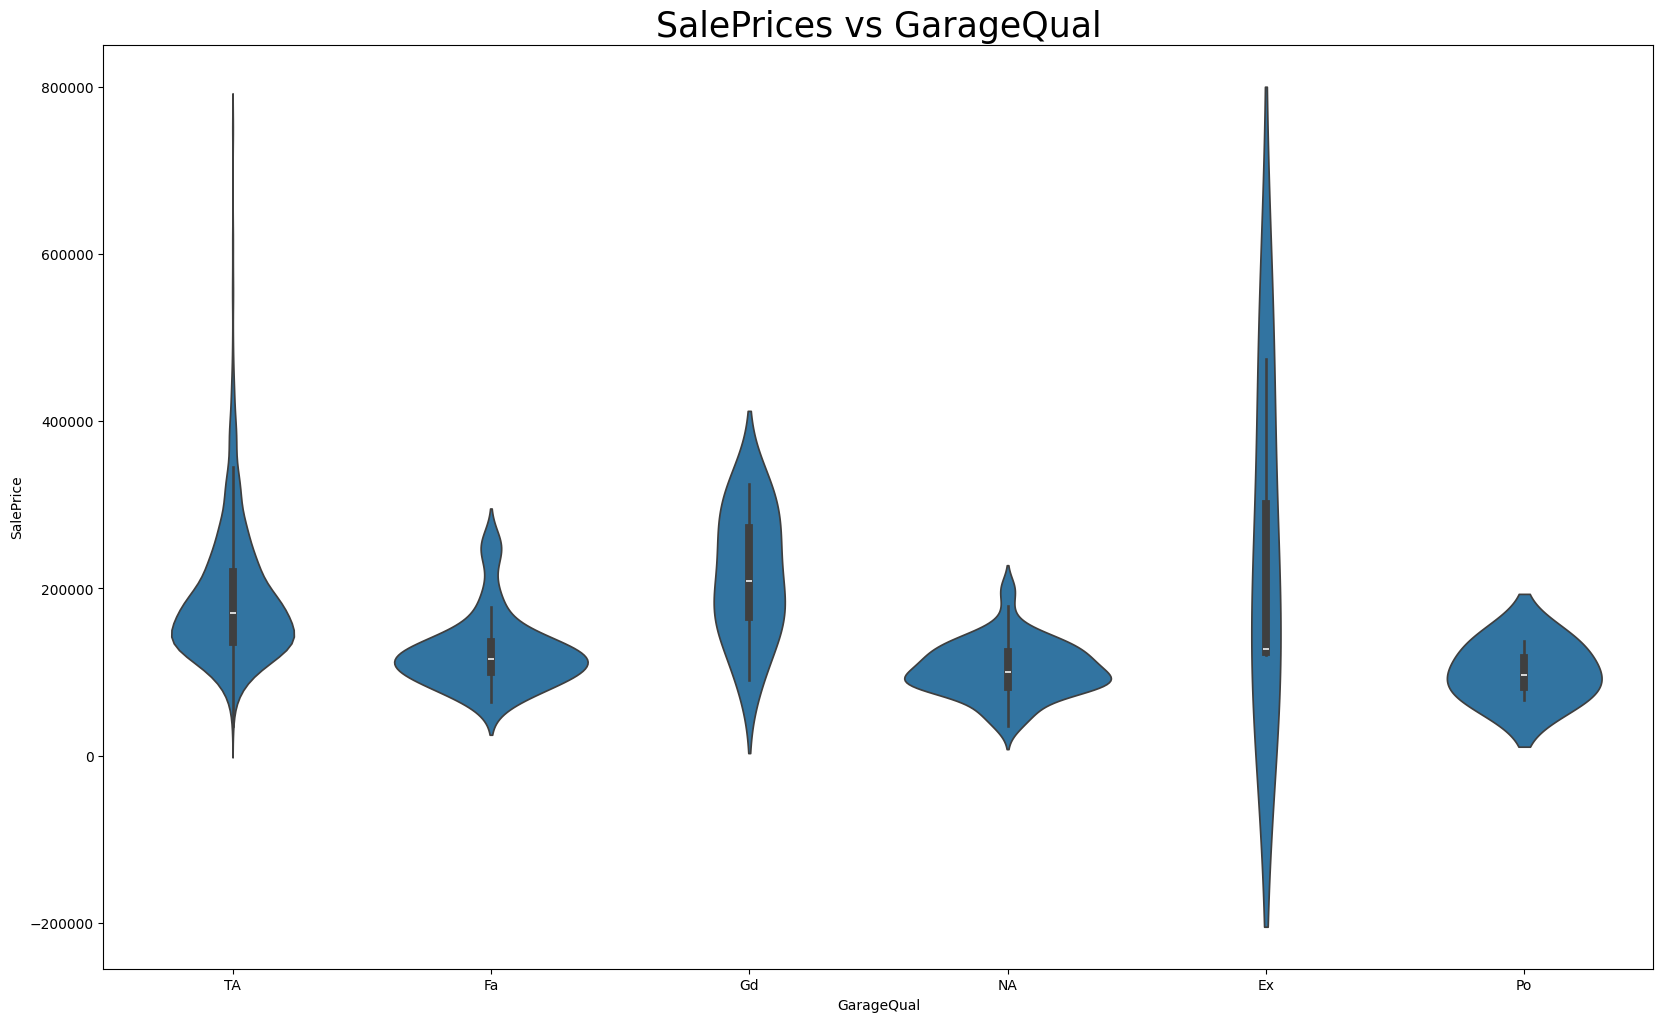

GarageQual
TA    0.897945
NA    0.055479
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: count, dtype: float64


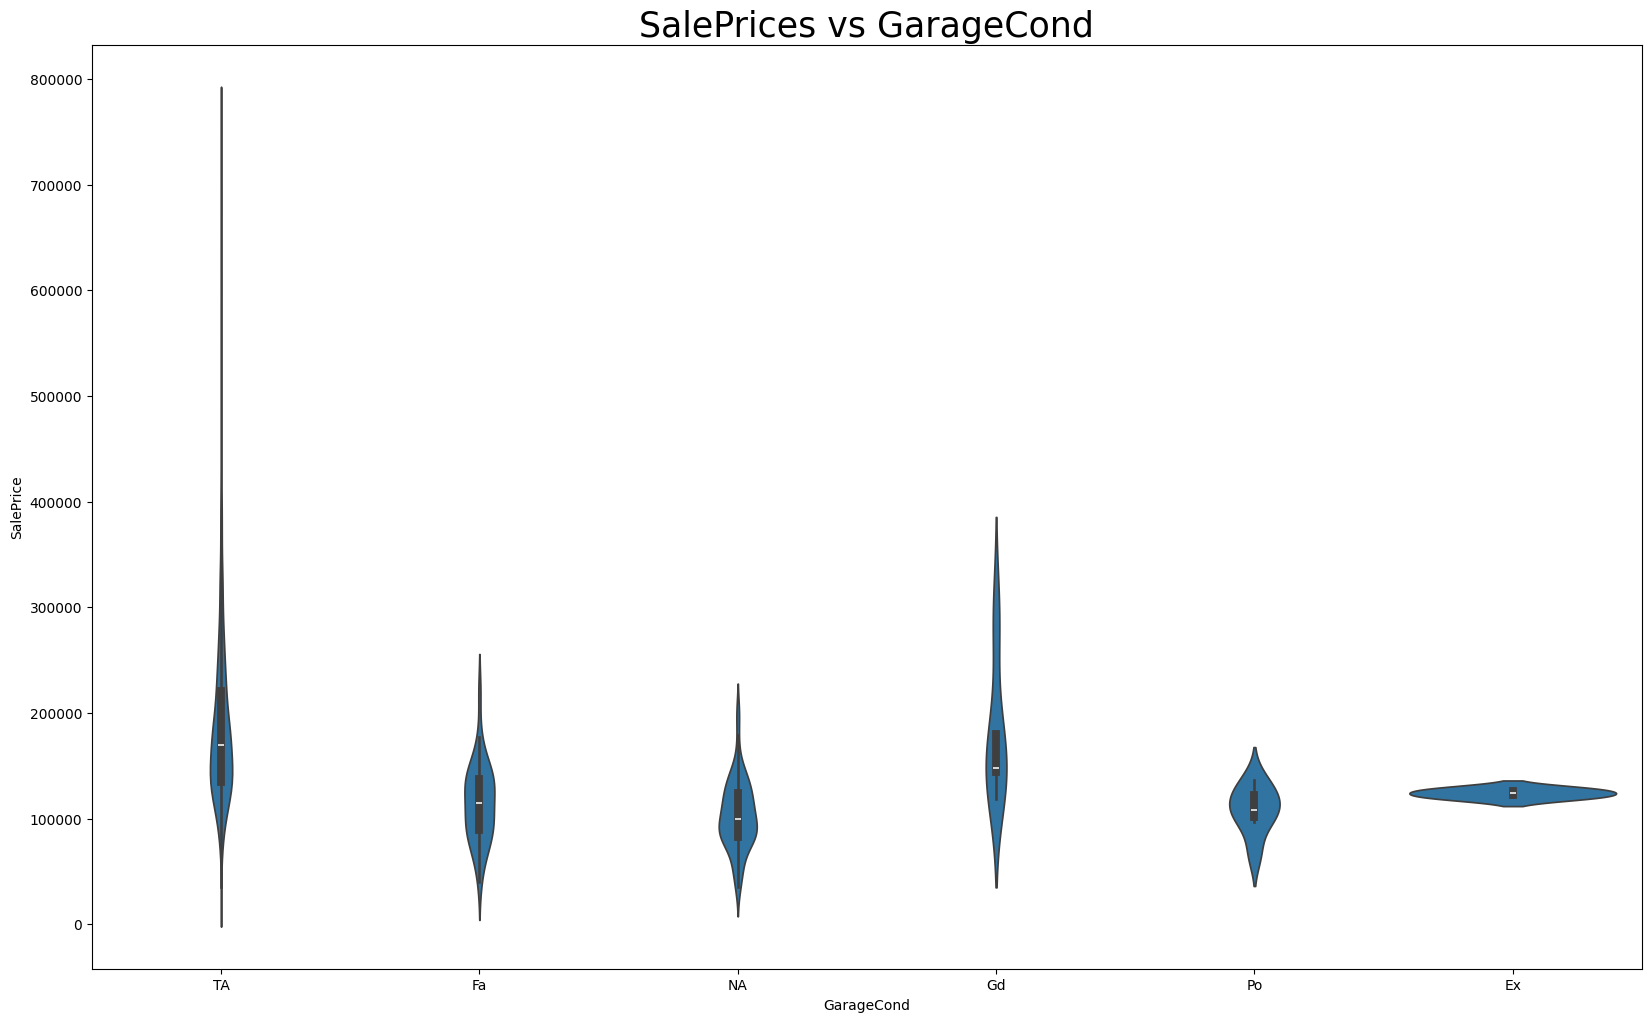

GarageCond
TA    0.908219
NA    0.055479
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: count, dtype: float64


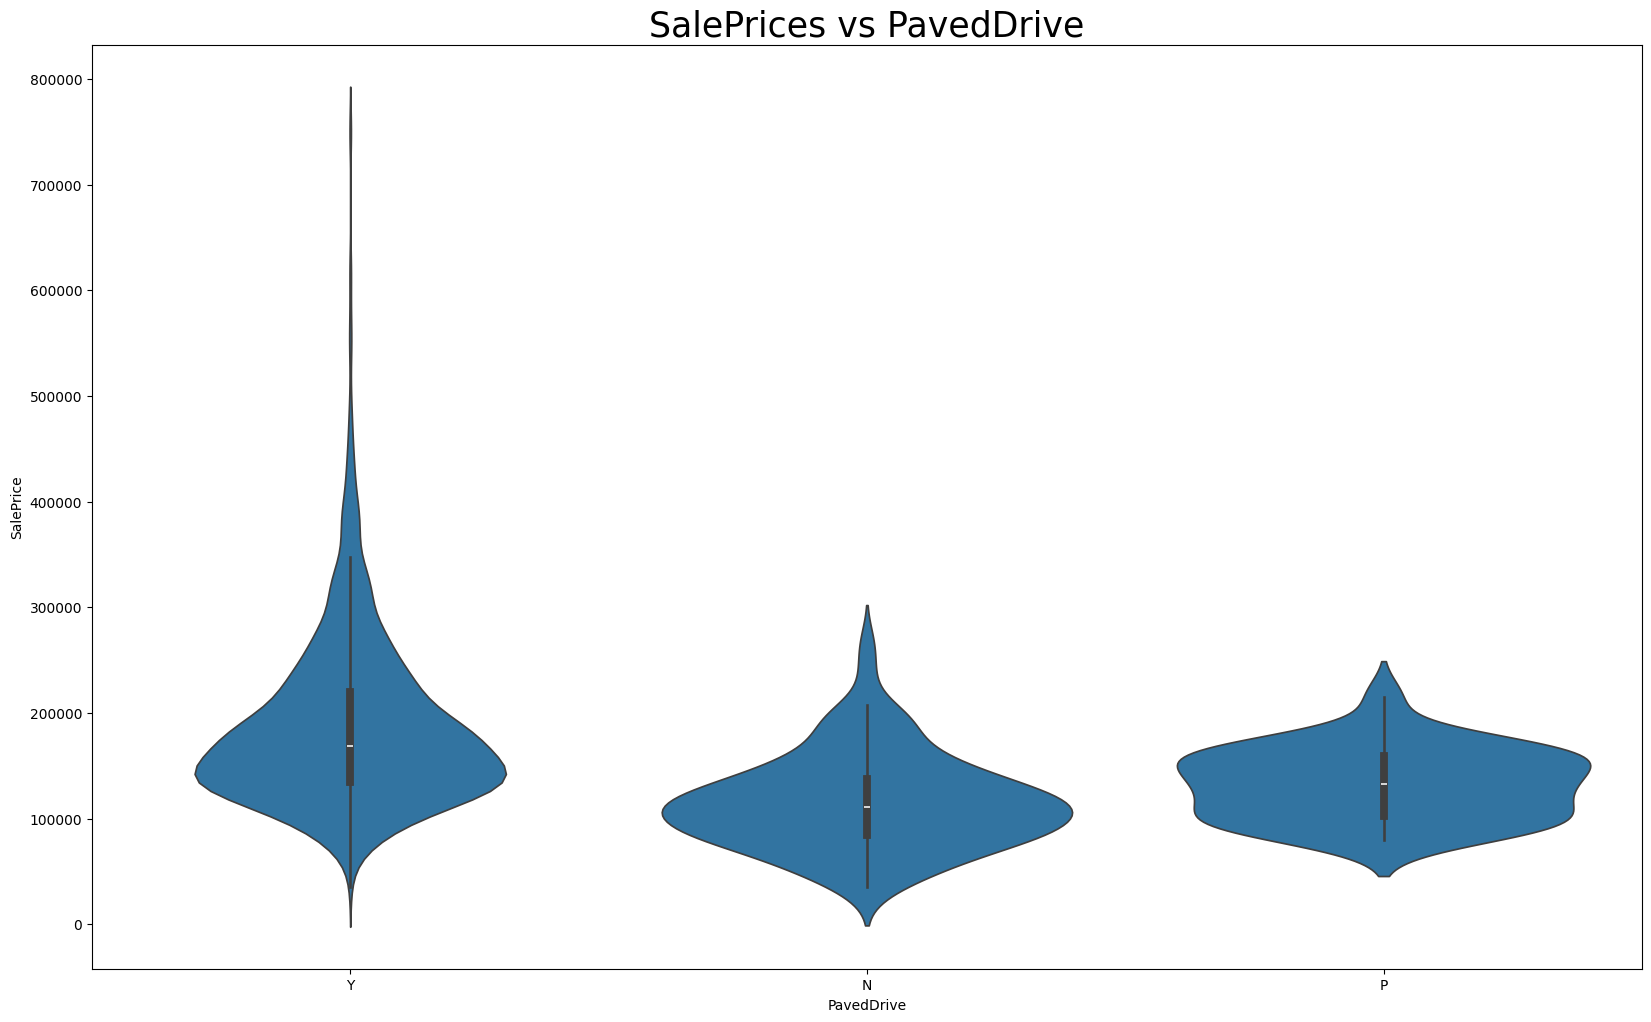

PavedDrive
Y    0.917808
N    0.061644
P    0.020548
Name: count, dtype: float64


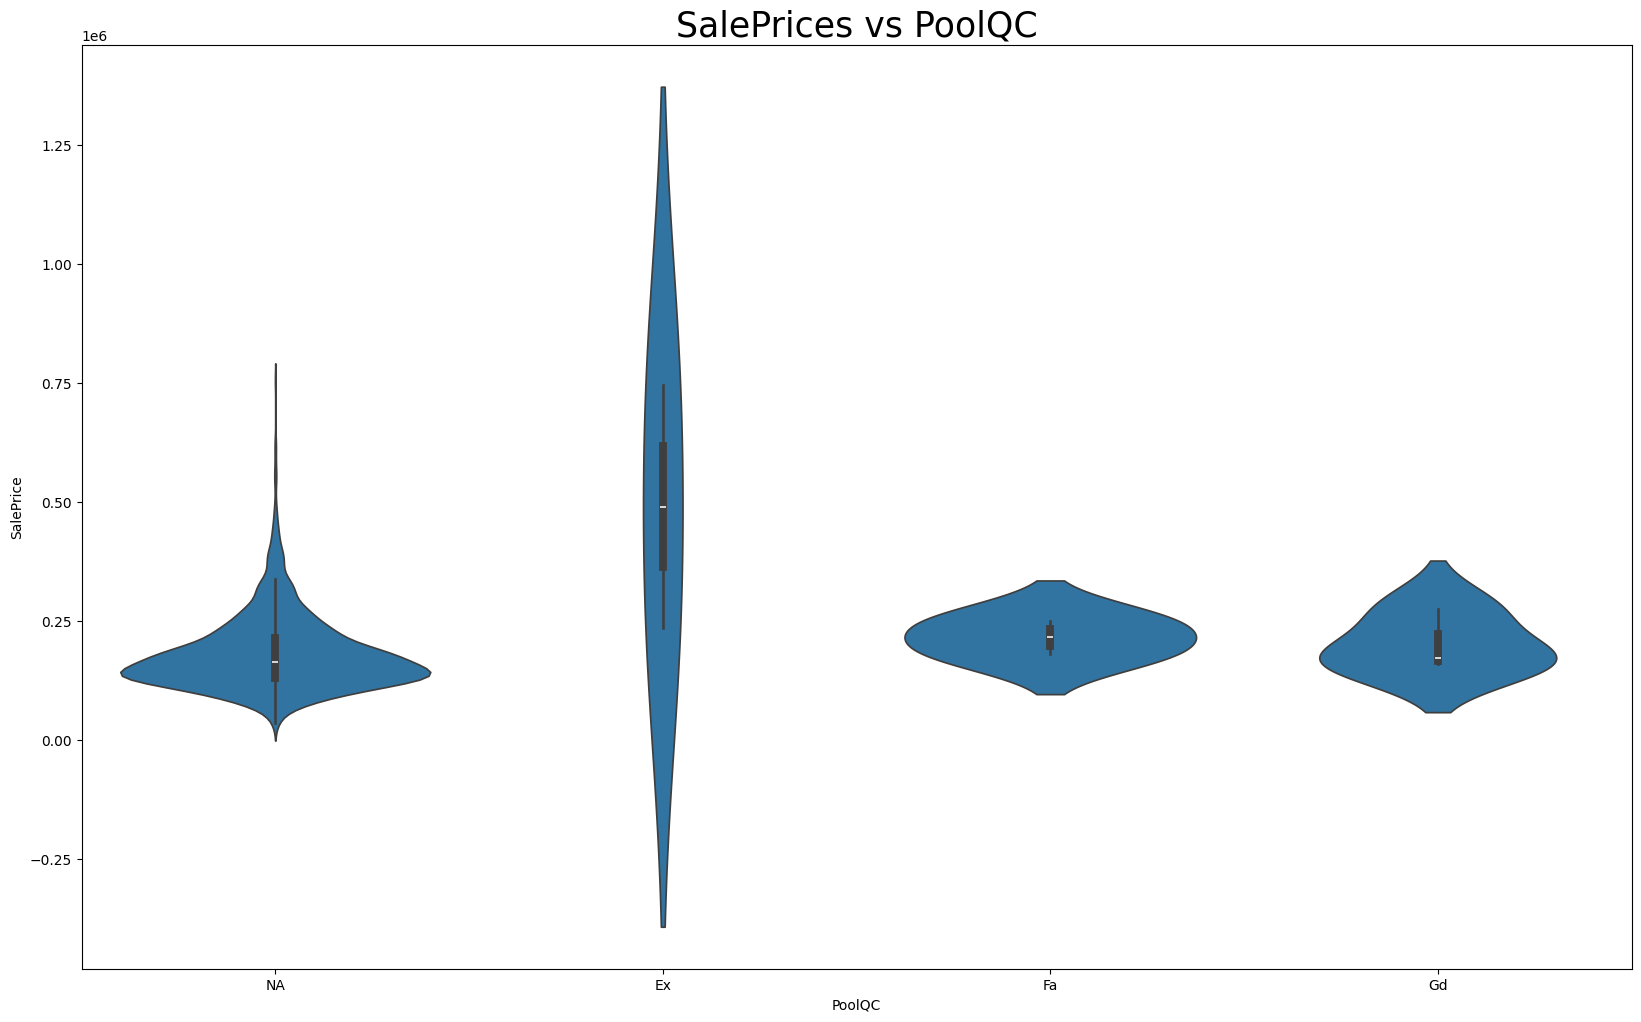

PoolQC
NA    0.995205
Gd    0.002055
Ex    0.001370
Fa    0.001370
Name: count, dtype: float64


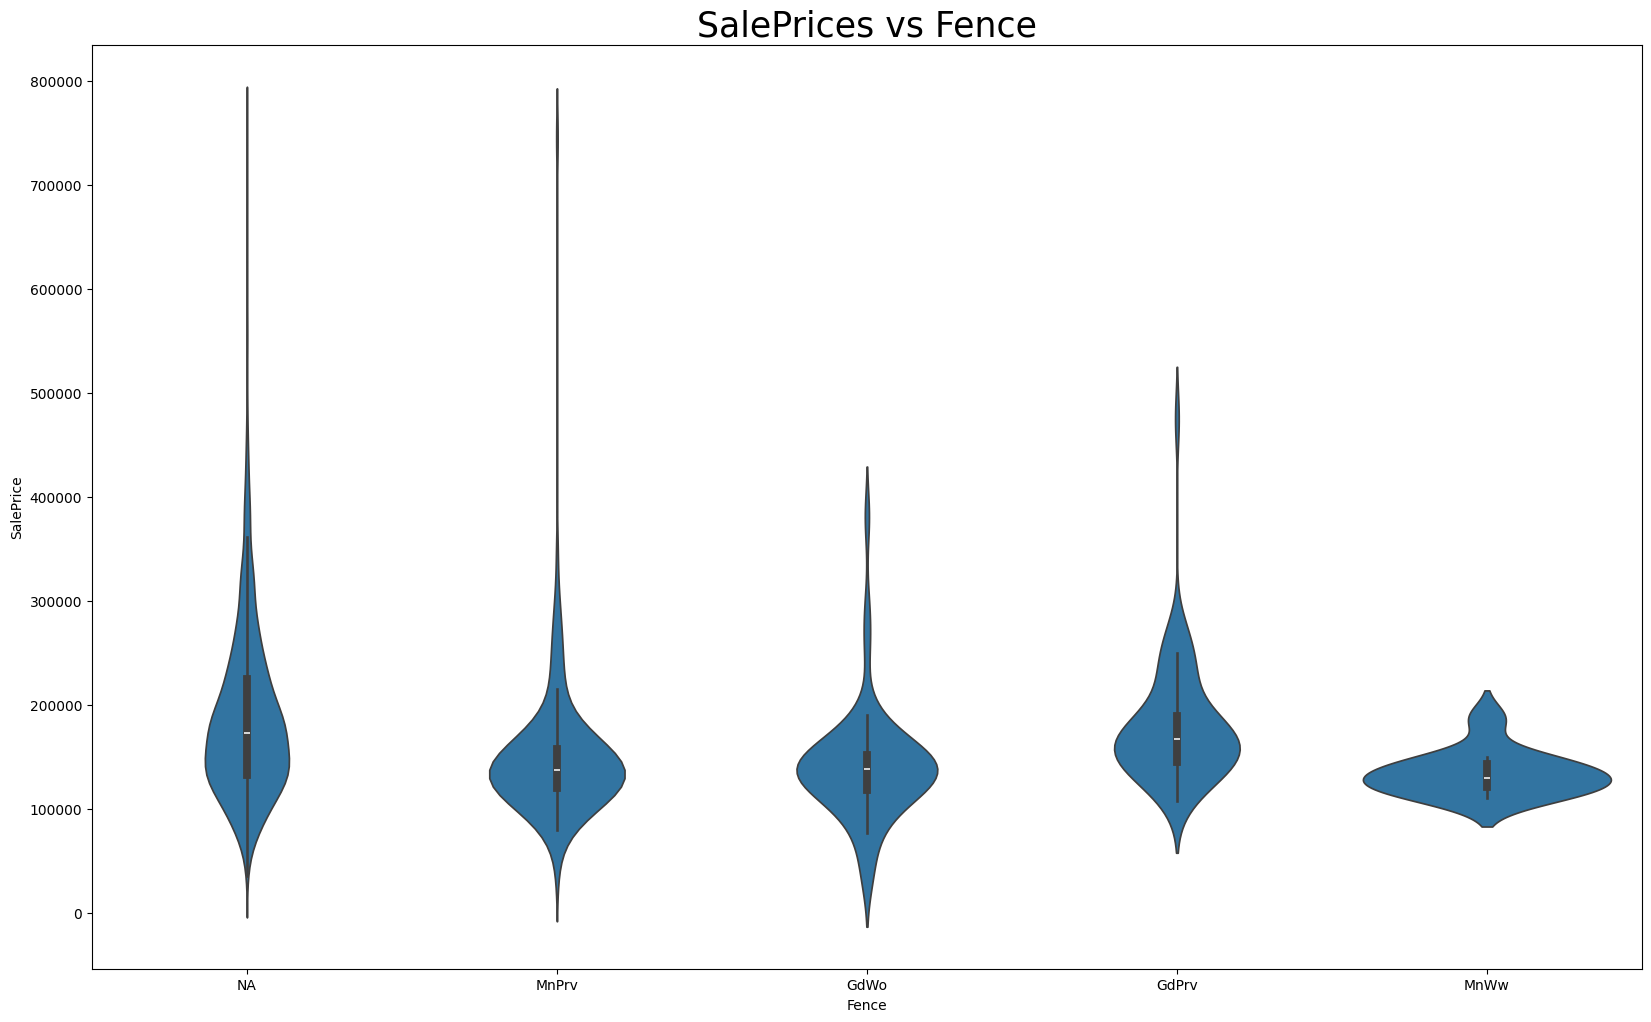

Fence
NA       0.807534
MnPrv    0.107534
GdPrv    0.040411
GdWo     0.036986
MnWw     0.007534
Name: count, dtype: float64


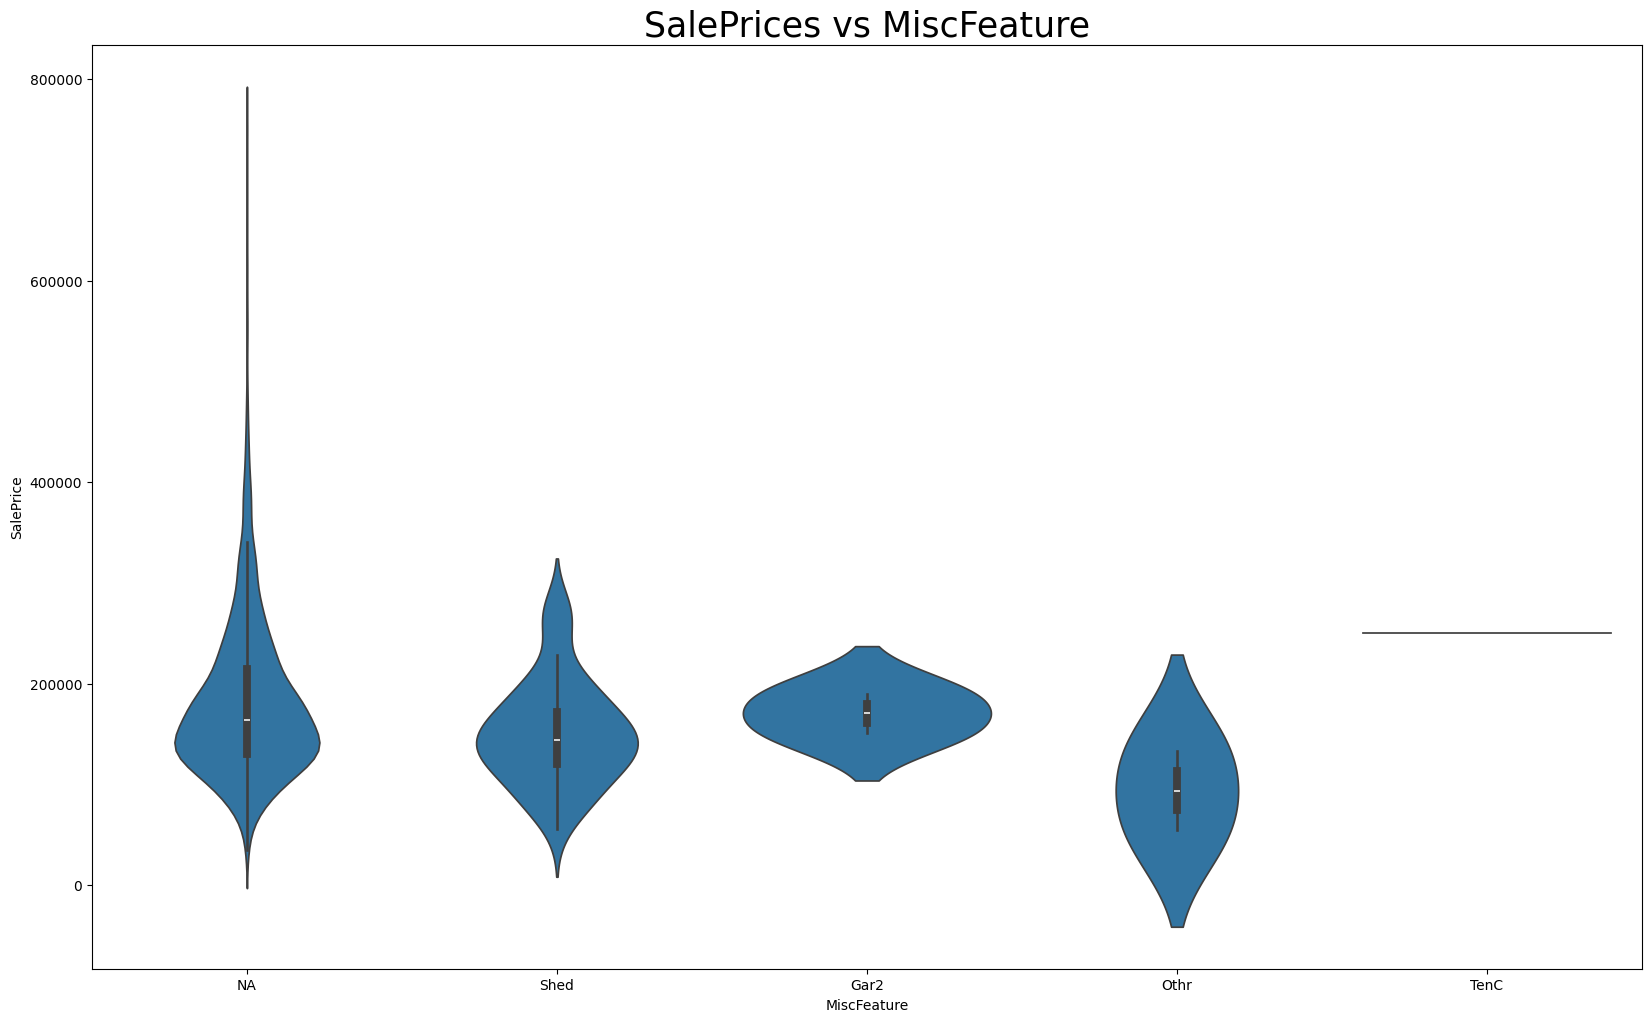

MiscFeature
NA      0.963014
Shed    0.033562
Gar2    0.001370
Othr    0.001370
TenC    0.000685
Name: count, dtype: float64


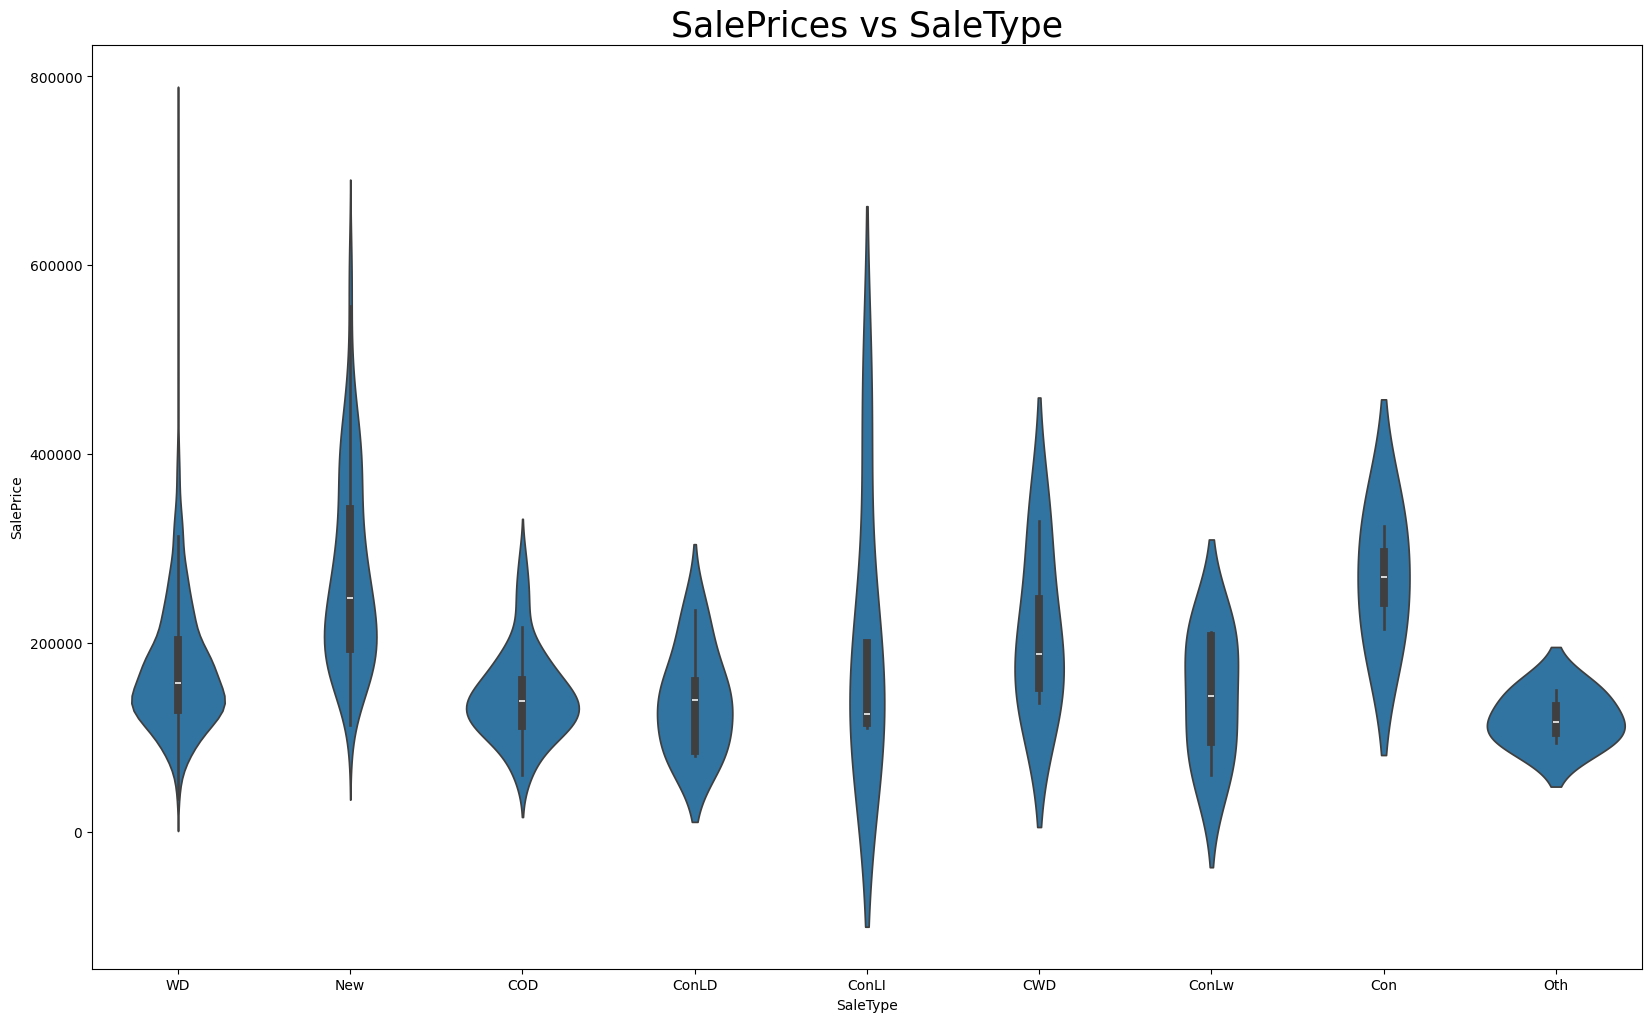

SaleType
WD       0.867808
New      0.083562
COD      0.029452
ConLD    0.006164
ConLI    0.003425
ConLw    0.003425
CWD      0.002740
Oth      0.002055
Con      0.001370
Name: count, dtype: float64


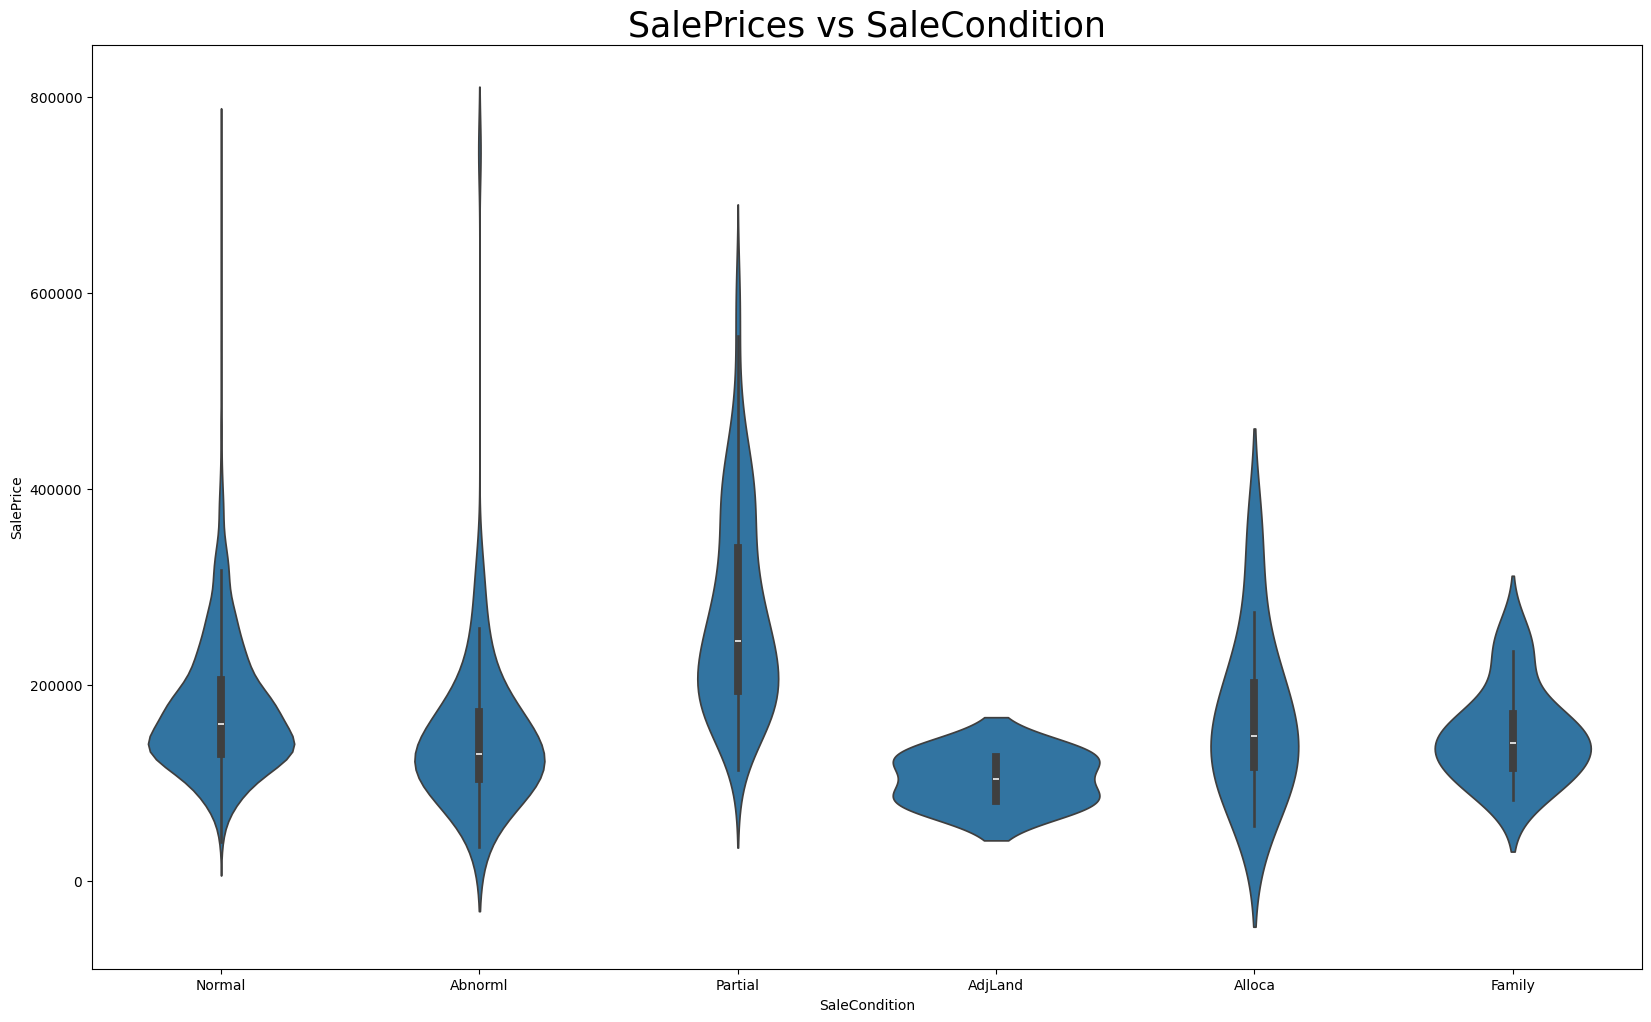

SaleCondition
Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: count, dtype: float64


In [8]:
# # ['PoolQC','MiscFeature','Alley','Fence','MasVnrType']
for col in cat:
    df_train[col].fillna('NA',inplace=True)
    df_test[col].fillna('NA',inplace=True)
    plt.figure(figsize=(20,12))
    sns.violinplot(data=df_train,x=col,y='SalePrice')
    plt.title("SalePrices vs {col}".format(col=col),fontsize=25)
    plt.show()
    print(df_train[col].value_counts()/len(df_train))

In [9]:
df_train.drop(columns=["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature","Utilities","Street","Heating","PavedDrive"],axis=1,inplace=True)
df_test.drop(columns=["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature","Utilities","Street","Heating","PavedDrive"],axis=1,inplace=True)
df_train.BsmtQual=df_train.BsmtQual.replace('NA','Fa')

df_train.Electrical=df_train.Electrical.replace('NA','SBrkr')
df_test.Electrical=df_test.Electrical.replace('NA','SBrkr')

df_train.GarageFinish=df_train.GarageFinish.replace('NA','Unf')
df_test.GarageFinish=df_test.GarageFinish.replace('NA','Unf')

df_train.GarageQual=df_train.GarageQual.replace('NA','Po')
df_test.GarageQual=df_test.GarageQual.replace('NA','Po')

df_train.GarageCond=df_train.GarageCond.replace('NA','Po')
df_test.GarageCond=df_test.GarageCond.replace('NA','Po')


df_train.RoofMatl=df_train.RoofMatl.replace(['Metal','Membran','Roll','ClyTile'],'Other')
df_test.RoofMatl=df_test.RoofMatl.replace(['Metal','Membran','Roll','ClyTile'],'Other')
#condition 1
df_train.Condition1=df_train.Condition1.replace(['PosA','RRNn','RRNe'],'Other')
df_test.Condition1=df_train.Condition1.replace(['PosA','RRNn','RRNe'],'Other')
#condition 2
df_train.Condition2=df_train.Condition1.replace(['PosA','RRAn','RRAe'],'Other')
df_test.Condition2=df_train.Condition1.replace(['PosA','RRAn','RRAe'],'Other')
#exterior
df_train['Exterior']=df_train.Exterior1st+df_train.Exterior2nd
df_test['Exterior']=df_test.Exterior1st+df_test.Exterior2nd

df_train.drop(columns=['Exterior1st','Exterior2nd'],inplace=True)
df_test.drop(columns=['Exterior1st','Exterior2nd'],inplace=True)


Numerical

In [10]:
plt.rcParams['figure.figsize'] = [8.0, 6.0]

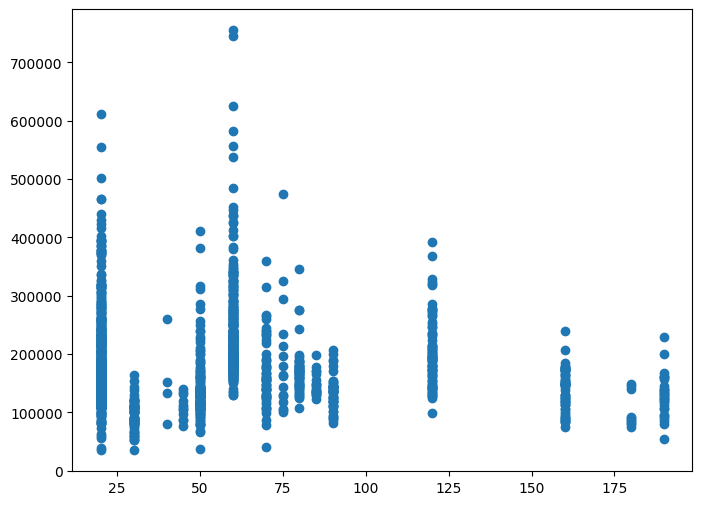

In [11]:
plt.scatter(x='MSSubClass',y='SalePrice',data=df_train)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
934    935          20       RL        313.0    27650      IR2         HLS   
1298  1299          60       RL        313.0    63887      IR3         Bnk   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
934     Inside       Mod        NAmes  ...         0           0        0   
1298    Corner       Gtl      Edwards  ...         0           0      480   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
934        0      11    2008        WD         Normal    242000   
1298       0       1    2008       New        Partial    160000   

            Exterior  
934   Wd SdngWd Sdng  
1298    StuccoStucco  

[2 rows x 70 columns]

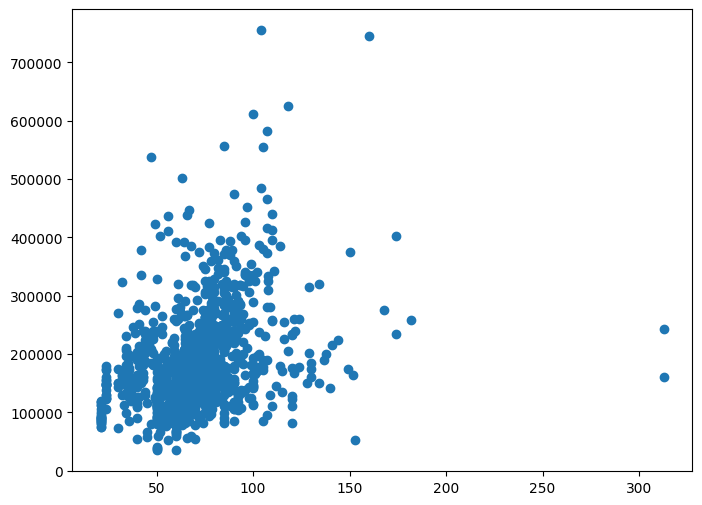

In [12]:
plt.scatter(x='LotFrontage',y='SalePrice',data=df_train)
df_train.query('LotFrontage >300')
# 934,1298


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
956    957         160       RM         24.0     1300      Reg         Lvl   
1039  1040         180       RM         21.0     1477      Reg         Lvl   
614    615         180       RM         21.0     1491      Reg         Lvl   
489    490         180       RM         21.0     1526      Reg         Lvl   
1449  1450         180       RM         21.0     1533      Reg         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
451    452          20       RL         62.0    70761      IR1         Low   
706    707          20       RL          NaN   115149      IR2         Low   
249    250          50       RL          NaN   159000      IR2         Low   
335    336         190       RL          NaN   164660      IR1         HLS   
313    314          20       RL        150.0   215245      IR3         Low   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
956     Inside       Gtl      Blueste  ...         0           0        0   
1039    Inside       Gtl      MeadowV  ...         0           0        0   
614     Inside       Gtl      MeadowV  ...         0           0        0   
489     Inside       Gtl      MeadowV  ...         0           0        0   
1449    Inside       Gtl      MeadowV  ...         0           0        0   
...        ...       ...          ...  ...       ...         ...      ...   
451     Inside       Mod      ClearCr  ...         0           0        0   
706    CulDSac       Sev      ClearCr  ...         0           0        0   
249    CulDSac       Sev      ClearCr  ...         0           0        0   
335     Corner       Sev       Timber  ...         0           0        0   
313     Inside       Sev       Timber  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
956        0       5    2009        WD         Normal    124000   
1039       0       4    2009        WD         Normal     80000   
614        0       5    2010        WD         Normal     75500   
489        0       5    2009        WD         Normal     86000   
1449       0       8    2006        WD        Abnorml     92000   
...      ...     ...     ...       ...            ...       ...   
451        0      12    2006        WD         Normal    280000   
706        0       6    2007        WD         Normal    302000   
249      500       6    2007        WD         Normal    277000   
335      700       8    2008        WD         Normal    228950   
313        0       6    2009        WD         Normal    375000   

            Exterior  
956   MetalSdMetalSd  
1039  CemntBdCmentBd  
614   CemntBdCmentBd  
489   CemntBdCmentBd  
1449  CemntBdCmentBd  
...              ...  
451   PlywoodPlywood  
706   PlywoodPlywood  
249   Wd SdngHdBoard  
335   PlywoodPlywood  
313   BrkFaceBrkFace  

[1460 rows x 70 columns]

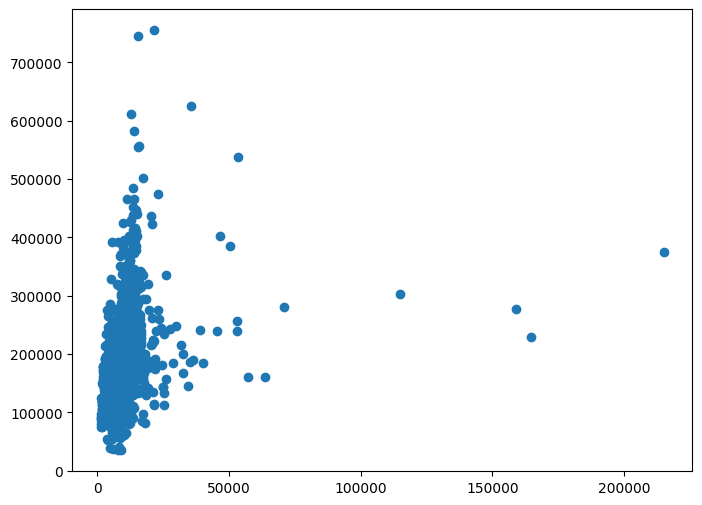

In [13]:
plt.scatter(x='LotArea',y='SalePrice',data=df_train)
df_train.query('LotArea >300').sort_values('LotArea')
# since 452


Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1298  1299          60       RL        313.0    63887      IR3         Bnk   
523    524          60       RL        130.0    40094      IR1         Bnk   
1442  1443          60       FV         85.0    11003      Reg         Lvl   
583    584          75       RM         75.0    13500      Reg         Lvl   
994    995          20       RL         96.0    12456      Reg         Lvl   
825    826          20       RL        114.0    14803      Reg         Lvl   
224    225          20       RL        103.0    13472      Reg         Lvl   
515    516          20       RL         94.0    12220      Reg         Lvl   
389    390          60       RL         96.0    12474      Reg         Lvl   
58      59          60       RL         66.0    13682      IR2         HLS   
591    592          60       RL         97.0    13478      IR1         Lvl   
1243  1244          20       RL        107.0    13891      Reg         Lvl   
1373  1374          20       RL          NaN    11400      Reg         Lvl   
185    186          75       RM         90.0    22950      IR2         Lvl   
440    441          20       RL        105.0    15431      Reg         Lvl   
1169  1170          60       RL        118.0    35760      IR1         Lvl   
1182  1183          60       RL        160.0    15623      IR1         Lvl   
691    692          60       RL        104.0    21535      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
1298    Corner       Gtl      Edwards  ...         0           0      480   
523     Inside       Gtl      Edwards  ...         0           0        0   
1442    Inside       Gtl      Somerst  ...         0           0        0   
583     Inside       Gtl      OldTown  ...         0           0        0   
994        FR2       Gtl      NridgHt  ...         0           0        0   
825     Inside       Gtl      NridgHt  ...         0           0        0   
224     Inside       Gtl      NridgHt  ...         0           0        0   
515     Inside       Gtl      NridgHt  ...         0           0        0   
389     Inside       Gtl      NridgHt  ...         0           0        0   
58     CulDSac       Gtl      StoneBr  ...         0           0        0   
591     Corner       Gtl      NridgHt  ...         0           0        0   
1243    Inside       Gtl      NridgHt  ...         0           0        0   
1373    Inside       Gtl      NoRidge  ...         0           0        0   
185     Inside       Gtl      OldTown  ...         0         410        0   
440     Inside       Gtl      NridgHt  ...         0         170        0   
1169   CulDSac       Gtl      NoRidge  ...         0           0        0   
1182    Corner       Gtl      NoRidge  ...         0           0      555   
691     Corner       Gtl      NoRidge  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
1298       0       1    2008       New        Partial    160000   
523        0      10    2007       New        Partial    184750   
1442       0       4    2009        WD         Normal    310000   
583        0       7    2008        WD         Normal    325000   
994        0       7    2009        WD         Normal    337500   
825        0       6    2008       New        Partial    385000   
224        0       6    2009        WD         Normal    386250   
515        0       9    2009       New        Partial    402861   
389        0       8    2008       New        Partial    426000   
58         0      10    2006       New        Partial    438780   
591        0       6    2009     ConLI         Normal    451950   
1243       0       9    2006       New        Partial    465000   
1373       0       3    2007        WD         Normal    466500   
185        0       6    2006        WD         Normal    475000   
440        0       4    2009        WD         Normal   

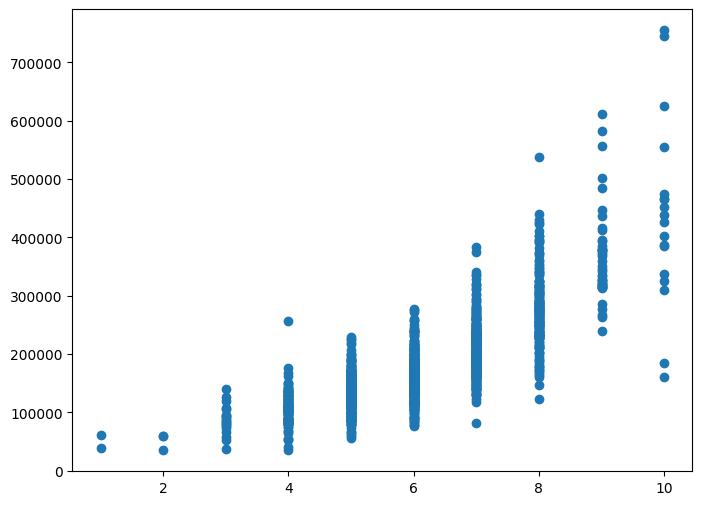

In [14]:
plt.scatter(x='OverallQual',y='SalePrice',data=df_train)
df_train.query('OverallQual==10').sort_values(by='SalePrice')
#523,1298,457,770

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
398  399          30       RM         60.0     8967      Reg         Lvl   
250  251          30       RL         55.0     5350      IR1         Lvl   
88    89          50  C (all)        105.0     8470      IR1         Lvl   
676  677          70       RM         60.0     9600      Reg         Lvl   
378  379          20       RL         88.0    11394      Reg         Lvl   

    LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
398    Corner       Gtl       IDOTRR  ...         0           0        0   
250    Inside       Gtl      BrkSide  ...         0           0        0   
88     Corner       Gtl       IDOTRR  ...         0           0        0   
676    Inside       Gtl      OldTown  ...         0           0        0   
378    Corner       Gtl      StoneBr  ...         0           0        0   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice        Exterior  
398       0      11    2007        WD        Abnorml     67000  MetalSdMetalSd  
250     450       5    2010        WD         Normal     76500  Wd SdngPlywood  
88        0      10    2009     ConLD        Abnorml     85000  PlywoodPlywood  
676       0       5    2006        WD         Normal     87000   AsbShngStucco  
378       0       6    2010       New        Partial    394432  VinylSdVinylSd  

[5 rows x 70 columns]

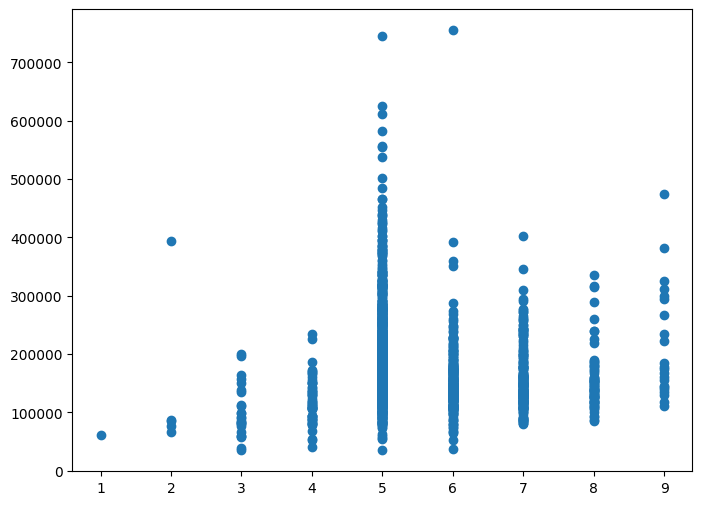

In [15]:
plt.scatter(x='OverallCond',y='SalePrice',data=df_train)
df_train.query('OverallCond==2').sort_values(by='SalePrice')
#379,1183,692

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1131  1132          20       RL         63.0    10712      Reg         Lvl   
1407  1408          20       RL          NaN     8780      IR1         Lvl   
582    583          90       RL         81.0    11841      Reg         Lvl   
1176  1177          20       RL         37.0     6951      IR1         Lvl   
89      90          20       RL         60.0     8070      Reg         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
1353  1354          50       RL         56.0    14720      IR1         Lvl   
496    497          20       RL          NaN    12692      IR1         Lvl   
1169  1170          60       RL        118.0    35760      IR1         Lvl   
1182  1183          60       RL        160.0    15623      IR1         Lvl   
691    692          60       RL        104.0    21535      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
1131    Inside       Gtl      Mitchel  ...         0           0        0   
1407    Corner       Gtl      Mitchel  ...         0           0        0   
582     Inside       Gtl      Edwards  ...         0           0        0   
1176   CulDSac       Gtl      Mitchel  ...         0           0        0   
89      Inside       Gtl      CollgCr  ...         0           0        0   
...        ...       ...          ...  ...       ...         ...      ...   
1353   CulDSac       Gtl      NoRidge  ...         0           0        0   
496     Inside       Gtl      NoRidge  ...         0           0        0   
1169   CulDSac       Gtl      NoRidge  ...         0           0        0   
1182    Corner       Gtl      NoRidge  ...         0           0      555   
691     Corner       Gtl      NoRidge  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
1131       0       9    2007       Oth        Abnorml     93500   
1407       0       3    2009        WD         Normal    112000   
582        0       5    2007        WD         Normal    118500   
1176       0      10    2008        WD         Normal    119500   
89         0       8    2007        WD         Normal    123600   
...      ...     ...     ...       ...            ...       ...   
1353       0       3    2010        WD         Normal    410000   
496        0       5    2007        WD         Normal    430000   
1169       0       7    2006        WD         Normal    625000   
1182       0       7    2007        WD        Abnorml    745000   
691        0       1    2007        WD         Normal    755000   

            Exterior  
1131  HdBoardHdBoard  
1407  HdBoardPlywood  
582   HdBoardHdBoard  
1176  HdBoardPlywood  
89    VinylSdVinylSd  
...              ...  
1353  VinylSdVinylSd  
496   BrkFaceBrkFace  
1169  HdBoardHdBoard  
1182  Wd SdngImStucc  
691   HdBoardHdBoard  

[214 rows x 70 columns]

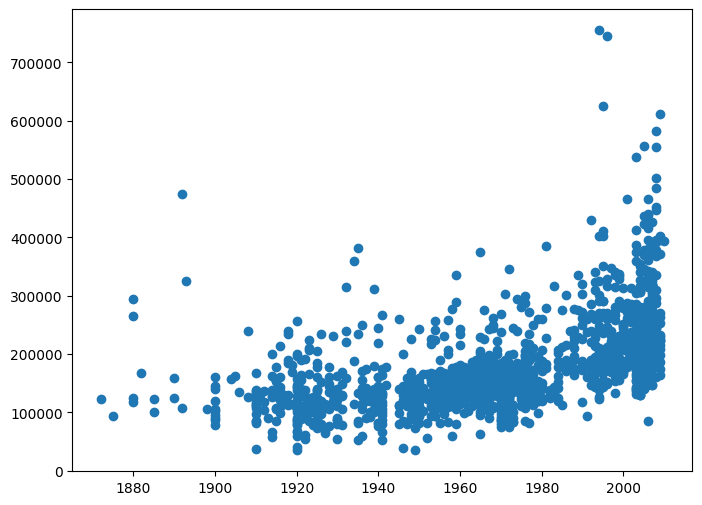

In [16]:

plt.scatter(x='YearBuilt',y='SalePrice',data=df_train)
df_train.query('YearBuilt<1900 & YearBuilt>1850').sort_values(by='SalePrice')
df_train.query('YearBuilt<2000 & YearBuilt>1980').sort_values(by='SalePrice')
#186,1183,692

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
495    496          30  C (all)         60.0     7879      Reg         Lvl   
916    917          20  C (all)         50.0     9000      Reg         Lvl   
968    969          50       RM         50.0     5925      Reg         Lvl   
533    534          20       RL         50.0     5000      Reg         Low   
30      31          70  C (all)         50.0     8500      Reg         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
496    497          20       RL          NaN    12692      IR1         Lvl   
185    186          75       RM         90.0    22950      IR2         Lvl   
1169  1170          60       RL        118.0    35760      IR1         Lvl   
1182  1183          60       RL        160.0    15623      IR1         Lvl   
691    692          60       RL        104.0    21535      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
495     Inside       Gtl       IDOTRR  ...         0           0        0   
916     Inside       Gtl       IDOTRR  ...         0           0        0   
968     Inside       Gtl      OldTown  ...         0           0        0   
533     Inside       Mod      BrkSide  ...         0           0        0   
30      Inside       Gtl       IDOTRR  ...         0           0        0   
...        ...       ...          ...  ...       ...         ...      ...   
496     Inside       Gtl      NoRidge  ...         0           0        0   
185     Inside       Gtl      OldTown  ...         0         410        0   
1169   CulDSac       Gtl      NoRidge  ...         0           0        0   
1182    Corner       Gtl      NoRidge  ...         0           0      555   
691     Corner       Gtl      NoRidge  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
495        0      11    2009        WD        Abnorml     34900   
916        0      10    2006        WD        Abnorml     35311   
968        0       5    2009        WD        Abnorml     37900   
533        0       1    2007        WD         Normal     39300   
30         0       7    2008        WD         Normal     40000   
...      ...     ...     ...       ...            ...       ...   
496        0       5    2007        WD         Normal    430000   
185        0       6    2006        WD         Normal    475000   
1169       0       7    2006        WD         Normal    625000   
1182       0       7    2007        WD        Abnorml    745000   
691        0       1    2007        WD         Normal    755000   

            Exterior  
495   Wd SdngWd Sdng  
916   AsbShngAsbShng  
968   VinylSdVinylSd  
533   VinylSdVinylSd  
30    BrkFaceBrkFace  
...              ...  
496   BrkFaceBrkFace  
185   Wd SdngWd Sdng  
1169  HdBoardHdBoard  
1182  Wd SdngImStucc  
691   HdBoardHdBoard  

[908 rows x 70 columns]

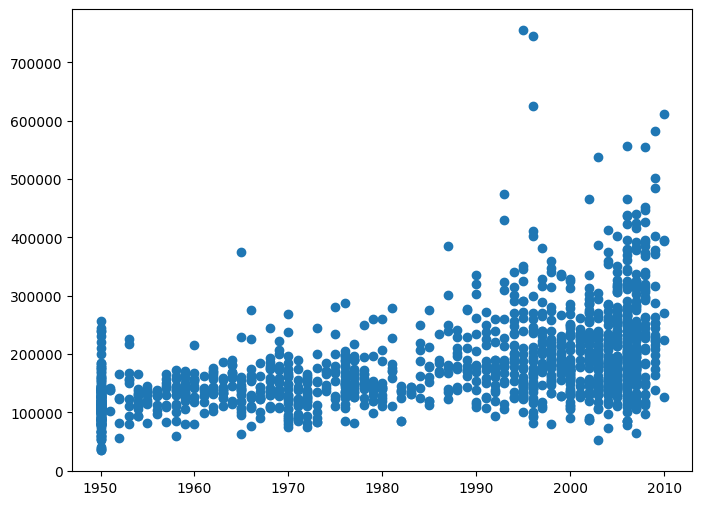

In [17]:
plt.scatter(x='YearRemodAdd',y='SalePrice',data=df_train)
# df_train.query('YearRemodAdd>1980 & YearRemodAdd<2000').sort_values(by='SalePrice')
df_train.query('YearRemodAdd<2000 & YearRemodAdd>1920').sort_values(by='SalePrice')
#1183,692

MasVnrArea
0.0    0.595205
Name: count, dtype: float64

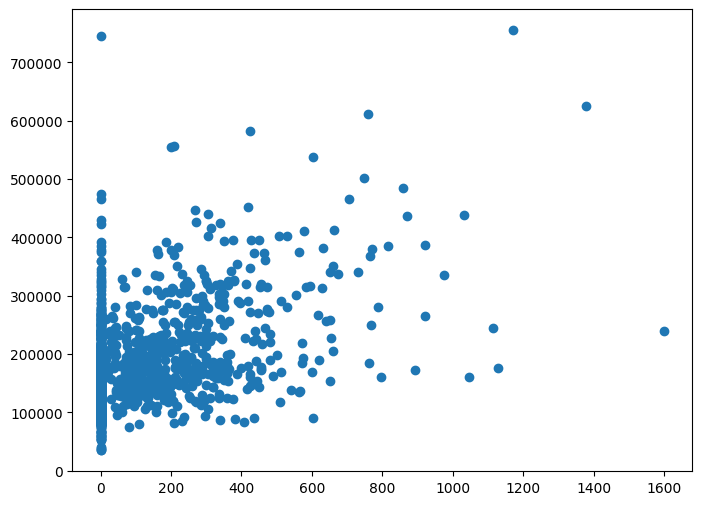

In [18]:
plt.scatter(x='MasVnrArea',y='SalePrice',data=df_train)
df_train.query('MasVnrArea==0').sort_values(by='SalePrice')
df_train[df_train.MasVnrArea==0]['MasVnrArea'].value_counts()/len(df_train)
#1183

BsmtFinSF1
0    0.319863
Name: count, dtype: float64

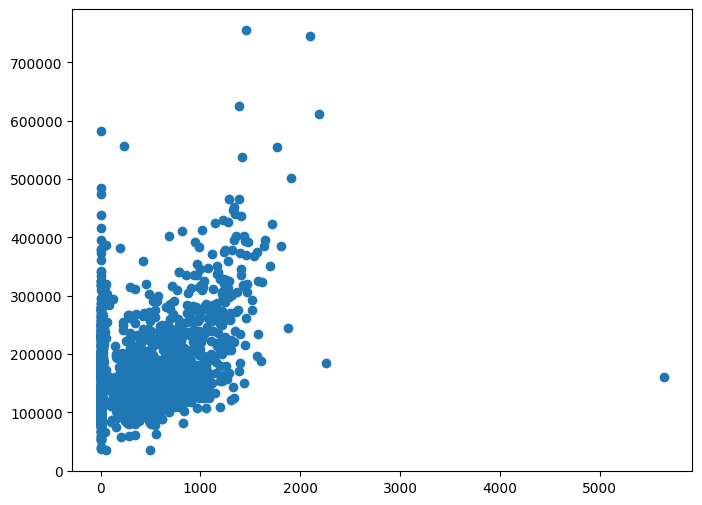

In [19]:
plt.scatter(x='BsmtFinSF1',y='SalePrice',data=df_train)
df_train.query('BsmtFinSF1>5000').sort_values(by='SalePrice')
df_train[df_train.BsmtFinSF1==0]['BsmtFinSF1'].value_counts()/len(df_train)
#1299

BsmtFinSF2
0    0.885616
Name: count, dtype: float64

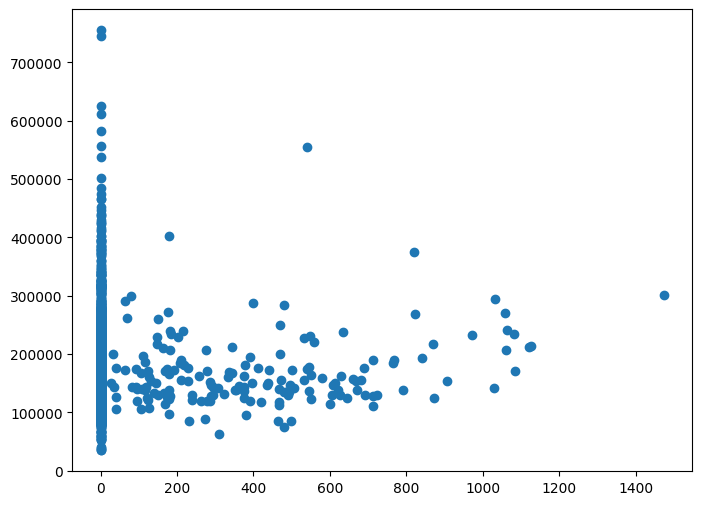

In [20]:

plt.scatter(x='BsmtFinSF2',y='SalePrice',data=df_train)
df_train.query('BsmtFinSF2==0').sort_values(by='SalePrice')
df_train[df_train.BsmtFinSF2==0]['BsmtFinSF2'].value_counts()/len(df_train)
#323,1183,692

BsmtUnfSF
0    0.080822
Name: count, dtype: float64

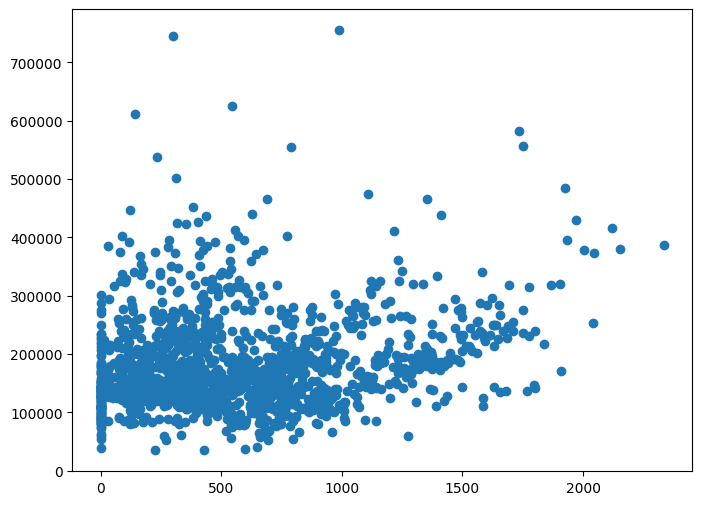

In [21]:

plt.scatter(x='BsmtUnfSF',y='SalePrice',data=df_train)
df_train[df_train.BsmtUnfSF==0]['BsmtUnfSF'].value_counts()/len(df_train)

TotalBsmtSF
0    0.025342
Name: count, dtype: float64

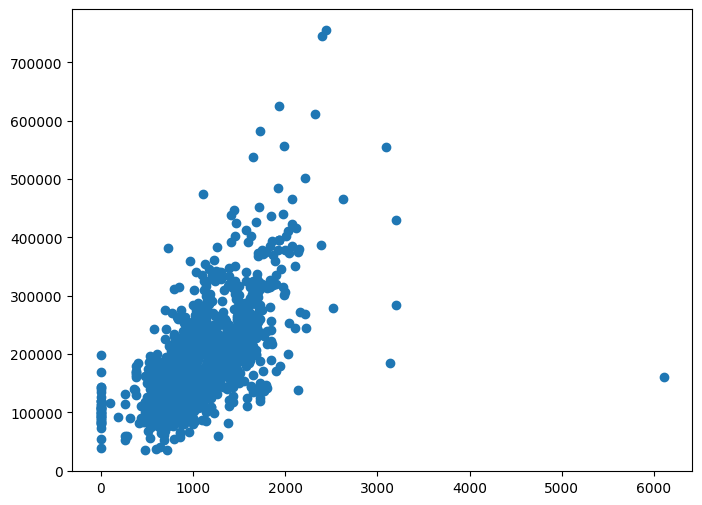

In [22]:
plt.scatter(x='TotalBsmtSF',y='SalePrice',data=df_train)
df_train[df_train.TotalBsmtSF==0]['TotalBsmtSF'].value_counts()/len(df_train)
#1299

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1298  1299          60       RL        313.0    63887      IR3         Bnk   
496    497          20       RL          NaN    12692      IR1         Lvl   
523    524          60       RL        130.0    40094      IR1         Bnk   
1024  1025          20       RL          NaN    15498      IR1         Lvl   
1373  1374          20       RL          NaN    11400      Reg         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
430    431         160       RM         21.0     1680      Reg         Lvl   
916    917          20  C (all)         50.0     9000      Reg         Lvl   
1100  1101          30       RL         60.0     8400      Reg         Bnk   
705    706         190       RM         70.0     5600      Reg         Lvl   
533    534          20       RL         50.0     5000      Reg         Low   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
1298    Corner       Gtl      Edwards  ...         0           0      480   
496     Inside       Gtl      NoRidge  ...         0           0        0   
523     Inside       Gtl      Edwards  ...         0           0        0   
1024    Corner       Gtl       Timber  ...         0           0        0   
1373    Inside       Gtl      NoRidge  ...         0           0        0   
...        ...       ...          ...  ...       ...         ...      ...   
430     Inside       Gtl       BrDale  ...         0           0        0   
916     Inside       Gtl       IDOTRR  ...         0           0        0   
1100    Inside       Gtl        SWISU  ...         0           0        0   
705     Inside       Gtl       IDOTRR  ...         0           0        0   
533     Inside       Mod      BrkSide  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
1298       0       1    2008       New        Partial    160000   
496        0       5    2007        WD         Normal    430000   
523        0      10    2007       New        Partial    184750   
1024       0       5    2008       COD        Abnorml    287000   
1373       0       3    2007        WD         Normal    466500   
...      ...     ...     ...       ...            ...       ...   
430        0       7    2008       COD        Abnorml     85400   
916        0      10    2006        WD        Abnorml     35311   
1100       0       1    2009        WD         Normal     60000   
705     3500       7    2010        WD         Normal     55000   
533        0       1    2007        WD         Normal     39300   

            Exterior  
1298    StuccoStucco  
496   BrkFaceBrkFace  
523   CemntBdCmentBd  
1024    StoneHdBoard  
1373  VinylSdVinylSd  
...              ...  
430   HdBoardHdBoard  
916   AsbShngAsbShng  
1100  Wd SdngWd Sdng  
705   VinylSdWd Shng  
533   VinylSdVinylSd  

[1460 rows x 70 columns]

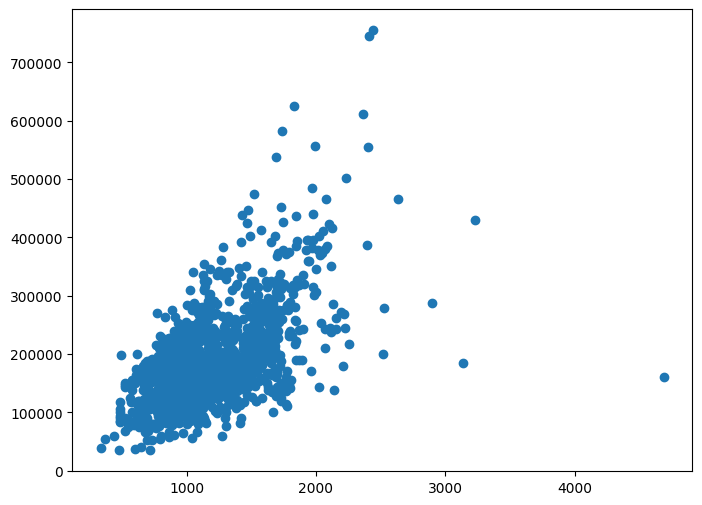

In [23]:
plt.scatter(x='1stFlrSF',y='SalePrice',data=df_train)
df_train.sort_values(by='1stFlrSF',ascending=False)
#1299

LowQualFinSF
0    0.982192
Name: count, dtype: float64

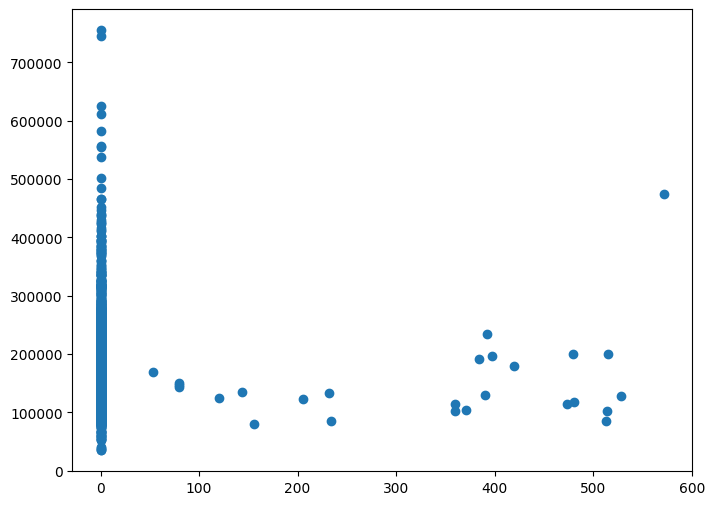

In [24]:
plt.scatter(x='LowQualFinSF',y='SalePrice',data=df_train)
df_train.query('LowQualFinSF==0').sort_values(by='SalePrice')
df_train[df_train.LowQualFinSF==0]['LowQualFinSF'].value_counts()/len(df_train)

In [25]:
df_train.drop(columns=['LowQualFinSF'],inplace=True)
df_test.drop(columns=['LowQualFinSF'],inplace=True)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1298  1299          60       RL        313.0    63887      IR3         Bnk   
523    524          60       RL        130.0    40094      IR1         Bnk   
1182  1183          60       RL        160.0    15623      IR1         Lvl   
691    692          60       RL        104.0    21535      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
1298    Corner       Gtl      Edwards  ...         0           0      480   
523     Inside       Gtl      Edwards  ...         0           0        0   
1182    Corner       Gtl      NoRidge  ...         0           0      555   
691     Corner       Gtl      NoRidge  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
1298       0       1    2008       New        Partial    160000   
523        0      10    2007       New        Partial    184750   
1182       0       7    2007        WD        Abnorml    745000   
691        0       1    2007        WD         Normal    755000   

            Exterior  
1298    StuccoStucco  
523   CemntBdCmentBd  
1182  Wd SdngImStucc  
691   HdBoardHdBoard  

[4 rows x 69 columns]

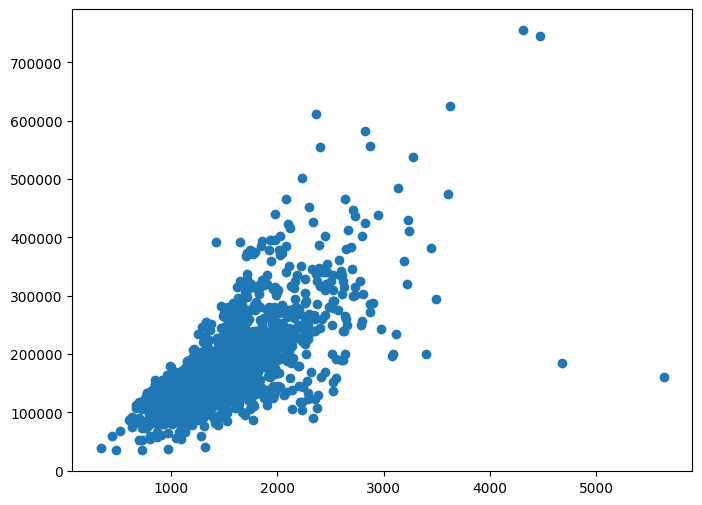

In [26]:
plt.scatter(x='GrLivArea',y='SalePrice',data=df_train)
df_train.query('GrLivArea>4000').sort_values(by='SalePrice')
#524,692

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
495    496          30  C (all)         60.0     7879      Reg         Lvl   
968    969          50       RM         50.0     5925      Reg         Lvl   
533    534          20       RL         50.0     5000      Reg         Low   
30      31          70  C (all)         50.0     8500      Reg         Lvl   
710    711          30       RL         56.0     4130      IR1         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
185    186          75       RM         90.0    22950      IR2         Lvl   
798    799          60       RL        104.0    13518      Reg         Lvl   
1046  1047          60       RL         85.0    16056      IR1         Lvl   
803    804          60       RL        107.0    13891      Reg         Lvl   
691    692          60       RL        104.0    21535      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
495     Inside       Gtl       IDOTRR  ...         0           0        0   
968     Inside       Gtl      OldTown  ...         0           0        0   
533     Inside       Mod      BrkSide  ...         0           0        0   
30      Inside       Gtl       IDOTRR  ...         0           0        0   
710     Inside       Gtl      BrkSide  ...         0           0        0   
...        ...       ...          ...  ...       ...         ...      ...   
185     Inside       Gtl      OldTown  ...         0         410        0   
798     Inside       Gtl      NridgHt  ...         0           0        0   
1046    Inside       Gtl      StoneBr  ...         0           0        0   
803     Inside       Gtl      NridgHt  ...         0         192        0   
691     Corner       Gtl      NoRidge  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
495        0      11    2009        WD        Abnorml     34900   
968        0       5    2009        WD        Abnorml     37900   
533        0       1    2007        WD         Normal     39300   
30         0       7    2008        WD         Normal     40000   
710        0       7    2008        WD         Normal     52000   
...      ...     ...     ...       ...            ...       ...   
185        0       6    2006        WD         Normal    475000   
798        0       7    2009       New        Partial    485000   
1046       0       7    2006       New        Partial    556581   
803        0       1    2009       New        Partial    582933   
691        0       1    2007        WD         Normal    755000   

            Exterior  
495   Wd SdngWd Sdng  
968   VinylSdVinylSd  
533   VinylSdVinylSd  
30    BrkFaceBrkFace  
710   VinylSdVinylSd  
...              ...  
185   Wd SdngWd Sdng  
798   VinylSdVinylSd  
1046  CemntBdCmentBd  
803   VinylSdVinylSd  
691   HdBoardHdBoard  

[856 rows x 69 columns]

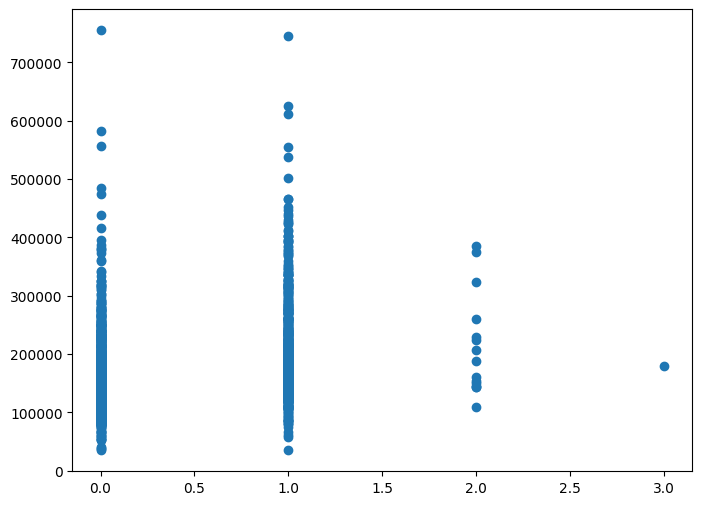

In [27]:
plt.scatter(x='BsmtFullBath',y='SalePrice',data=df_train)
df_train.query('BsmtFullBath==1').sort_values(by='SalePrice')
df_train.query('BsmtFullBath==0').sort_values(by='SalePrice')
#692,1183

In [28]:
df_train.BsmtFullBath=df_train.BsmtFullBath.replace(3,-1)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
954  955          90       RL         35.0     9400      IR1         Lvl   
597  598         120       RL         53.0     3922      Reg         Lvl   

    LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
954   CulDSac       Gtl      Edwards  ...         0           0        0   
597    Inside       Gtl      Blmngtn  ...         0           0        0   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice        Exterior  
954       0      10    2006        WD        AdjLand    127500  WdShingPlywood  
597       0       2    2007       New        Partial    194201  VinylSdVinylSd  

[2 rows x 69 columns]

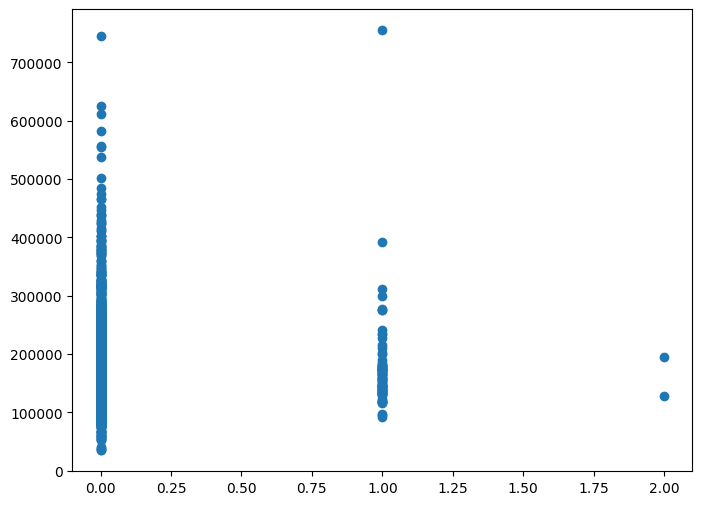

In [29]:
plt.scatter(x='BsmtHalfBath',y='SalePrice',data=df_train)
df_train.query('BsmtHalfBath==2').sort_values(by='SalePrice')
#955,598

In [30]:
df_train.BsmtHalfBath=df_train.BsmtHalfBath.replace(2,-1)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
635  636         190       RH         60.0    10896      Reg         Bnk   

    LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
635    Inside       Gtl        SWISU  ...         0           0        0   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice        Exterior  
635       0       3    2007        WD        Abnorml    200000  VinylSdVinylSd  

[1 rows x 69 columns]

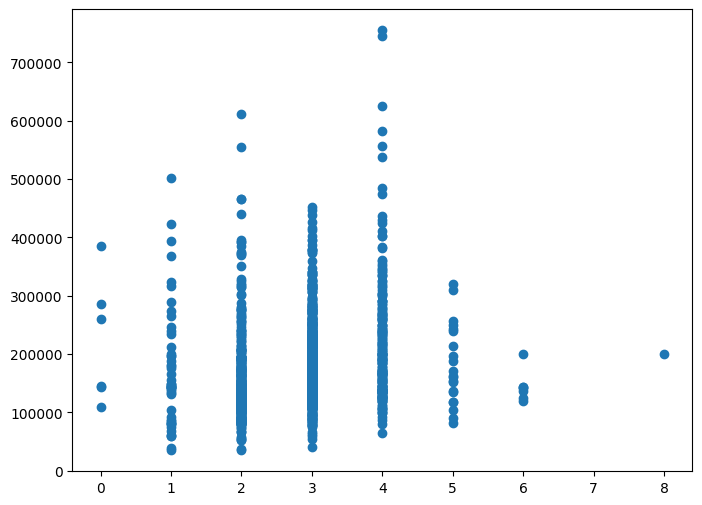

In [31]:
plt.scatter(x='BedroomAbvGr',y='SalePrice',data=df_train)
df_train.query('BedroomAbvGr==8').sort_values(by='SalePrice')
#636    

In [32]:
df_train.BedroomAbvGr=df_train.BedroomAbvGr.replace(8,-1)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
809  810          75       RM         90.0     8100      Reg         Lvl   
48    49         190       RM         33.0     4456      Reg         Lvl   
954  955          90       RL         35.0     9400      IR1         Lvl   

    LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
809    Corner       Gtl      OldTown  ...         0           0        0   
48     Inside       Gtl      OldTown  ...         0           0        0   
954   CulDSac       Gtl      Edwards  ...         0           0        0   

    MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice        Exterior  
809       0      11    2009        WD         Normal    106000  AsbShngAsbShng  
48        0       6    2009       New        Partial    113000  MetalSdMetalSd  
954       0      10    2006        WD        AdjLand    127500  WdShingPlywood  

[3 rows x 69 columns]

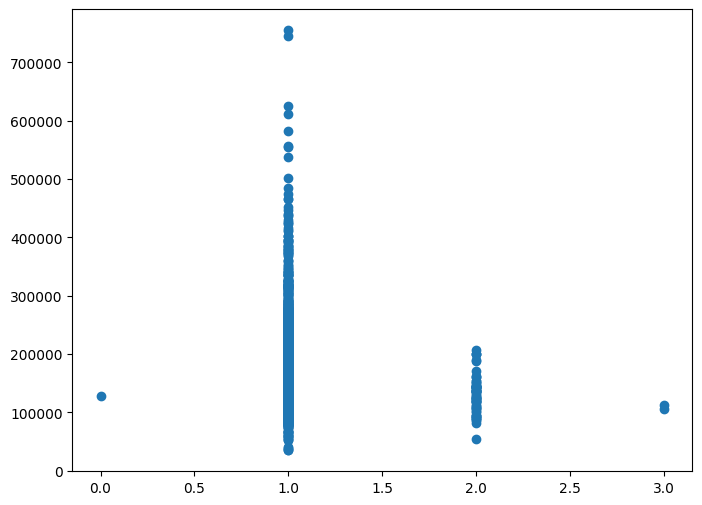

In [33]:
plt.scatter(x='KitchenAbvGr',y='SalePrice',data=df_train)
df_train.query('KitchenAbvGr==0 or KitchenAbvGr==3 ').sort_values(by='SalePrice')
#49,810,955

In [34]:
df_train.KitchenAbvGr=df_train.KitchenAbvGr.replace([0,3],-1)

TotRmsAbvGrd
6     0.275342
7     0.225342
5     0.188356
8     0.128082
4     0.066438
9     0.051370
10    0.032192
11    0.012329
3     0.011644
12    0.007534
2     0.000685
14    0.000685
Name: count, dtype: float64

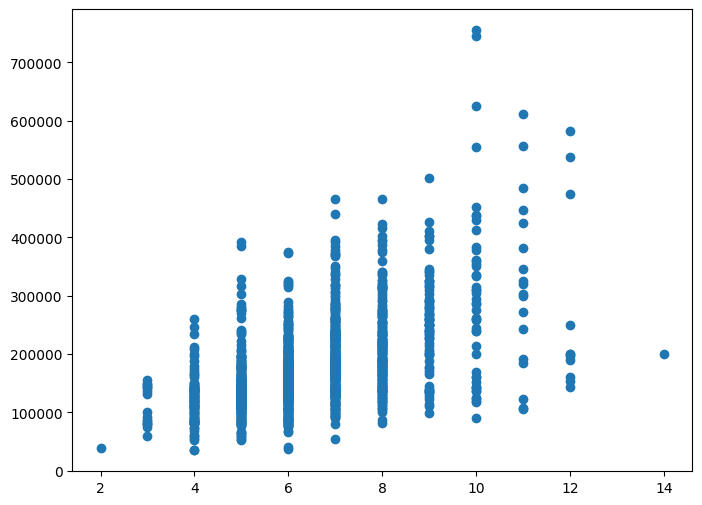

In [35]:
plt.scatter(x='TotRmsAbvGrd',y='SalePrice',data=df_train)
df_train.query('TotRmsAbvGrd==14').sort_values(by='SalePrice')
df_train.groupby('TotRmsAbvGrd')['SalePrice'].mean().sort_values(ascending=False)
df_train.TotRmsAbvGrd.value_counts()/len(df_train)
#636

In [36]:
df_train.TotRmsAbvGrd=df_train.TotRmsAbvGrd.replace(14,-1)

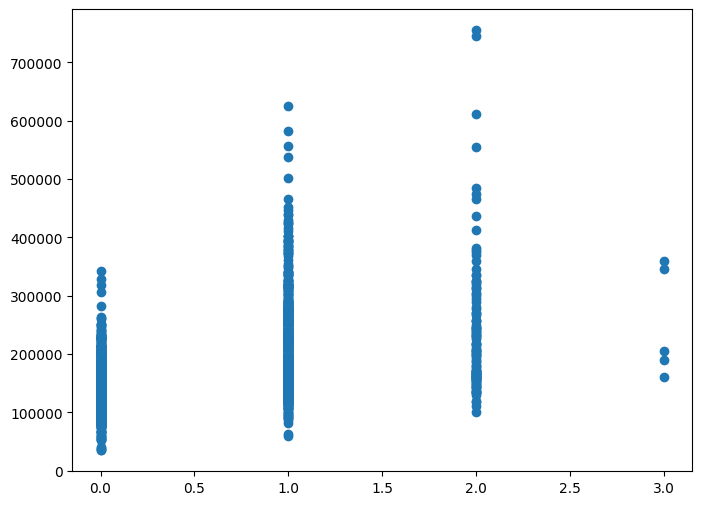

In [37]:
plt.scatter(x='Fireplaces',y='SalePrice',data=df_train)


In [38]:
df_train.Fireplaces=df_train.Fireplaces.replace(3,-1)

Series([], Name: count, dtype: float64)

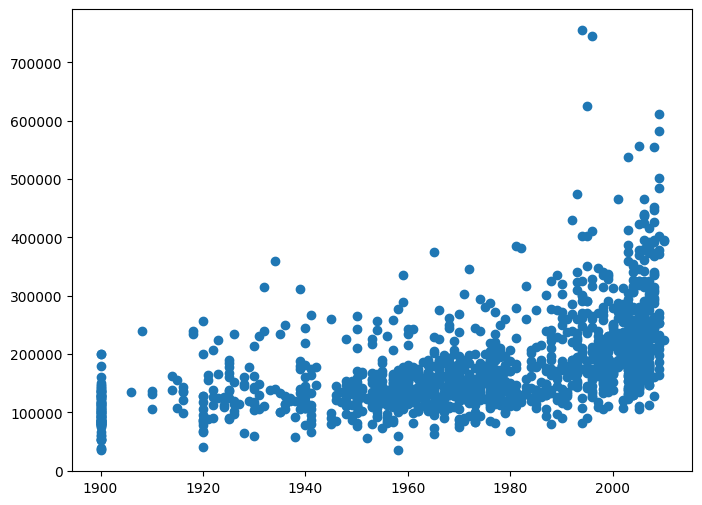

In [39]:
df_train.GarageYrBlt=df_train.GarageYrBlt.replace(0,1900)
plt.scatter(x='GarageYrBlt',y='SalePrice',data=df_train)
df_train[df_train.GarageYrBlt==0]['GarageYrBlt'].value_counts()/len(df_train)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1340  1341          20       RL         70.0     8294      Reg         Lvl   
1190  1191         190       RL          NaN    32463      Reg         Low   
1350  1351          90       RL         91.0    11643      Reg         Lvl   
420    421          90       RM         78.0     7060      Reg         Lvl   
747    748          70       RM         65.0    11700      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
1340    Inside       Gtl        NAmes  ...         0           0        0   
1190    Inside       Mod      Mitchel  ...         0           0        0   
1350    Inside       Gtl        NAmes  ...         0           0        0   
420     Inside       Gtl      Mitchel  ...         0           0        0   
747     Corner       Gtl      OldTown  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
1340       0       6    2007        WD         Normal    123000   
1190       0       3    2007        WD         Normal    168000   
1350       0       8    2009        WD         Normal    200000   
420        0      11    2008        WD         Alloca    206300   
747        0       5    2009        WD         Normal    265979   

            Exterior  
1340  MetalSdMetalSd  
1190  MetalSdMetalSd  
1350  MetalSdMetalSd  
420   VinylSdVinylSd  
747     StuccoStucco  

[5 rows x 69 columns]

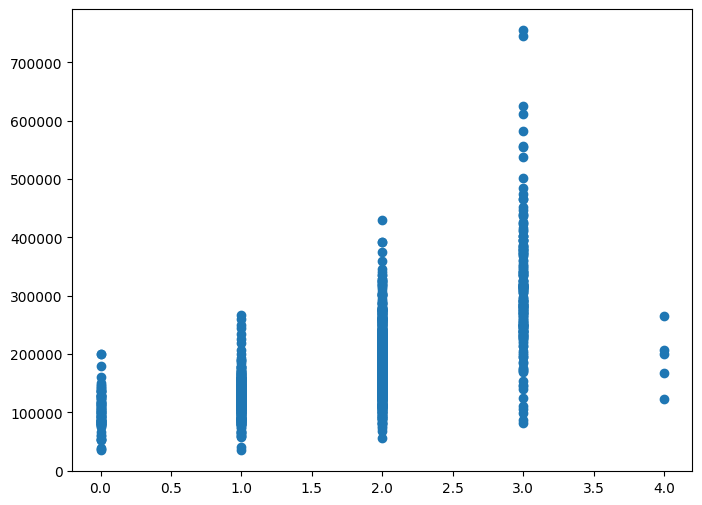

In [40]:
plt.scatter(x='GarageCars',y='SalePrice',data=df_train)
df_train.groupby('GarageCars')['SalePrice'].mean()
df_train.query('GarageCars==4').sort_values(by='SalePrice')


In [41]:
df_train.GarageCars=df_train.GarageCars.replace(4,-1)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
1061  1062          30  C (all)        120.0    18000      Reg         Low   
1298  1299          60       RL        313.0    63887      IR3         Bnk   
1190  1191         190       RL          NaN    32463      Reg         Low   
581    582          20       RL         98.0    12704      Reg         Lvl   
825    826          20       RL        114.0    14803      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
1061    Inside       Gtl       IDOTRR  ...         0           0        0   
1298    Corner       Gtl      Edwards  ...         0           0      480   
1190    Inside       Mod      Mitchel  ...         0           0        0   
581     Inside       Gtl      NridgHt  ...         0           0        0   
825     Inside       Gtl      NridgHt  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
1061     560       8    2008     ConLD         Normal     81000   
1298       0       1    2008       New        Partial    160000   
1190       0       3    2007        WD         Normal    168000   
581        0       8    2009       New        Partial    253293   
825        0       6    2008       New        Partial    385000   

            Exterior  
1061  MetalSdMetalSd  
1298    StuccoStucco  
1190  MetalSdMetalSd  
581   VinylSdVinylSd  
825   CemntBdCmentBd  

[5 rows x 69 columns]

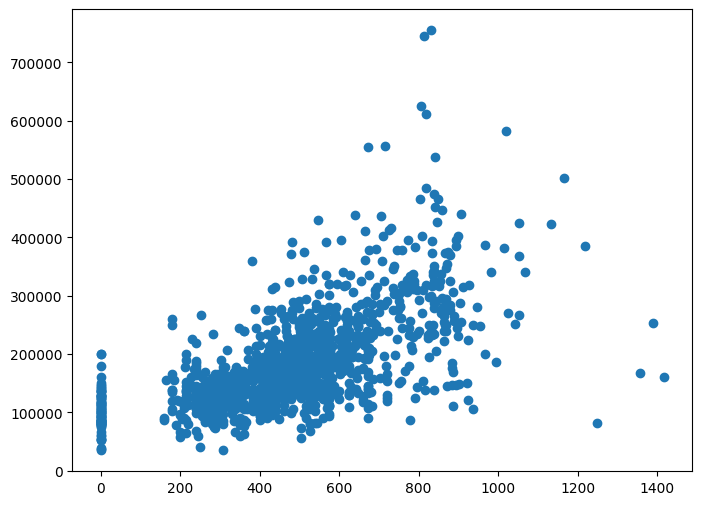

In [42]:
plt.scatter(x='GarageArea',y='SalePrice',data=df_train)
df_train.query('GarageArea>1200').sort_values(by='SalePrice')
#582,1191,1062

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
495    496          30  C (all)         60.0     7879      Reg         Lvl   
1328  1329          50       RM         60.0    10440      Reg         Lvl   
583    584          75       RM         75.0    13500      Reg         Lvl   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
495     Inside       Gtl       IDOTRR  ...         0           0        0   
1328    Corner       Gtl      OldTown  ...         0         480        0   
583     Inside       Gtl      OldTown  ...         0           0        0   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  \
495        0      11    2009        WD        Abnorml     34900   
1328    1150       6    2008        WD         Normal    256000   
583        0       7    2008        WD         Normal    325000   

            Exterior  
495   Wd SdngWd Sdng  
1328  BrkFaceWd Sdng  
583   Wd SdngWd Sdng  

[3 rows x 69 columns]

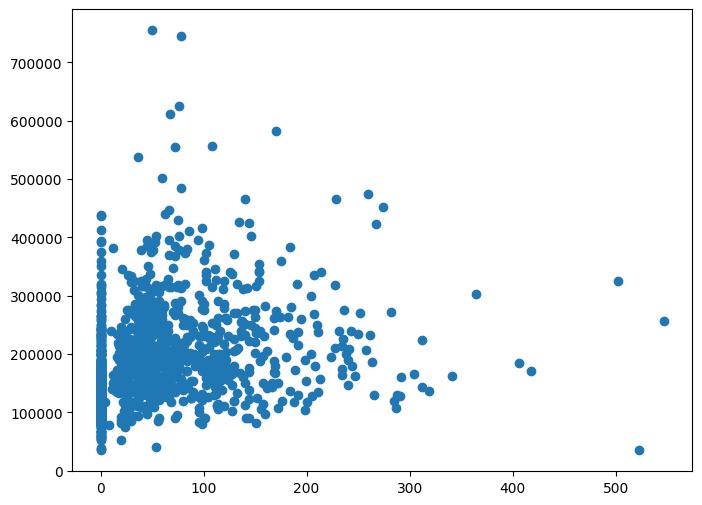

In [43]:
plt.scatter(x='OpenPorchSF',y='SalePrice',data=df_train)
df_train.query('OpenPorchSF>500').sort_values(by='SalePrice')
#496,1329,584


WoodDeckSF
0    0.521233
Name: count, dtype: float64

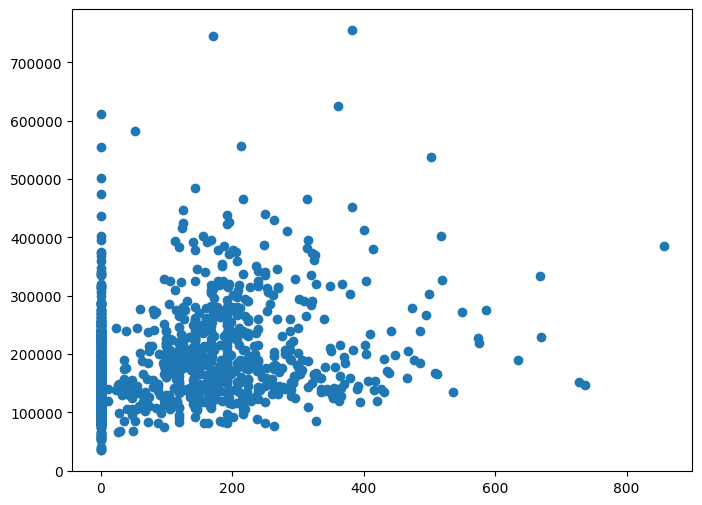

In [44]:
plt.scatter(x='WoodDeckSF',y='SalePrice',data=df_train)
df_train.query('WoodDeckSF>800').sort_values(by='SalePrice')
#54
df_train[df_train.WoodDeckSF==0]['WoodDeckSF'].value_counts()/len(df_train)

EnclosedPorch
0    0.857534
Name: count, dtype: float64

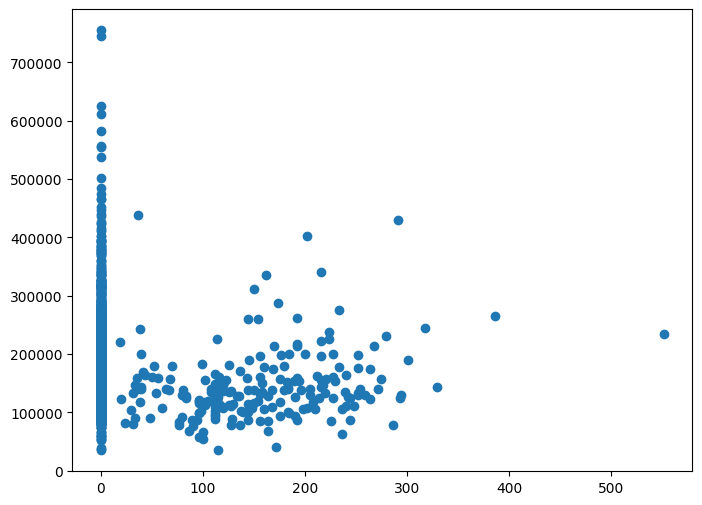

In [45]:
plt.scatter(x='EnclosedPorch',y='SalePrice',data=df_train)
df_train.query('EnclosedPorch>500').sort_values(by='SalePrice')
df_train[df_train.EnclosedPorch==0]['EnclosedPorch'].value_counts()/len(df_train)

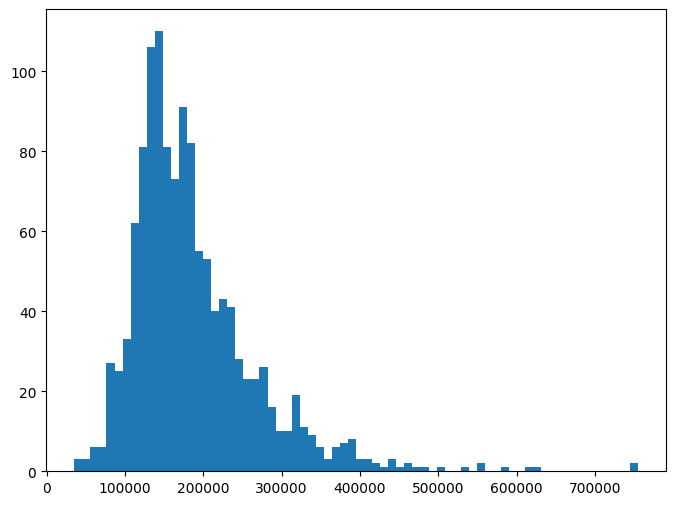

In [46]:
plt.hist(x=df_train[df_train.EnclosedPorch==0]['SalePrice'],bins=70)
plt.show()


0.9835616438356164

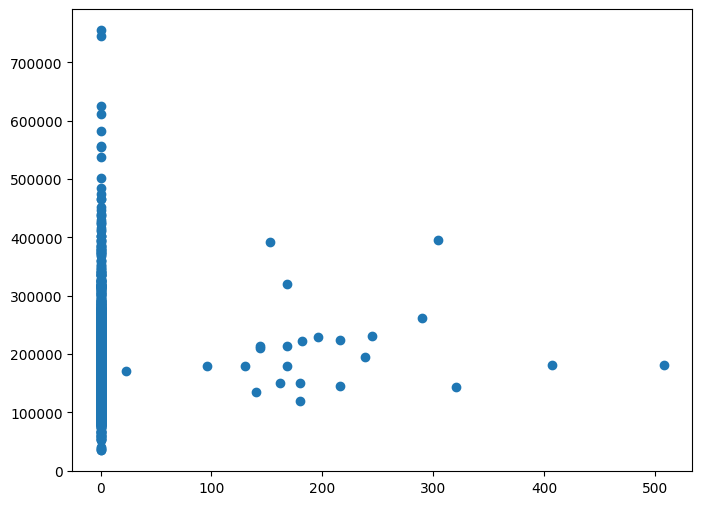

In [47]:
plt.scatter(x='3SsnPorch',y='SalePrice',data=df_train)
df_train[df_train['3SsnPorch']==0]['3SsnPorch'].value_counts()[0]/len(df_train)


In [48]:
df_train.drop(columns=["3SsnPorch"],inplace=True)
df_test.drop(columns=["3SsnPorch"],inplace=True)



ScreenPorch
0    0.920548
Name: count, dtype: float64

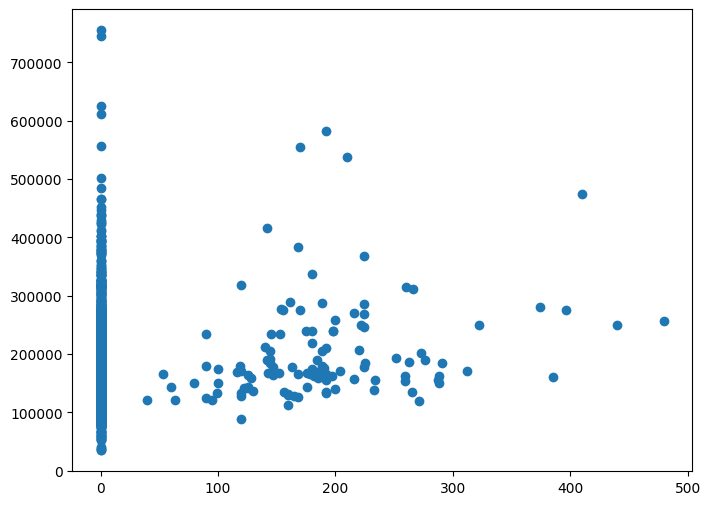

In [49]:
plt.scatter(x='ScreenPorch',y='SalePrice',data=df_train)
df_train[df_train.ScreenPorch==0]['ScreenPorch'].value_counts()/len(df_train)

PoolArea
0    0.995205
Name: count, dtype: float64

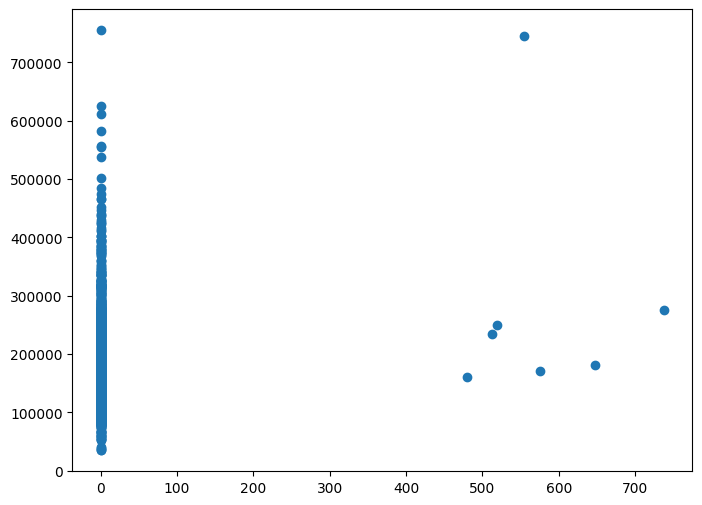

In [50]:
plt.scatter(x='PoolArea',y='SalePrice',data=df_train)
df_train[df_train.PoolArea==0]['PoolArea'].value_counts()/len(df_train)


In [51]:
df_train.drop(columns=["PoolArea"],inplace=True)
df_test.drop(columns=["PoolArea"],inplace=True)

MiscVal
0    0.964384
Name: count, dtype: float64

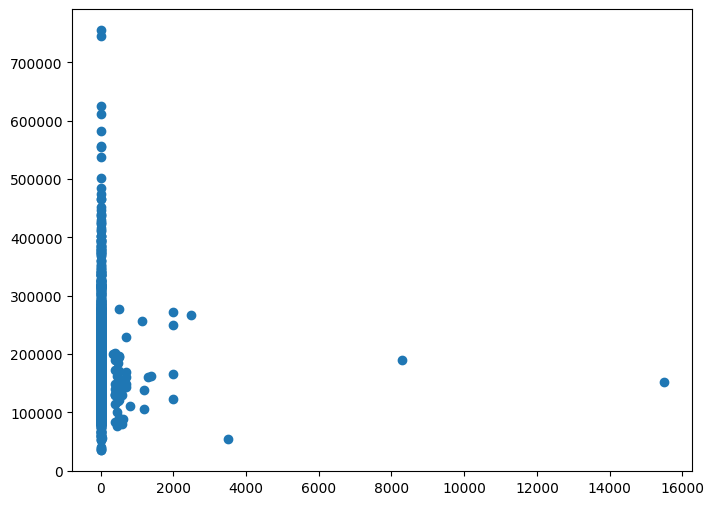

In [52]:

plt.scatter(x='MiscVal',y='SalePrice',data=df_train)
df_train.query('MiscVal>6000').sort_values(by='SalePrice')
df_train[df_train.MiscVal==0]['MiscVal'].value_counts()/len(df_train)

#347 1231


In [53]:
df_train.drop(columns=["MiscVal"],inplace=True)
df_test.drop(columns=["MiscVal"],inplace=True)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
705    706         190       RM         70.0     5600      Reg         Lvl   
812    813          20  C (all)         66.0     8712      Reg         Bnk   
1380  1381          30       RL         45.0     8212      Reg         Lvl   
1279  1280          50  C (all)         60.0     7500      Reg         Lvl   
614    615         180       RM         21.0     1491      Reg         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
378    379          20       RL         88.0    11394      Reg         Lvl   
987    988          20       RL         83.0    10159      IR1         Lvl   
1353  1354          50       RL         56.0    14720      IR1         Lvl   
769    770          60       RL         47.0    53504      IR2         HLS   
898    899          20       RL        100.0    12919      IR1         Lvl   

     LotConfig LandSlope Neighborhood  ... WoodDeckSF OpenPorchSF  \
705     Inside       Gtl       IDOTRR  ...          0           0   
812     Inside       Mod       IDOTRR  ...          0           0   
1380    Inside       Gtl      Edwards  ...          0           0   
1279    Inside       Gtl       IDOTRR  ...         30           0   
614     Inside       Gtl      MeadowV  ...         96          24   
...        ...       ...          ...  ...        ...         ...   
378     Corner       Gtl      StoneBr  ...        113           0   
987     Inside       Gtl      NridgHt  ...        168          95   
1353   CulDSac       Gtl      NoRidge  ...        283          86   
769    CulDSac       Mod      StoneBr  ...        503          36   
898     Inside       Gtl      NridgHt  ...          0          67   

     EnclosedPorch ScreenPorch  MoSold  YrSold  SaleType  SaleCondition  \
705              0           0       7    2010        WD         Normal   
812              0           0       6    2010        WD         Alloca   
1380            96           0       6    2010        WD         Normal   
1279           164           0       4    2010       COD        Abnorml   
614              0           0       5    2010        WD         Normal   
...            ...         ...     ...     ...       ...            ...   
378              0           0       6    2010       New        Partial   
987              0           0       4    2010       New        Partial   
1353             0           0       3    2010        WD         Normal   
769              0         210       6    2010        WD         Normal   
898              0           0       3    2010       New        Partial   

     SalePrice        Exterior  
705      55000  VinylSdWd Shng  
812      55993  Wd SdngWd Sdng  
1380     58500    StuccoStucco  
1279     68400  MetalSdMetalSd  
614      75500  CemntBdCmentBd  
...        ...             ...  
378     394432  VinylSdVinylSd  
987     395192  VinylSdVinylSd  
1353    410000  VinylSdVinylSd  
769     538000  CemntBdWd Shng  
898     611657  VinylSdVinylSd  

[175 rows x 66 columns]

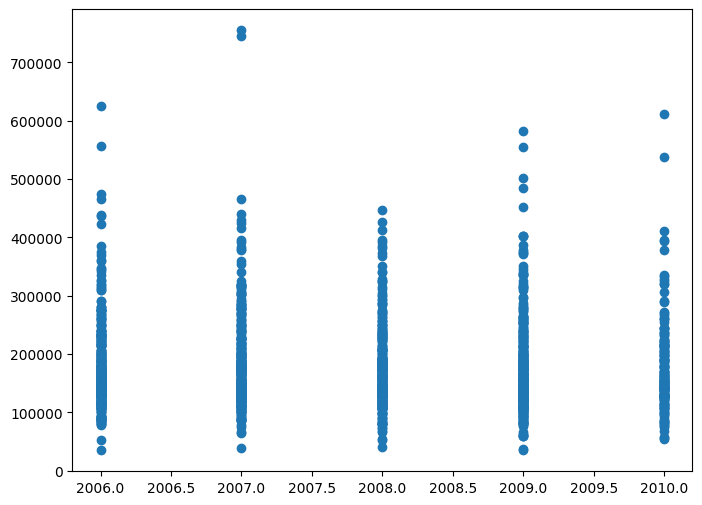

In [54]:
plt.scatter(x='YrSold',y='SalePrice',data=df_train)
df_train.query('YrSold==2007').sort_values(by='SalePrice')
df_train.query('YrSold==2010').sort_values(by='SalePrice')
#692,1183,770,899	

Text(0.5, 1.0, 'Sale Price vs Lot Features (Colored)')

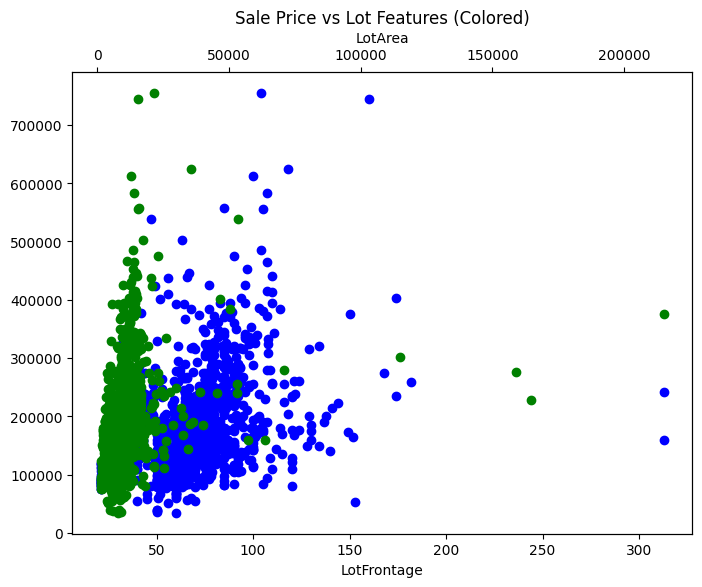

In [55]:
fig,ax1=plt.subplots()
ax1.set_xlabel("LotFrontage")
ax1.scatter(x=df_train['LotFrontage'],y=df_train['SalePrice'],label='LotFrontage', color='blue')
ax2=ax1.twiny()
ax2.set_xlabel("LotArea")
ax2.scatter(x=df_train['LotArea'],y=df_train['SalePrice'], label='LotArea', color='green')

# Add labels and title
plt.ylabel('Sale Price')
plt.title('Sale Price vs Lot Features (Colored)')


Finding if there's correlation between them:

In [56]:
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
nan_values= df_train['LotFrontage'].isna()
X=df_train['LotArea'][-nan_values]
y=df_train['LotFrontage'][-nan_values]

xy=pd.concat([X,y],axis=1)

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
outlier_bounds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
print(xy.shape)
xy= xy[xy['LotArea'].between(*outlier_bounds)]
x=xy['LotFrontage'].values.reshape(-1, 1)
y=xy['LotArea'].values.reshape(-1, 1)

for regr in [LinearRegression(),Lasso(),Ridge(),ElasticNet()]:
    regr=regr.fit(x,y)
    y_pred=regr.predict(x)
    print(r2_score(y,y_pred))

#<0.5

(1201, 2)
0.4580245908195367
0.45802459056362377
0.4580245908176136
0.4580239503804592


In [57]:
delete_ids=[770, 523, 524, 1298, 1299, 1183, 934, 1191, 1062, 810, 49, 1329, 692, 54, 186, 955, 314, 707, 452, 323, 582, 584, 457, 336, 598, 496, 250, 379, 636]

df_train.drop(df_train[df_train.Id.isin(delete_ids)].index, inplace=True)

Feature Engineering (reducing columns)

In [58]:
df_train['houseage'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['houseage'] = df_test['YrSold'] - df_test['YearBuilt']
df_train['houseremodelage'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_test['houseremodelage'] = df_test['YrSold'] - df_test['YearRemodAdd']
df_train['totalsf'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_test['totalsf'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']
df_train['totalarea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
df_test['totalarea'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']
df_train['totalbaths'] = df_train['BsmtFullBath'] + df_train['FullBath'] + 0.5 * (df_train['BsmtHalfBath'] + df_train['HalfBath']) 
df_test['totalbaths'] = df_test['BsmtFullBath'] + df_test['FullBath'] + 0.5 * (df_test['BsmtHalfBath'] + df_test['HalfBath']) 
df_train['totalporchsf'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF']
df_test['totalporchsf'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_test['WoodDeckSF']

df_train.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'],inplace=True)
df_test.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'],inplace=True)

<Axes: >

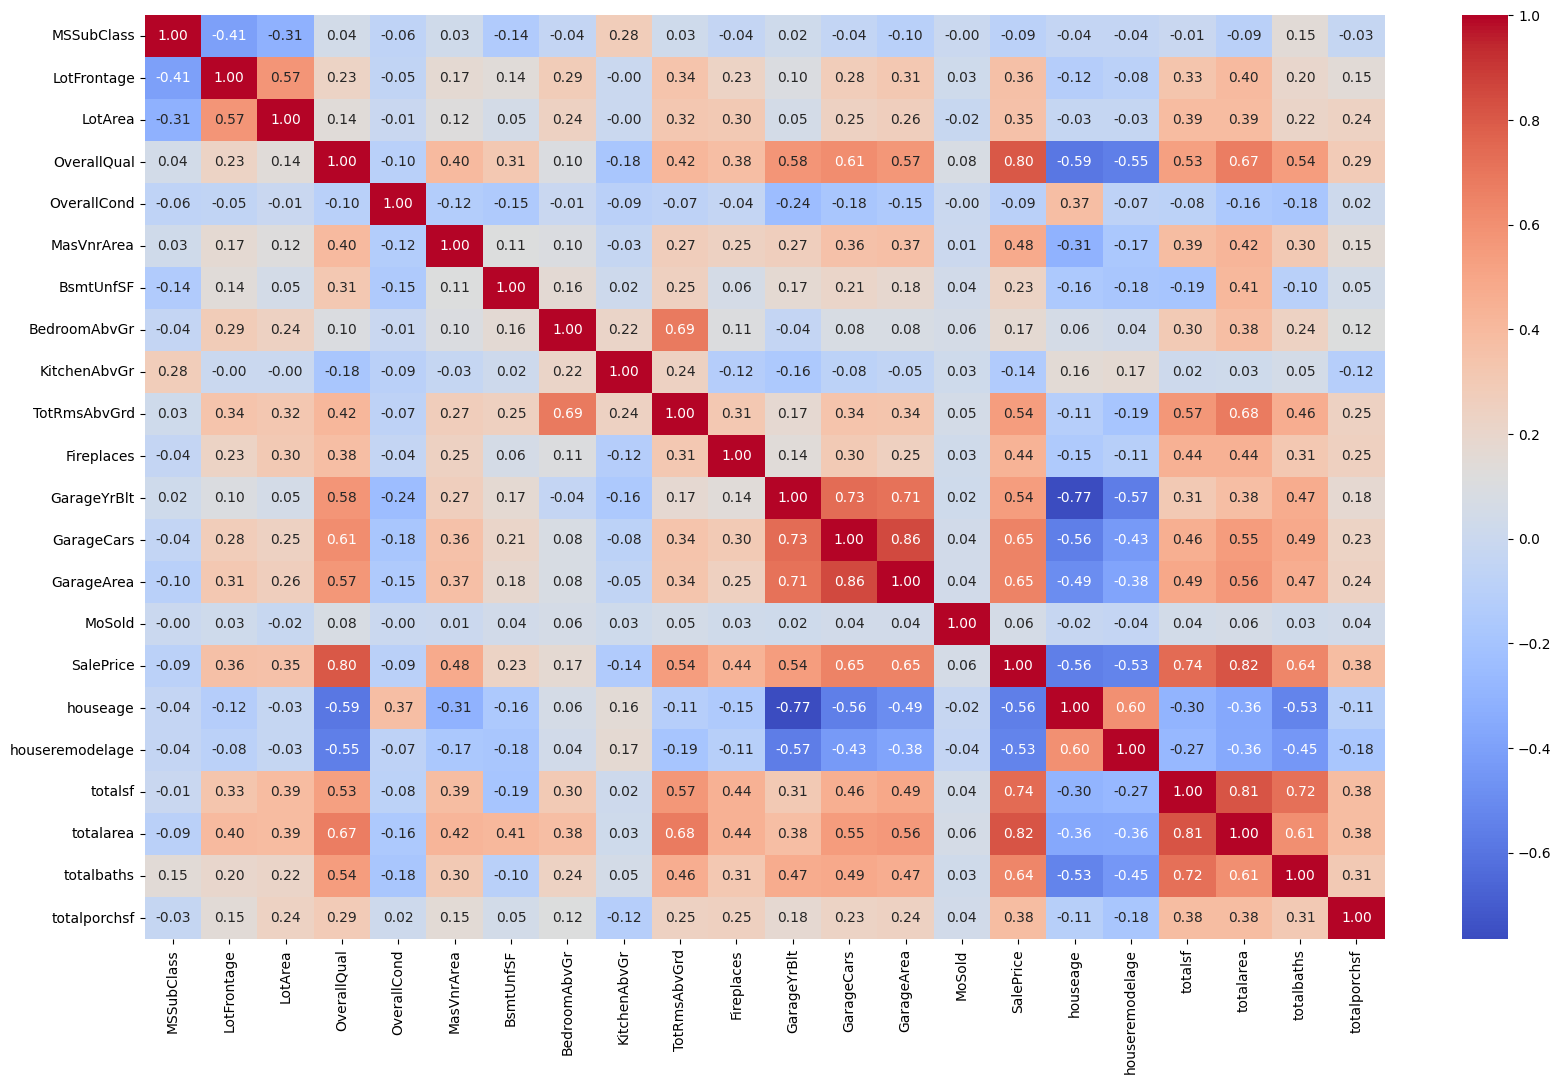

In [59]:
corr_matrix = df_train.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [60]:
def idfyCorrelations(df,maxcorr):
    corr_features=set()
    dfcorr=df.corr(numeric_only=True)
    y=list(dfcorr.columns).index('SalePrice')
    for column in range(len(dfcorr.columns)):
        for row in range(column):
            a=dfcorr.columns[column]
            b=dfcorr.columns[row]
            if dfcorr.iloc[column,row]!=1 and (a!='SalePrice' and b!='SalePrice'):
                if abs(dfcorr.iloc[column,row])>=maxcorr and (abs(dfcorr.iloc[column,y])>=maxcorr or abs(dfcorr.iloc[row,y])>=maxcorr):
                    tup=tuple([a,b])
                    corr_features.add(tup)
    return corr_features
cols=idfyCorrelations(df_train,0.65)
cols

{('totalarea', 'OverallQual'),
 ('totalarea', 'TotRmsAbvGrd'),
 ('totalarea', 'totalsf'),
 ('totalbaths', 'totalsf')}

In [61]:
delete_cols=['GarageArea','GarageYrBlt','OverallQual','totalsf']
df_train.drop(columns=delete_cols,axis=1,inplace=True)
df_test.drop(columns=delete_cols,axis=1,inplace=True)

## Cleansing and Feature Engineering

Encoding Ordinal Cols 

In [62]:
#ordinal conversion 
def ordinal_conversion(df):
    df["LotShape"] =df["LotShape"].replace({'Reg':4,'IR1':3,'IR2':2,'IR3':1,'NA':0}).astype(float)
    df['LandSlope']=df['LandSlope'].replace({'Gtl':3,'Mod':2,'Sev':1,'NA':0}).astype(float)
    for col in ["ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","GarageQual","GarageCond"]:
        df[col]=df[col].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}).astype(float)
    df['BsmtExposure']=df['BsmtExposure'].replace({'Gd':5,'Av':4,'Mn':3,'No':2,'NA':0}).astype(float)  
    for col in ["BsmtFinType1","BsmtFinType2"]:
        df[col]=df[col].replace({'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':0}).astype(float)
    df["GarageFinish"]=df["GarageFinish"].replace({'Fin':4,'RFn':3,'Unf':2,'NA':0}).astype(float)
ord_cols=["LotShape",'LandSlope',"ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","GarageQual","GarageCond",'BsmtExposure',"BsmtFinType1","BsmtFinType2","GarageFinish",'GarageCars','KitchenAbvGr','TotRmsAbvGrd']
ordinal_conversion(df_train)
ordinal_conversion(df_test)

Encoding Nominal Cols 



In [63]:
n_cols=df_train.dtypes == 'object'
n_cols=df_train.columns[n_cols]
n_cols=list(n_cols)
n_cols.extend(["Fireplaces","BedroomAbvGr","KitchenAbvGr","MSSubClass","MoSold","OverallCond","totalbaths"])

nom1_cols=[]
nom2_cols=[]
for col in n_cols:
    values=df_train[col].unique()
    if len(values)>6 : #frec encoder
        nom1_cols.append(col)
    else:# one-hot encoder
        nom2_cols.append(col)
df_train[nom1_cols]=df_train[nom1_cols].astype('category')
df_test[nom1_cols]=df_test[nom1_cols].astype('category')


Encoding Numerical cols

In [64]:
num_cols=df_test.dtypes != 'object'
num_cols=df_test.columns[num_cols]
num_cols=num_cols.difference(set(ord_cols+nom1_cols+nom2_cols)) 
num_cols


Index(['BsmtUnfSF', 'LotArea', 'LotFrontage', 'MasVnrArea', 'houseage',
       'houseremodelage', 'totalarea', 'totalporchsf'],
      dtype='object')

474.0
9450.0
69.5
0.0
35.0
14.0
2468.0
160.0


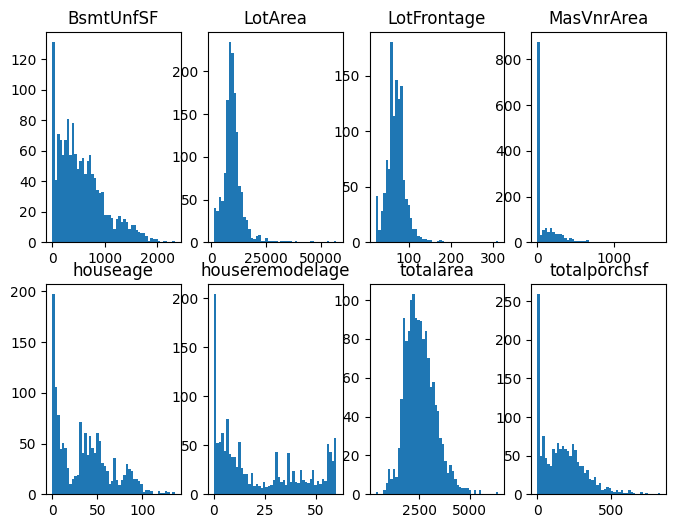

In [65]:
fig,axes=plt.subplots(2,4)
axes=axes.flatten()
for i,col in enumerate(num_cols):
    ax=axes[i]
    ax.hist(x=df_train[col],bins=50)
    print(df_train[col].median())
    ax.set_title(col)
    
plt.show()

In [66]:
#median centered
num1_cols=['LotArea','LotFrontage','totalarea']
#0 frequent
num2_cols=['BsmtUnfSF','MasVnrArea','houseage','houseremodelage','totalporchsf']

del num_cols


In [67]:
 
ord_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('maxmin',MinMaxScaler())
])

nom_pipeline1 = Pipeline(steps=[
    ('freq', CountFrequencyEncoder(encoding_method='frequency',missing_values='ignore')), 
    ('impute', KNNImputer(n_neighbors=20))
    
])

nom_pipeline2=Pipeline(steps=[
    ('preimpute',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)),
    ('impute',KNNImputer(n_neighbors=20)),
    ('ohe', OneHotEncoder(handle_unknown='infrequent_if_exist',sparse_output=False)) 
])

num_pipeline1=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median',fill_value='missing')),
    ('ode', RobustScaler()) 
])
num_pipeline2=Pipeline(steps=[
    ('impute',IterativeImputer(max_iter=50,random_state=0,initial_strategy='most_frequent',fill_value='missing')),
    ('ode', RobustScaler()) 
])
col_trans=ColumnTransformer(transformers=[
    ('nom1', nom_pipeline1,nom1_cols),
    ('nom2', nom_pipeline2, nom2_cols),
    ('ord', ord_pipeline,ord_cols),
    ('num1',num_pipeline1,num1_cols),
    ('num2',num_pipeline2,num2_cols)
    ],
    remainder='passthrough', 
    n_jobs=-1,
    )        
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])
pipeline.set_output(transform='pandas')



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('nom1',
                                                  Pipeline(steps=[('freq',
                                                                   CountFrequencyEncoder(encoding_method='frequency',
                                                                                         missing_values='ignore')),
                                                                  ('impute',
                                                                   KNNImputer(n_neighbors=20))]),
                                                  ['Neighborhood', 'Condition1',
                                                   'HouseStyle', 'Functional',
                                                   'GarageType', 'SaleType',
                                                   'Exterior', 'BedroomAbvGr...
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='median')),
                                                                  ('ode',
                                                                   RobustScaler())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'totalarea']),
                                                 ('num2',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(fill_value='missing',
                                                                                    initial_strategy='most_frequent',
                                                                                    max_iter=50,
                                                                                    random_state=0)),
                                                                  ('ode',
                                                                   RobustScaler())]),
                                                  ['BsmtUnfSF', 'MasVnrArea',
                                                   'houseage',
                                                   'houseremodelage',
                                                   'totalporchsf'])]))])

In [68]:
# for i,j in zip([ord_pipeline,nom_pipeline1,nom_pipeline2,num_pipeline2],[ord_cols,nom1_cols,nom2_cols,num2_cols]):
#     output=i.fit_transform(df_test[j])
#     print(output.shape)
# # num_pipeline2.fit_transform(df_test[num2_cols])

In [69]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']
X_pre = pipeline.fit_transform(X)

<Axes: >

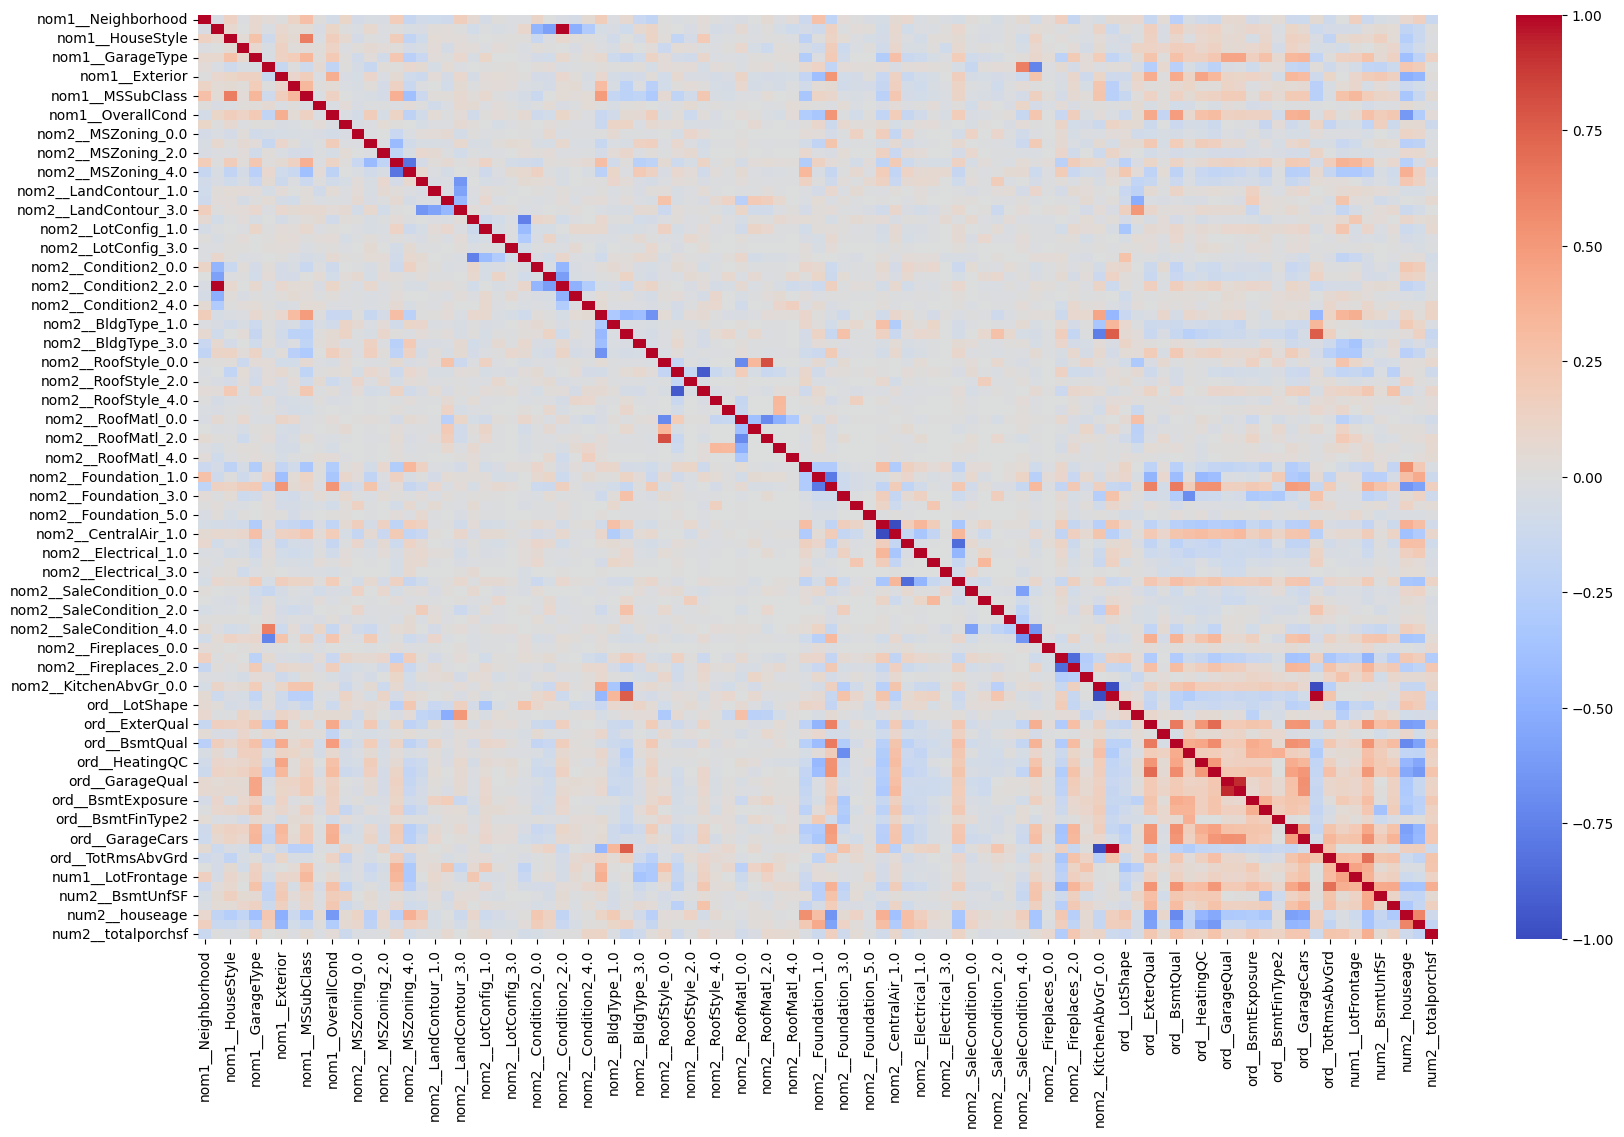

In [70]:
# X_pre
corr_matrix = X_pre.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt=".2f")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, random_state=0)

## ML MODEL FIT AND PREDICTION

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV

#best param fits founded
gbr = GradientBoostingRegressor(learning_rate=0.2, loss='huber', max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=300, random_state=42)
                                   

lightgbm = LGBMRegressor(bagging_fraction=0.75, bagging_freq=5, bagging_seed=7,
              colsample_bytree=0.8, feature_fraction=0.2,
              feature_fraction_seed=7, max_bin=200, max_depth=5,
              n_estimators=300, objective='regression',
              scoring='neg_mean_squared_error', subsample=0.8, verbose=-1
                                       )

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     scoring='neg_mean_squared_error',
                                     reg_alpha=0.00006
                                     )
#still undiscovered
sgd=SGDRegressor()
catboost=CatBoostRegressor()
adaboost=AdaBoostRegressor()



In [85]:
param_grid_cat = {
    'iterations': [100, 500, 1000, 2000],  # Increased maximum iterations
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'l2_leaf_reg': [1, 3, 5, 7, 9],  # L2 regularization term on leaves
    'bagging_temperature': [0, 0.2, 0.5, 0.8],  # Bagging temperature for subsampling
    'random_strength': [1, 5, 9],  # Controls randomness in feature selection
    'min_data_in_leaf': [1, 5, 10, 20],  # Minimum number of samples in a leaf
    'one_hot_max_size': [2, 5, 10, 20]  # Maximum number of categories for one-hot encoding
}

cat_gs=RandomizedSearchCV(catboost,param_grid_cat,n_iter=100,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2,cv=3)

In [86]:
param_grid_sgd = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.05, 0.1]
}
sgd_gs=RandomizedSearchCV(sgd,param_grid_sgd,n_iter=100,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2,cv=3)


In [87]:
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01,0.1, 0.5, 1.0, 1.5],
    'loss': ['linear', 'square', 'exponential']
}

ada_gs = RandomizedSearchCV(adaboost, param_grid_ada, n_iter=100,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2,cv=3)

In [88]:
#Training
print('GradientBoosting')
gbr.fit(X_train,y_train)

print('xgboost')
xgboost.fit(X_train,y_train)

print('lightgbm')
lightgbm.fit(X_train,y_train)

print('sgd')
sgd_gs.fit(X_train,y_train)


GradientBoosting
xgboost
lightgbm
sgd
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=SGDRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'eta0': [0.01, 0.05, 0.1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['squared_loss', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'penalty': ['l2', 'l1', 'elasticnet']},
                   scoring='neg_mean_squared_error', verbose=2)

In [89]:

print('catboost')
cat_gs.fit(X_train,y_train)


catboost
Fitting 3 folds for each of 100 candidates, totalling 300 fits
0:	learn: 73040.8302082	total: 145ms	remaining: 2m 24s
1:	learn: 71112.0190280	total: 146ms	remaining: 1m 13s
2:	learn: 68929.2057377	total: 148ms	remaining: 49.2s
3:	learn: 66872.7299153	total: 150ms	remaining: 37.3s
4:	learn: 64943.8490527	total: 151ms	remaining: 30s
5:	learn: 63054.0195079	total: 152ms	remaining: 25.2s
6:	learn: 61306.9808044	total: 154ms	remaining: 21.8s
7:	learn: 59574.9166253	total: 156ms	remaining: 19.3s
8:	learn: 58024.4897540	total: 158ms	remaining: 17.4s
9:	learn: 56513.2690716	total: 159ms	remaining: 15.8s
10:	learn: 55045.7341749	total: 161ms	remaining: 14.5s
11:	learn: 53750.8806755	total: 163ms	remaining: 13.4s
12:	learn: 52361.8842504	total: 164ms	remaining: 12.5s
13:	learn: 51043.9773523	total: 166ms	remaining: 11.7s
14:	learn: 49912.3878733	total: 167ms	remaining: 11s
15:	learn: 48693.1254519	total: 169ms	remaining: 10.4s
16:	learn: 47533.5903139	total: 171ms	remaining: 9.87s
17:	l

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000211C33FA7E0>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.2, 0.5,
                                                                0.8],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [100, 500, 1000, 2000],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'min_data_in_leaf': [1, 5, 10, 20],
                                        'one_hot_max_size': [2, 5, 10, 20],
                                        'random_strength': [1, 5, 9]},
                   scoring='neg_mean_squared_error', verbose=2)

In [90]:

print('adaboost')
ada_gs.fit(X_train,y_train)


adaboost
Fitting 3 folds for each of 60 candidates, totalling 180 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0,
                                                          1.5],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [91]:
#Testing
print('GradientBoosting')
print(gbr.score(X_test,y_test))

print('xgboost')
print(xgboost.score(X_test,y_test))

print('lightgbm')
print(lightgbm.score(X_test,y_test))

print('sgd')
print(sgd_gs.best_estimator_.score(X_test,y_test))

print('catboost')
print(cat_gs.best_estimator_.score(X_test,y_test))

print('adaboost')
print(ada_gs.best_estimator_.score(X_test,y_test))

GradientBoosting
0.913703504592279
xgboost
0.9200489521026611
lightgbm
0.9167188482777529
sgd
0.8716080679766336
catboost
0.9240878850616638
adaboost
0.8146824741920353


In [94]:
estimators=[
    ('sgd',sgd_gs.best_estimator_),
    ('lightgbm',lightgbm),
    ('gbr',gbr),
    ('xgboost',xgboost),
]
sr=StackingRegressor(
    estimators=estimators,
    final_estimator=cat_gs.best_estimator_,
)
param_grid_final_esimator = {
    'final_estimator__learning_rate': [0.01, 0.1, 0.2],
    'final_estimator__depth': [6, 8, 10],
    'final_estimator__l2_leaf_reg': [1, 3, 5],
    'final_estimator__random_strength': [1, 3, 5],
    'final_estimator__bagging_temperature': [0, 0.5, 1.0],
    'final_estimator__od_type': ['Iter', 'L2'],
    'final_estimator__od_wait': [10, 20, 30],
}
sr_cv=RandomizedSearchCV(sr,param_grid_final_esimator,n_iter=3,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)



In [95]:
print('Fitting StackingRegressor')
print(sr_cv.fit(X_train,y_train))

print('StackingRegressor')
print(sr_cv.best_estimator_.score(X_test,y_test))

Fitting StackingRegressor
Fitting 5 folds for each of 3 candidates, totalling 15 fits
0:	learn: 69560.1684049	total: 2.49ms	remaining: 2.49s
1:	learn: 64258.3911131	total: 4.44ms	remaining: 2.22s
2:	learn: 59427.1825460	total: 6.34ms	remaining: 2.11s
3:	learn: 55059.5925687	total: 8.45ms	remaining: 2.1s
4:	learn: 51189.7023056	total: 11ms	remaining: 2.19s
5:	learn: 47699.0532356	total: 13.1ms	remaining: 2.17s
6:	learn: 44524.3372032	total: 15.1ms	remaining: 2.15s
7:	learn: 41795.5431283	total: 17.1ms	remaining: 2.12s
8:	learn: 39321.7557104	total: 19.1ms	remaining: 2.11s
9:	learn: 37179.0564918	total: 21.1ms	remaining: 2.09s
10:	learn: 35191.2755616	total: 23.1ms	remaining: 2.07s
11:	learn: 33498.1621128	total: 25.3ms	remaining: 2.08s
12:	learn: 31979.6729675	total: 27.4ms	remaining: 2.08s
13:	learn: 30659.7375631	total: 29.3ms	remaining: 2.06s
14:	learn: 29477.4363946	total: 31.4ms	remaining: 2.06s
15:	learn: 28451.3676256	total: 33.3ms	remaining: 2.05s
16:	learn: 27585.1670380	total:

In [96]:
estimators=[
    ('lightgbm',lightgbm),
    ('gbr',gbr),
    ('xgboost',xgboost),
]
sr=StackingRegressor(
    estimators=estimators,
    final_estimator=cat_gs.best_estimator_,
)
sr_cv=RandomizedSearchCV(sr,param_grid_final_esimator,n_iter=3,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)
print(sr_cv.fit(X_train,y_train))
print('StackingRegressor')
print(sr_cv.best_estimator_.score(X_test,y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0:	learn: 74869.6667769	total: 1.08ms	remaining: 1.08s
1:	learn: 74281.7384006	total: 2.01ms	remaining: 1s
2:	learn: 73705.0293768	total: 2.87ms	remaining: 954ms
3:	learn: 73118.6179363	total: 3.83ms	remaining: 954ms
4:	learn: 72550.5777952	total: 4.75ms	remaining: 946ms
5:	learn: 71980.5517881	total: 6.22ms	remaining: 1.03s
6:	learn: 71415.4904719	total: 7.1ms	remaining: 1.01s
7:	learn: 70863.8348341	total: 7.98ms	remaining: 989ms
8:	learn: 70331.9585018	total: 8.82ms	remaining: 972ms
9:	learn: 69776.2673365	total: 9.69ms	remaining: 959ms
10:	learn: 69236.0719822	total: 10.5ms	remaining: 948ms
11:	learn: 68688.6363617	total: 11.4ms	remaining: 936ms
12:	learn: 68162.2347582	total: 12.2ms	remaining: 930ms
13:	learn: 67633.3574064	total: 13.1ms	remaining: 919ms
14:	learn: 67112.3314063	total: 13.8ms	remaining: 908ms
15:	learn: 66597.4182274	total: 14.6ms	remaining: 899ms
16:	learn: 66092.2392718	total: 15.5ms	remaining: 893ms
17

## Dimension Reduction

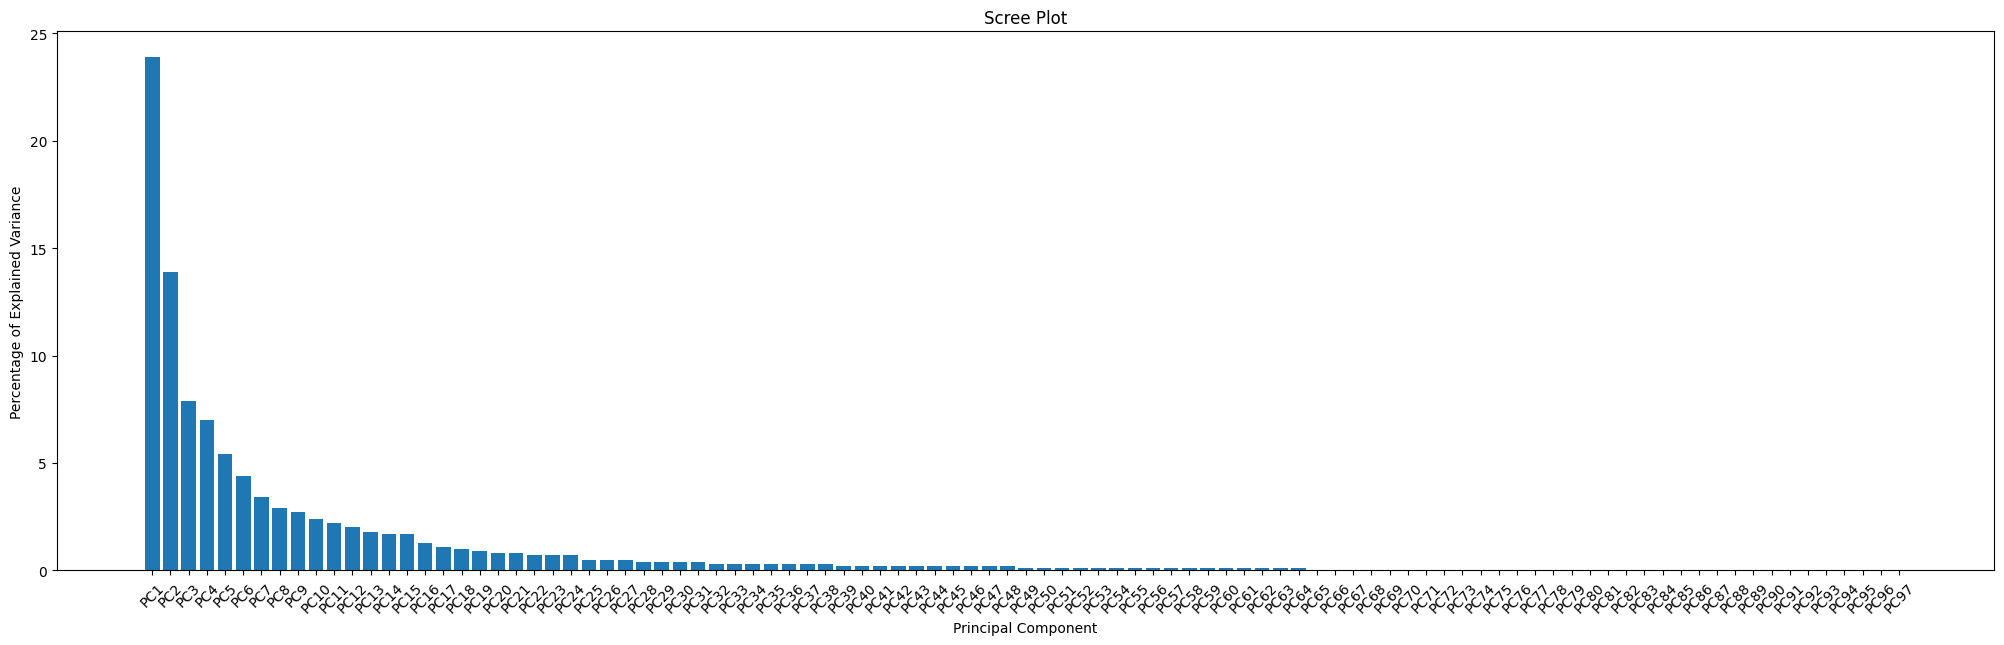

In [104]:
pca=PCA()
pca.set_output(transform='pandas')
pca.fit(X_train)
pca_data=pca.transform(X_train)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=["PC"+str(i) for i in range(1,len(per_var)+1)]

plt.figure(figsize=(25, 7))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=45)
plt.show()


In [112]:
#till PCA20 
pca=PCA(n_components=50)
pca.set_output(transform='pandas')
X_pca_train=pca.fit_transform(X_train)
X_pca_test=pca.transform(X_test)


In [113]:
#Training
gbr.fit(X_pca_train,y_train)
xgboost.fit(X_pca_train,y_train)
lightgbm.fit(X_pca_train,y_train)
sgd_gs.best_estimator_.fit(X_pca_train,y_train)
cat_gs.best_estimator_.fit(X_pca_train,y_train)
ada_gs.best_estimator_.fit(X_pca_train,y_train)
#Testing
print('GradientBoosting')
print(gbr.score(X_pca_test,y_test))

print('xgboost')
print(xgboost.score(X_pca_test,y_test))

print('lightgbm')
print(lightgbm.score(X_pca_test,y_test))

print('sgd')
print(sgd_gs.best_estimator_.score(X_pca_test,y_test))

print('catboost')
print(cat_gs.best_estimator_.score(X_pca_test,y_test))

print('adaboost')
print(ada_gs.best_estimator_.score(X_pca_test,y_test))


0:	learn: 73415.6335946	total: 4.6ms	remaining: 4.59s
1:	learn: 71799.8325014	total: 8.3ms	remaining: 4.14s
2:	learn: 70156.5406665	total: 11.2ms	remaining: 3.74s
3:	learn: 68452.6522957	total: 14.1ms	remaining: 3.5s
4:	learn: 66691.0430056	total: 16.9ms	remaining: 3.35s
5:	learn: 65003.7518626	total: 20.8ms	remaining: 3.45s
6:	learn: 63474.7130978	total: 23.5ms	remaining: 3.34s
7:	learn: 62138.9830836	total: 26.2ms	remaining: 3.25s
8:	learn: 61106.6630457	total: 29ms	remaining: 3.19s
9:	learn: 59994.0046196	total: 31.4ms	remaining: 3.11s
10:	learn: 58577.8375769	total: 34.1ms	remaining: 3.06s
11:	learn: 57365.9329931	total: 37.3ms	remaining: 3.07s
12:	learn: 56367.4174847	total: 40ms	remaining: 3.04s
13:	learn: 55352.7781305	total: 42.9ms	remaining: 3.02s
14:	learn: 54314.4217948	total: 45.4ms	remaining: 2.98s
15:	learn: 53241.4982513	total: 48ms	remaining: 2.95s
16:	learn: 52404.2681999	total: 50.7ms	remaining: 2.93s
17:	learn: 51476.3497933	total: 53.5ms	remaining: 2.92s
18:	learn: 

In [115]:
sr_cv.best_estimator_.fit(X_pca_train,y_train)
print('StackingRegressor')
sr_cv.best_estimator_.score(X_pca_test,y_test)

0:	learn: 74911.3725901	total: 996us	remaining: 996ms
1:	learn: 74346.7446245	total: 1.95ms	remaining: 971ms
2:	learn: 73792.7789371	total: 2.74ms	remaining: 911ms
3:	learn: 73238.3492310	total: 3.56ms	remaining: 886ms
4:	learn: 72707.4042599	total: 4.37ms	remaining: 869ms
5:	learn: 72173.5802115	total: 5.2ms	remaining: 862ms
6:	learn: 71641.5716580	total: 6.07ms	remaining: 861ms
7:	learn: 71113.6475699	total: 6.85ms	remaining: 850ms
8:	learn: 70605.6619706	total: 7.69ms	remaining: 847ms
9:	learn: 70089.5297590	total: 8.5ms	remaining: 841ms
10:	learn: 69592.3227274	total: 9.45ms	remaining: 850ms
11:	learn: 69096.2699471	total: 10.4ms	remaining: 853ms
12:	learn: 68621.6885770	total: 11.2ms	remaining: 851ms
13:	learn: 68131.1282852	total: 12.2ms	remaining: 857ms
14:	learn: 67661.2285343	total: 13.1ms	remaining: 858ms
15:	learn: 67185.2334967	total: 13.9ms	remaining: 855ms
16:	learn: 66722.7961002	total: 14.8ms	remaining: 855ms
17:	learn: 66259.7474221	total: 15.7ms	remaining: 855ms
18:	l

0.888671019833376

Better without PCA Reduction

In [142]:
#Final prediction 
X_finaltest = pipeline.transform(df_test)
y_finaltest = pd.read_csv("sample_submission.csv")
y_finaltest=y_finaltest.iloc[:,1]



In [129]:
#Training
gbr.fit(X_pre,y)
xgboost.fit(X_pre,y)
lightgbm.fit(X_pre,y)
sgd_gs.best_estimator_.fit(X_pre,y)
cat_gs.best_estimator_.fit(X_pre,y)
ada_gs.best_estimator_.fit(X_pre,y)

#Testing
print('GradientBoosting')
print(gbr.score(X_finaltest,y_finaltest))

print('xgboost')
print(xgboost.score(X_finaltest,y_finaltest))

print('lightgbm')
print(lightgbm.score(X_finaltest,y_finaltest))

print('sgd')
print(sgd_gs.best_estimator_.score(X_finaltest,y_finaltest))

print('catboost')
print(cat_gs.best_estimator_.score(X_finaltest,y_finaltest))

print('adaboost')
print(ada_gs.best_estimator_.score(X_finaltest,y_finaltest))


0:	learn: 72808.0692158	total: 1.54ms	remaining: 1.54s
1:	learn: 70590.2133750	total: 3.17ms	remaining: 1.58s
2:	learn: 68448.1960740	total: 4.77ms	remaining: 1.58s
3:	learn: 66422.8119176	total: 6.16ms	remaining: 1.53s
4:	learn: 64463.2738519	total: 7.32ms	remaining: 1.46s
5:	learn: 62476.8022995	total: 8.26ms	remaining: 1.37s
6:	learn: 60700.5333974	total: 9.49ms	remaining: 1.35s
7:	learn: 59140.2605563	total: 10.7ms	remaining: 1.33s
8:	learn: 57460.5151678	total: 12ms	remaining: 1.32s
9:	learn: 55965.7919502	total: 13.2ms	remaining: 1.3s
10:	learn: 54406.1871155	total: 14.4ms	remaining: 1.29s
11:	learn: 52904.7739090	total: 15.6ms	remaining: 1.28s
12:	learn: 51481.0098340	total: 16.8ms	remaining: 1.28s
13:	learn: 50096.4347283	total: 18ms	remaining: 1.27s
14:	learn: 48710.8786273	total: 19.5ms	remaining: 1.28s
15:	learn: 47437.3476773	total: 20.8ms	remaining: 1.28s
16:	learn: 46346.4955883	total: 22.1ms	remaining: 1.28s
17:	learn: 45329.2874156	total: 23.3ms	remaining: 1.27s
18:	lea

In [130]:
sr_cv.best_estimator_.fit(X_pre,y)
print('StackingRegressor')
sr_cv.best_estimator_.score(X_finaltest,y_finaltest)

0:	learn: 74531.1728358	total: 1.06ms	remaining: 1.06s
1:	learn: 73935.0129356	total: 1.99ms	remaining: 993ms
2:	learn: 73342.7070381	total: 2.82ms	remaining: 936ms
3:	learn: 72747.3428918	total: 3.61ms	remaining: 899ms
4:	learn: 72171.4721667	total: 4.47ms	remaining: 889ms
5:	learn: 71595.3079498	total: 5.31ms	remaining: 879ms
6:	learn: 71030.0240009	total: 6.16ms	remaining: 874ms
7:	learn: 70471.9653547	total: 7.12ms	remaining: 882ms
8:	learn: 69935.3387074	total: 8.06ms	remaining: 888ms
9:	learn: 69383.9775508	total: 8.94ms	remaining: 885ms
10:	learn: 68835.2624539	total: 9.8ms	remaining: 881ms
11:	learn: 68298.1617264	total: 10.7ms	remaining: 877ms
12:	learn: 67764.4958521	total: 11.5ms	remaining: 872ms
13:	learn: 67227.7520931	total: 12.3ms	remaining: 867ms
14:	learn: 66726.4515888	total: 13.1ms	remaining: 862ms
15:	learn: 66212.4536294	total: 14ms	remaining: 860ms
16:	learn: 65704.5556871	total: 14.8ms	remaining: 857ms
17:	learn: 65190.2995326	total: 15.7ms	remaining: 855ms
18:	l

-19.92258353287385

Final Results for Test df given

In [148]:
y_pred=sr_cv.best_estimator_.predict(X_finaltest)
Id=pd.Series(range(1461,1461+y_pred.shape[0]))
df=pd.DataFrame({'Id':Id,'SalePrice':y_pred})
df.to_csv("sub.csv",index=False)

(1459, 2)